## Assignment - Lending Club
This notebook deals with the exploratory data analysis for the Lending Club dataset:

### 1. Load Datasets

#### 1.1. Load LoanStats dataset using defined schema

First, we load the cleaned LoanStats dataset with schema inferred from the dataset file

In [1]:
# Load LoanStats dataset
LoanStatsDF_Clean = spark.read.csv("./Dataset/Clean/LoanStats_Clean.csv", header=True, inferSchema=True)

# Print out LoanStatsDF schema
LoanStatsDF_Clean.printSchema()

root
 |-- loan_amnt: integer (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: integer (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: double (nullable = true)
 |-- delinq_2yrs: integer (nullable = true)
 |-- inq_last_6mths: integer (nullable = true)
 |-- mths_since_last_delinq: integer (nullable = true)
 |-- open_acc: integer (nullable = true)
 |-- pub_rec: integer (nullable = true)
 |-- revol_bal: integer (nullable = true)
 |-- revol_util: double (nullable = true)
 |-- total_acc: integer (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- out_prncp: double (nullable = true)
 |-- total_pymnt: d

#### 1.2. Load LoanStatsDictDF dataset for column details

Next, we load the LoanStatsDictDF dataset from "LCDataDictionary.xlsx" for column description display

In [2]:
from pyspark.sql.types import *
import pandas as pd

# Load LoanStatsDictDF
LoanStatsDictDF_xls = pd.read_excel("./Dataset/LCDataDictionary.xlsx", sheetname="LoanStats")

# Create schema for LoanStatsDictDF
schema = StructType([
                    StructField("name", StringType(), True),
                    StructField("description", StringType(), True)])

# Convert LoanStatsDictDF_xls (panda dataframe) to LoanStatsDictDF (pyspark dataframe)
LoanStatsDictDF = sqlContext.createDataFrame(LoanStatsDictDF_xls, schema)

# Check LoanStatsDictDF dataset
LoanStatsDictDF.show(1, truncate=False)

+--------------+---------------------------------------------------------------+
|name          |description                                                    |
+--------------+---------------------------------------------------------------+
|acc_now_delinq|The number of accounts on which the borrower is now delinquent.|
+--------------+---------------------------------------------------------------+
only showing top 1 row



### 2. Descriptive Statistics

#### 2.1. Check basic statistics of LoanStatsDF

First, we verify the basic structure of LoanStatsDF

In [3]:
# LoanStats Statistics

# Print out number of columns in LoanStatsDF dataframe
print("Number of columns in LoanStatsDF : {0}".format(len(LoanStatsDF_Clean.columns)))

# Print out number of records in LoanStatsDF dataframe
print("Total Records in LoanStatsDF: {0}".format(LoanStatsDF_Clean.count()))

# Show first 3 records of LoanStatsDF
LoanStatsDF_Clean.head()

Number of columns in LoanStatsDF : 80
Total Records in LoanStatsDF: 13555


Row(loan_amnt=4000, term='36 months', int_rate=0.0532, grade='A', sub_grade='A1', emp_length='10+ years', home_ownership='MORTGAGE', annual_inc=155000, verification_status='Not Verified', purpose='debt_consolidation', title='Debt consolidation', addr_state='OR', dti=19.94, delinq_2yrs=1, inq_last_6mths=0, mths_since_last_delinq=12, open_acc=11, pub_rec=0, revol_bal=3165, revol_util=0.191, total_acc=25, initial_list_status='w', out_prncp=0.0, total_pymnt=4065.0825, total_rec_int=65.08, total_rec_late_fee=0.0, recoveries=0.0, collections_12_mths_ex_med=0, policy_code=1, application_type='Individual', acc_now_delinq=0, tot_coll_amt=0, tot_cur_bal=440270, open_acc_6m=0, open_act_il=5, open_il_12m=1, open_il_24m=2, mths_since_rcnt_il=7, total_bal_il=66140, il_util=61, open_rv_12m=0, open_rv_24m=0, max_bal_bc=2358, all_util=58, total_rev_hi_lim=16600, inq_fi=3, total_cu_tl=2, inq_last_12m=1, acc_open_past_24mths=3, avg_cur_bal=40025, bc_open_to_buy=9242, bc_util=20.3, chargeoff_within_12_mth

#### 2.2. Check descriptive statistics for numerical features

Next, we check the descriptive statistics for numerical features

In [4]:
import numpy as np

LoanStatsDF_Clean.toPandas().describe(include=[np.number])

loan_amnt      int_rate    annual_inc           dti   delinq_2yrs  \
count  13555.000000  13555.000000  1.355500e+04  13555.000000  13555.000000   
mean   14156.029141      0.149561  8.779431e+04     18.610225      0.613722   
std     9398.831175      0.058947  9.265269e+04      8.606561      1.175517   
min     1000.000000      0.053200  9.000000e+03      0.000000      0.000000   
25%     7000.000000      0.113900  5.500000e+04     12.620000      0.000000   
50%    12000.000000      0.139900  7.500000e+04     17.830000      0.000000   
75%    20000.000000      0.179900  1.030000e+05     23.975000      1.000000   
max    40000.000000      0.309900  8.300000e+06    195.240000     19.000000   

       inq_last_6mths  mths_since_last_delinq      open_acc       pub_rec  \
count    13555.000000            13555.000000  13555.000000  13555.000000   
mean         0.668462               34.511177     12.884618      0.245592   
std          0.898249               22.023618      5.855155      0.638483   
min          0.000000                0.000000      2.000000      0.000000   
25%          0.000000               16.000000      9.000000      0.000000   
50%          0.000000               31.000000     12.000000      0.000000   
75%          1.000000               50.000000     16.000000      0.000000   
max          5.000000              160.000000     72.000000     11.000000   

           revol_bal       ...        num_rev_accts  num_tl_120dpd_2m  \
count   13555.000000       ...         13555.000000      13555.000000   
mean    14984.175876       ...            15.320472          0.001475   
std     21291.762820       ...             8.366229          0.038385   
min         0.000000       ...             2.000000          0.000000   
25%      5408.000000       ...             9.000000          0.000000   
50%     10221.000000       ...            14.000000          0.000000   
75%     18092.000000       ...            20.000000          0.000000   
max    651124.000000       ...           101.000000          1.000000   

       num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
count  13555.000000        13555.000000        13555.000000    13555.000000   
mean       0.007304            0.152785            2.689709       89.201166   
std        0.089379            0.698160            2.061310        9.468767   
min        0.000000            0.000000            0.000000       14.300000   
25%        0.000000            0.000000            1.000000       85.700000   
50%        0.000000            0.000000            2.000000       92.300000   
75%        0.000000            0.000000            4.000000       95.700000   
max        3.000000           19.000000           20.000000      100.000000   

       percent_bc_gt_75  pub_rec_bankruptcies     tax_liens  total_bc_limit  
count      13555.000000          13555.000000  13555.000000    13555.000000  
mean          37.277698              0.124308      0.074511    21600.443969  
std           34.692137              0.372187      0.434999    20094.208749  
min            0.000000              0.000000      0.000000      200.000000  
25%            0.000000              0.000000      0.000000     8300.000000  
50%           33.300000              0.000000      0.000000    15900.000000  
75%           66.700000              0.000000      0.000000    28150.000000  
max          100.000000              6.000000     11.000000   270700.000000  

[8 rows x 67 columns]

__Remarks__:

1. The average loan amount is 14.2K and loans are offered at an average interest rate of 15 percent with the maximum topping out at 30.1 percent. 
2. The average annual income of a borrower is approximately 88K with minimum of 9K and maximum at 8.3M.

#### 2.3. Check frequencies of categorical features

Next, we check the frequency of occurence for categorical features

In [5]:
LoanStatsDF_Clean.toPandas().describe(include=[np.object])

term  grade sub_grade emp_length home_ownership  \
count       13555  13555     13555      13555          13555   
unique          2      7        35         12              5   
top     36 months      C        C5  10+ years       MORTGAGE   
freq        10319   4733      1092       5282           7576   

       verification_status             purpose               title addr_state  \
count                13555               13555               13555      13555   
unique                   3                  12                  12         49   
top        Source Verified  debt_consolidation  Debt consolidation         CA   
freq                  5962                7559                7560       1878   

       initial_list_status application_type disbursement_method loan_status  
count                13555            13555               13555       13555  
unique                   2                2                   2           2  
top                      w       Individual                Cash  Fully Paid  
freq                  9415            12969               13549       11993

__Remarks__:

From the results above, we can see that the majority of the loans that are subsequently fully paid or defaulted are individual 36-month loans using the cash disbursement method. There is a much higher proportion of loans that are fully paid (88.4%) as compared to defaulted loans and employees with more than 10 years of service carrying home mortgages  tend to make up slightly higher proportion of borrowers with debt consolidation as their stated purpose.

#### 2.4. Check skewness of numerical features

Next, we check the skewness of each numerical column

In [6]:
LoanStatsDF_dtypes = LoanStatsDF_Clean.dtypes
columns = []

# Extract list of column names of date datatype
for (name, dtype) in LoanStatsDF_dtypes:
    if(dtype != 'string'):
        columns.append(name)

dict = {}
for feature in columns:
    dict[feature] = 'skewness'
    
LoanStatsDF_Skewness = LoanStatsDF_Clean.agg(dict)
print(LoanStatsDF_Skewness.toPandas().transpose().sort_values(0, ascending=False))

                                              0
skewness(annual_inc)                  54.598587
skewness(delinq_amnt)                 48.095558
skewness(tot_coll_amt)                34.151110
skewness(num_tl_120dpd_2m)            25.975979
skewness(num_tl_30dpd)                13.704472
skewness(acc_now_delinq)              12.075633
skewness(recoveries)                  11.609717
skewness(total_rec_late_fee)          10.956510
skewness(num_tl_90g_dpd_24m)          10.456979
skewness(tax_liens)                   10.336036
skewness(revol_bal)                   10.199043
skewness(chargeoff_within_12_mths)     9.403937
skewness(collections_12_mths_ex_med)   6.535955
skewness(total_rev_hi_lim)             5.414778
skewness(pub_rec)                      4.768812
skewness(num_accts_ever_120_pd)        4.466098
skewness(delinq_2yrs)                  4.331293
skewness(mo_sin_rcnt_rev_tl_op)        4.304935
skewness(mths_since_rcnt_il)           4.107788
skewness(mths_since_recent_bc)         3

In [7]:
# Disable auto-scrolling for output

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### 3. Correlation Analysis

#### 3.1. Check Correlation

Next, we analysis the correlation between numerical columns.

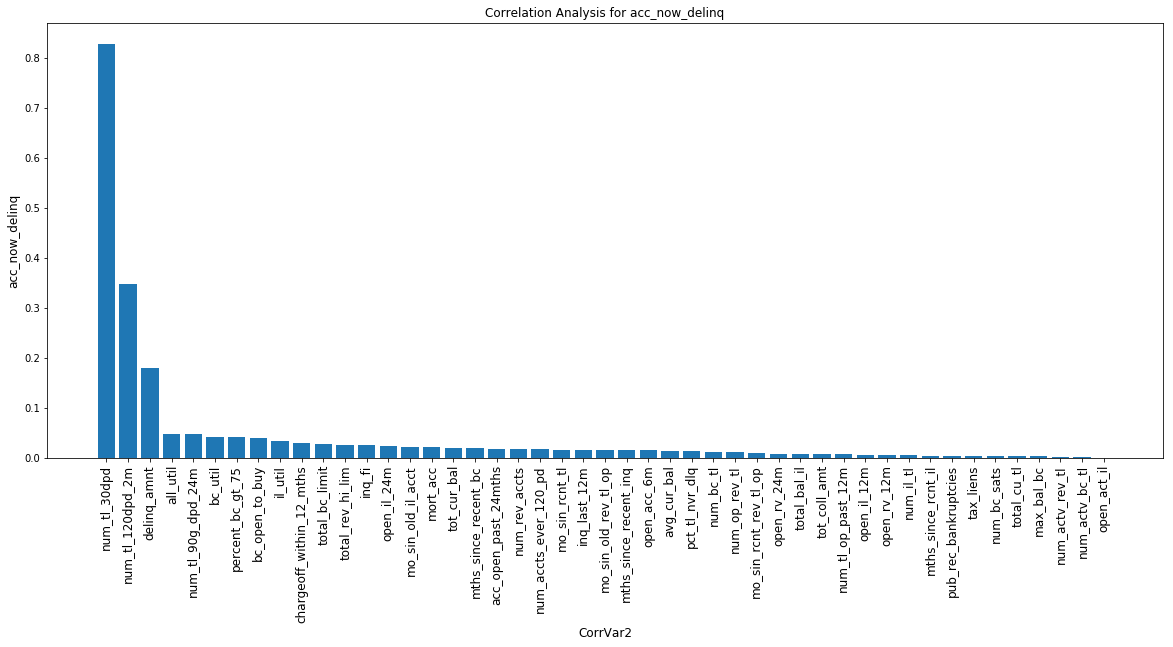

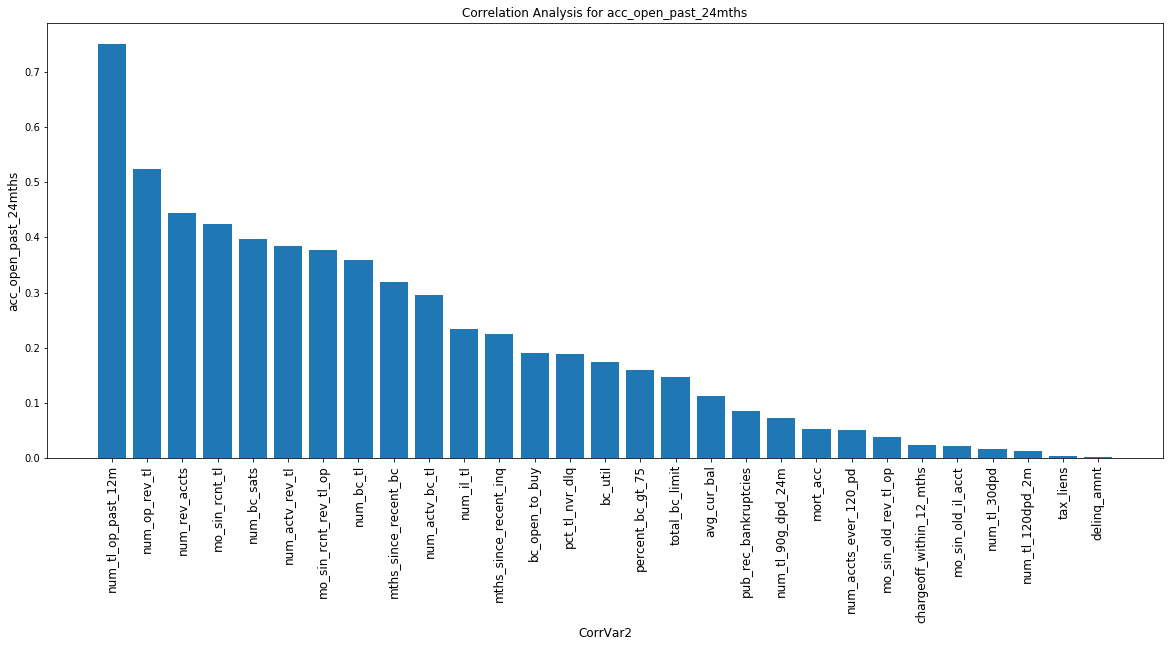

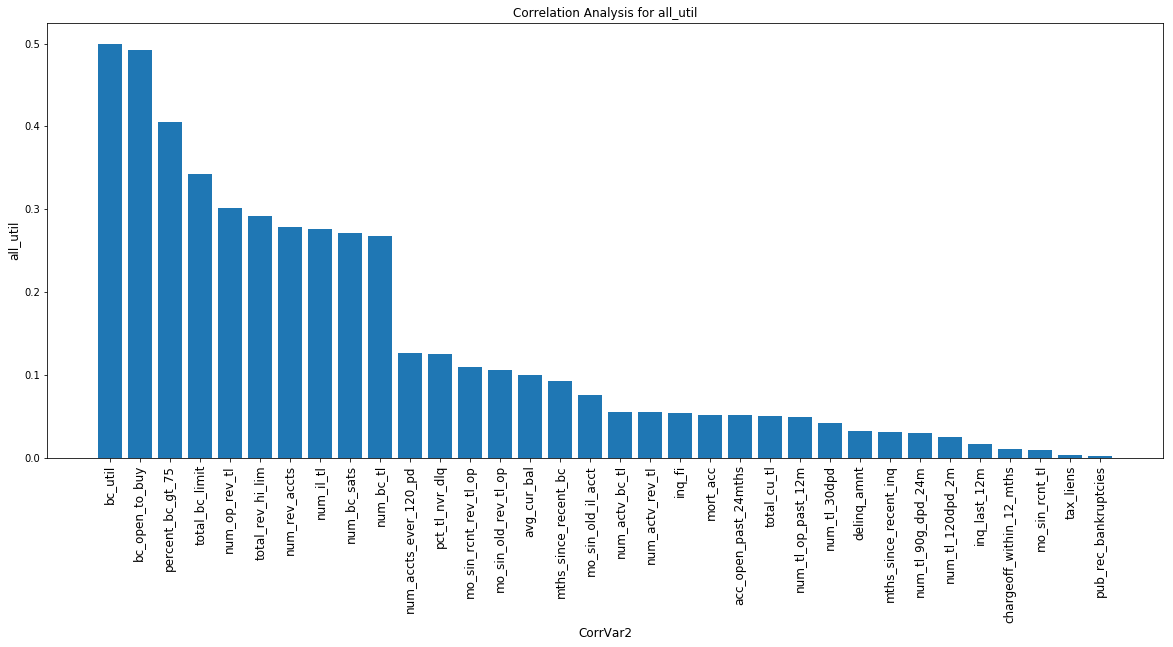

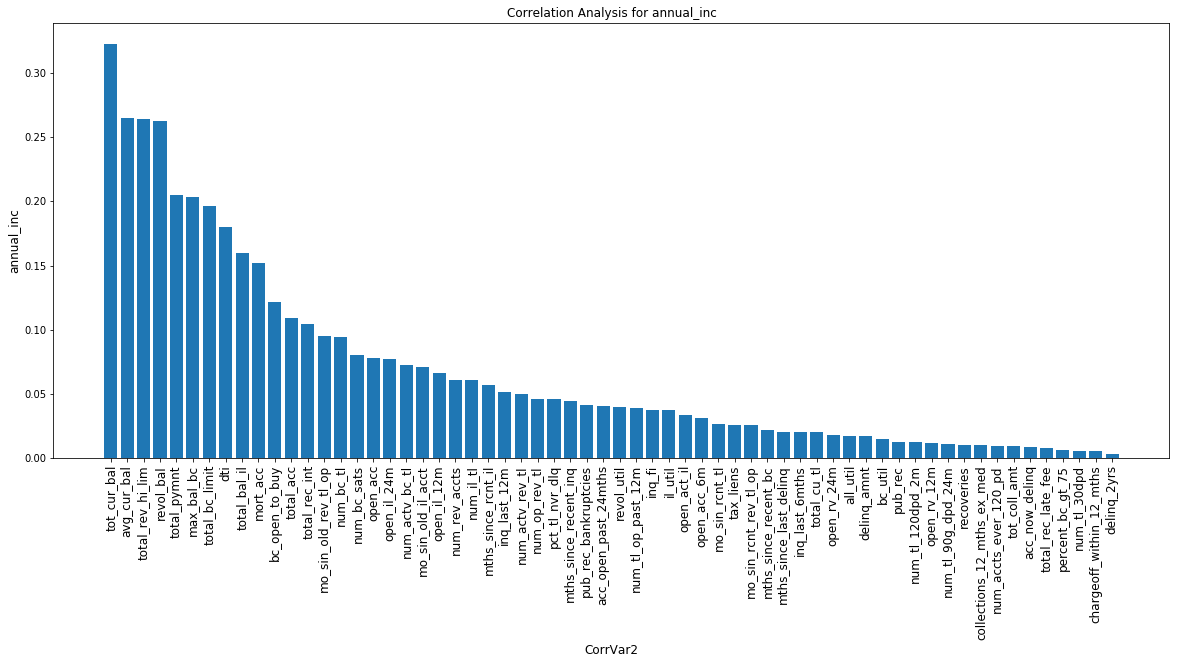

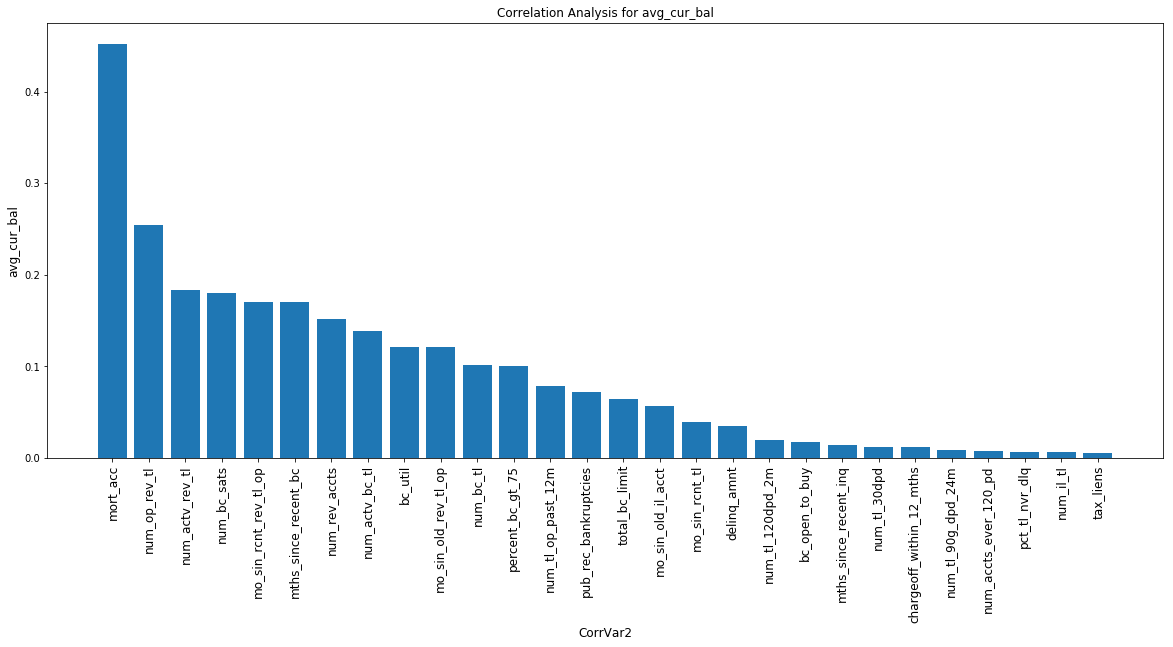

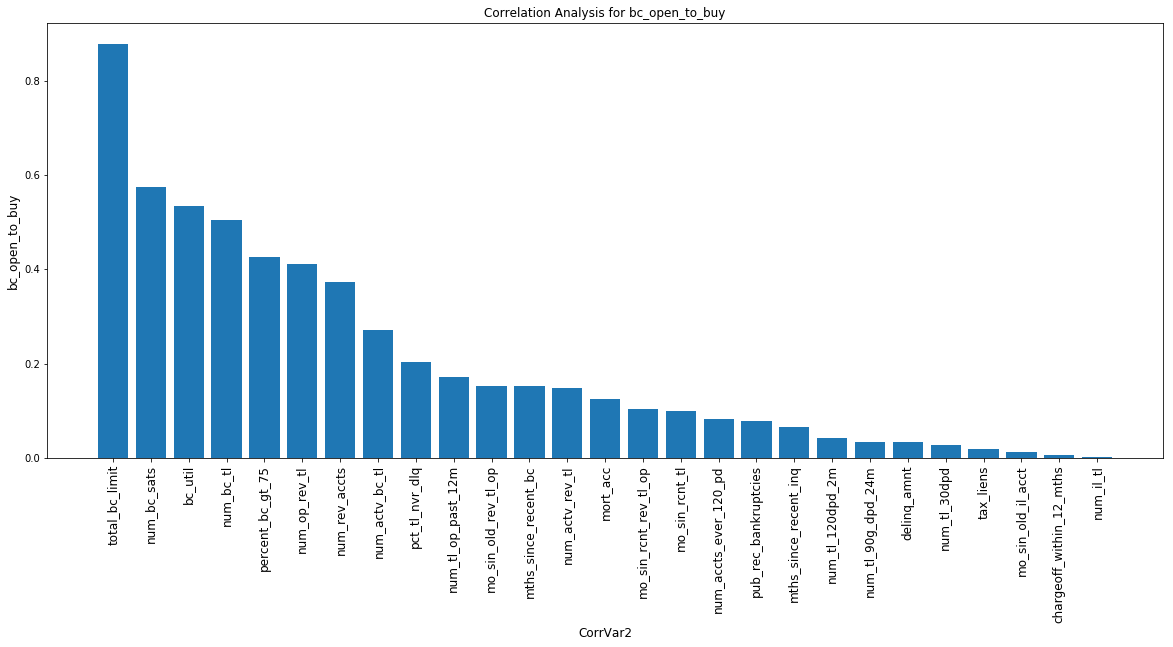

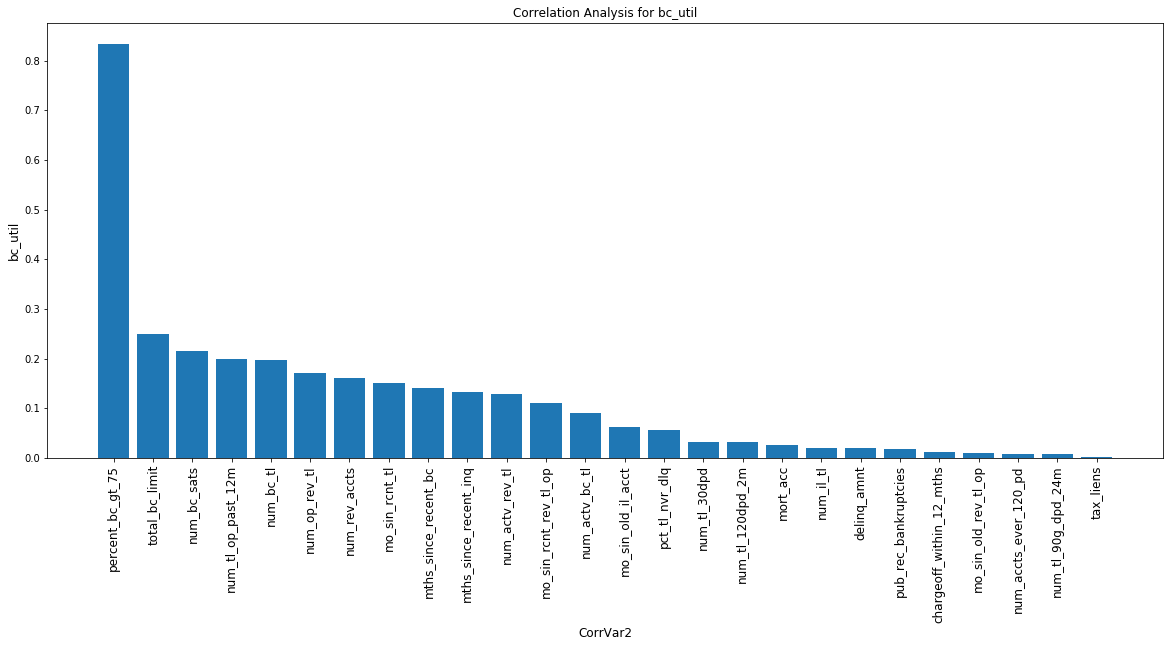

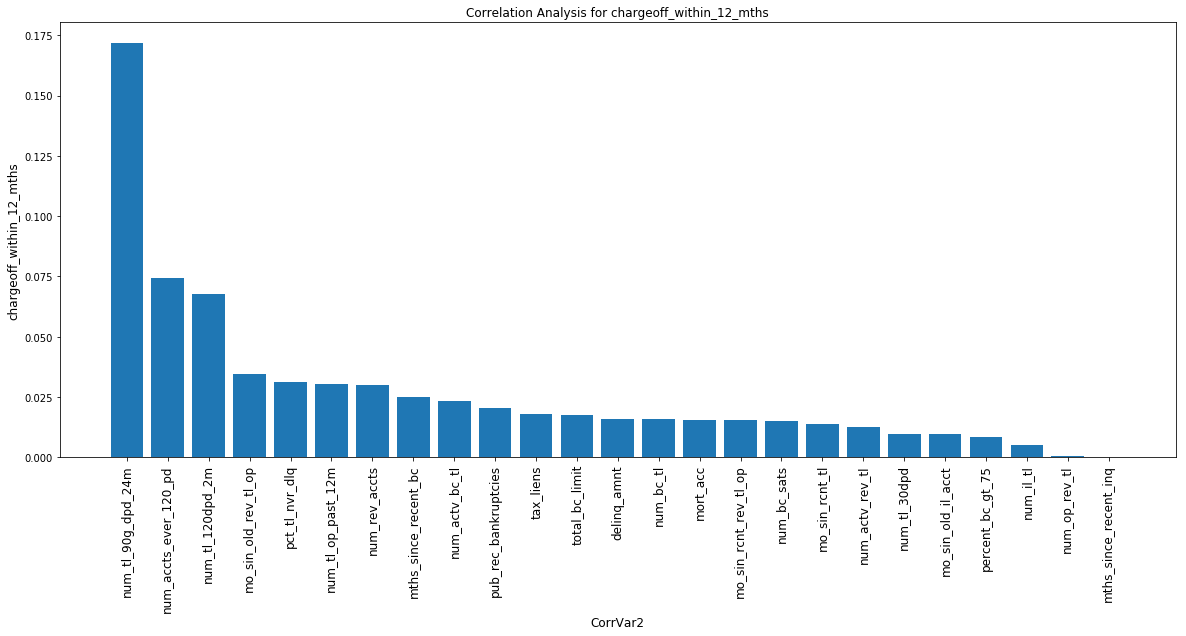

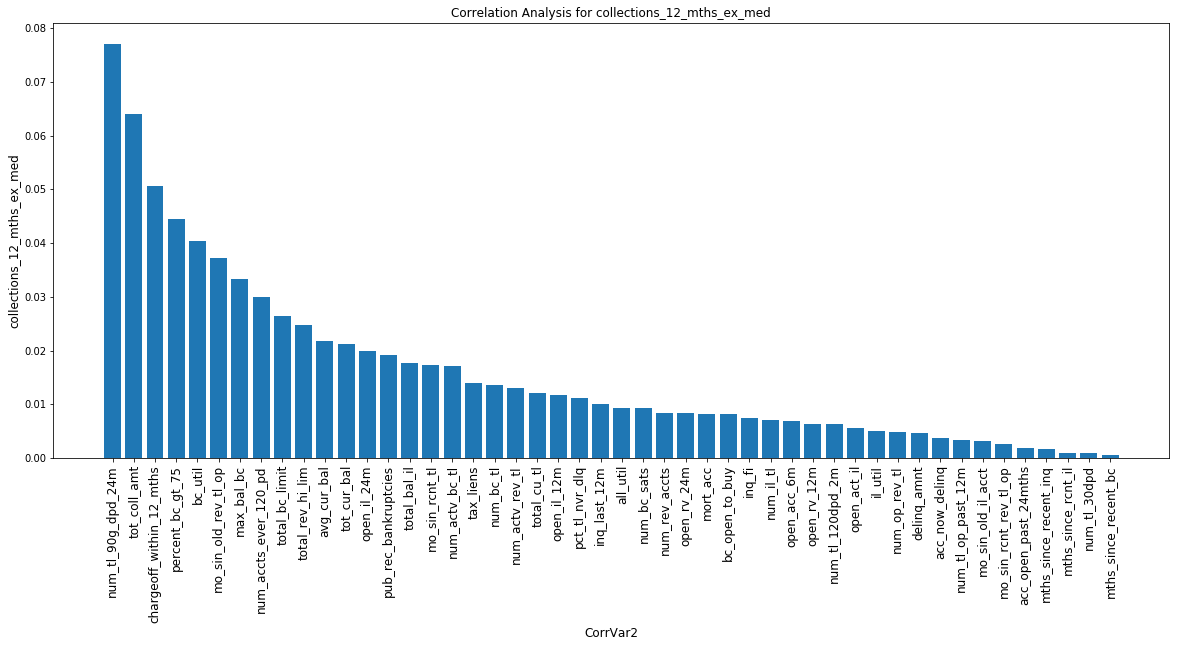

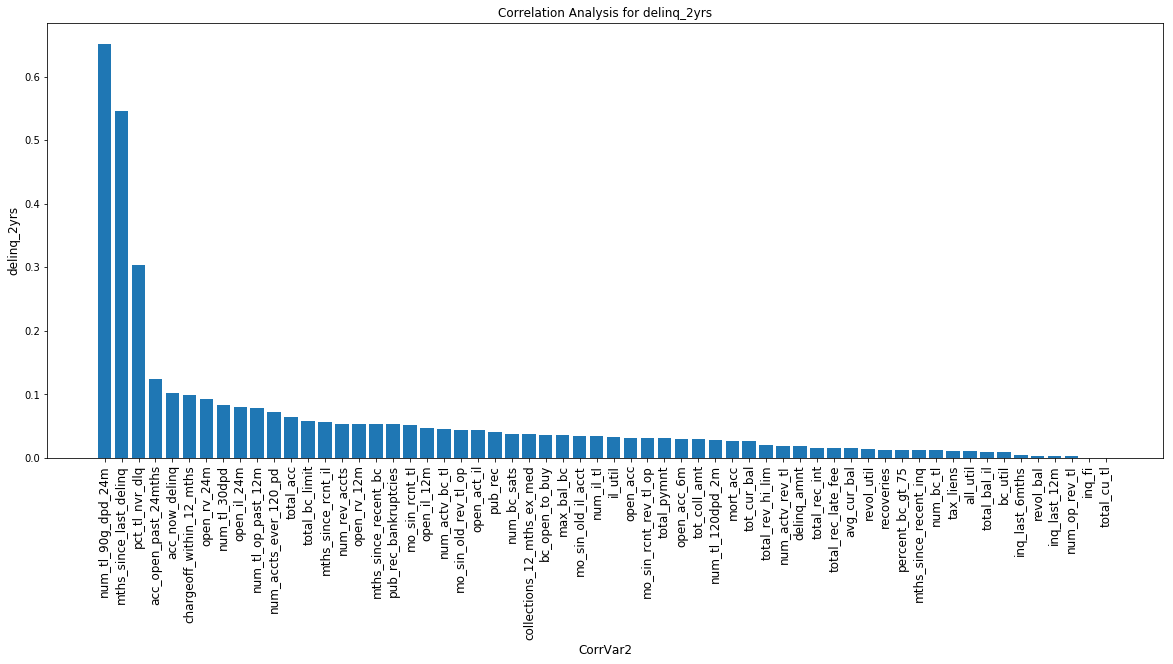

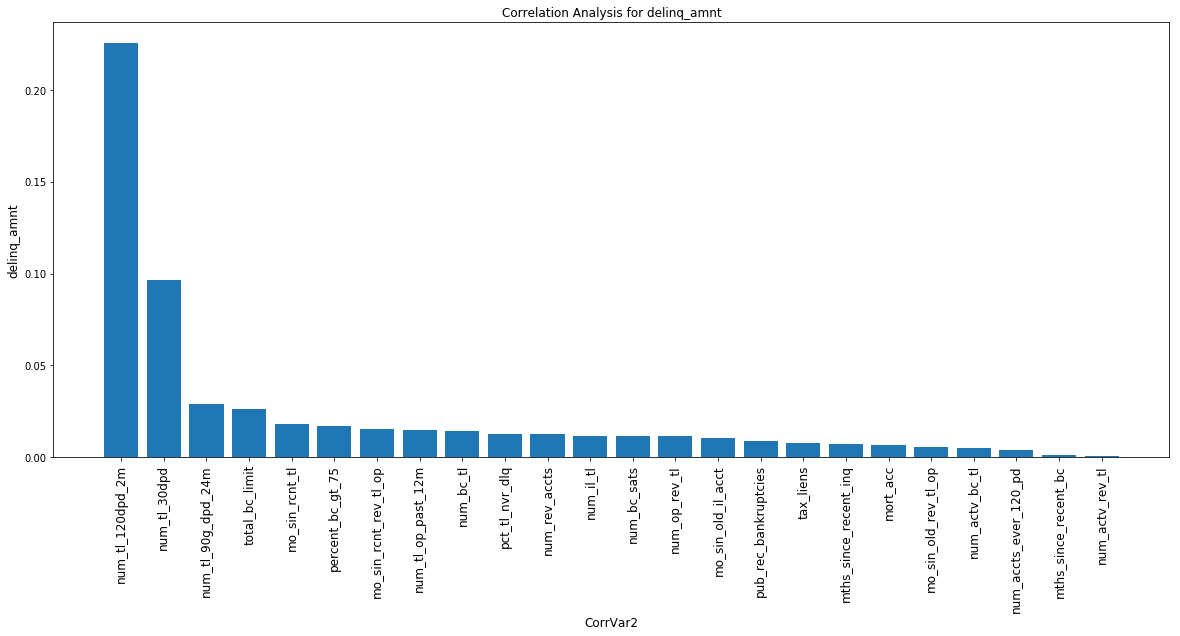

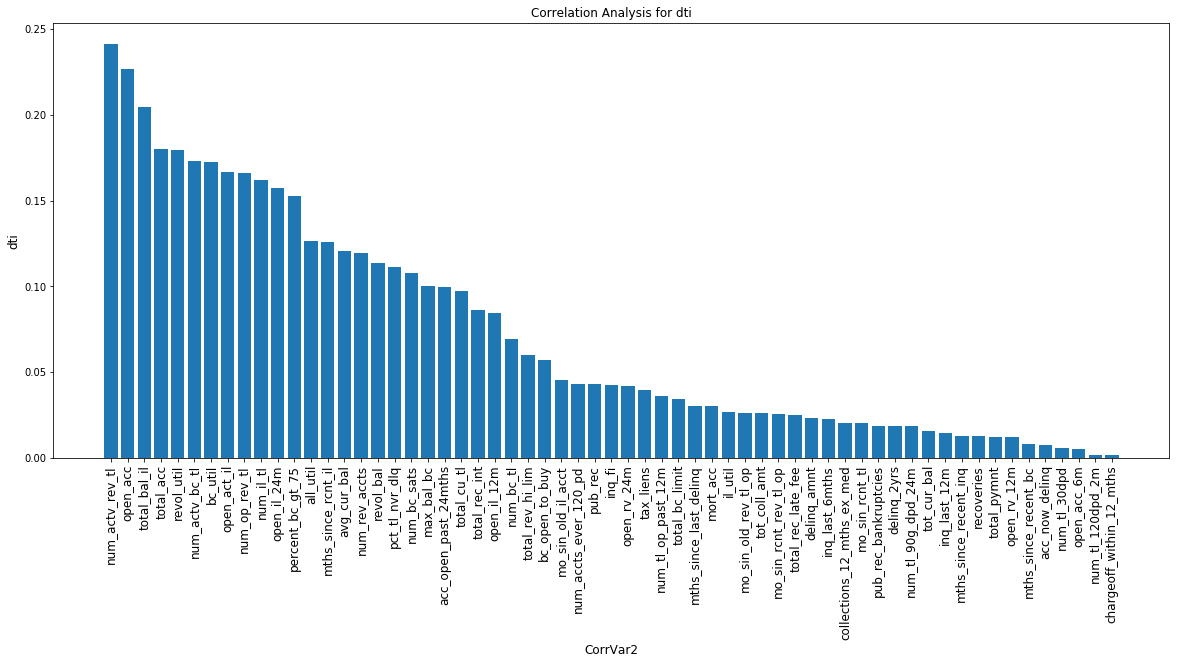

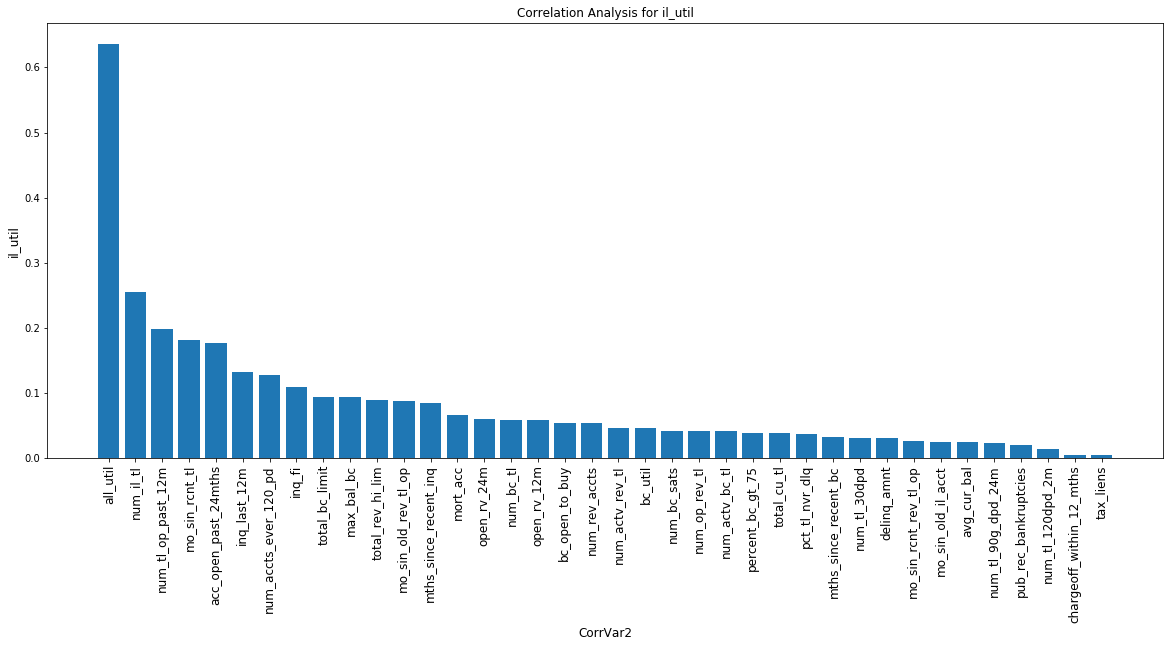

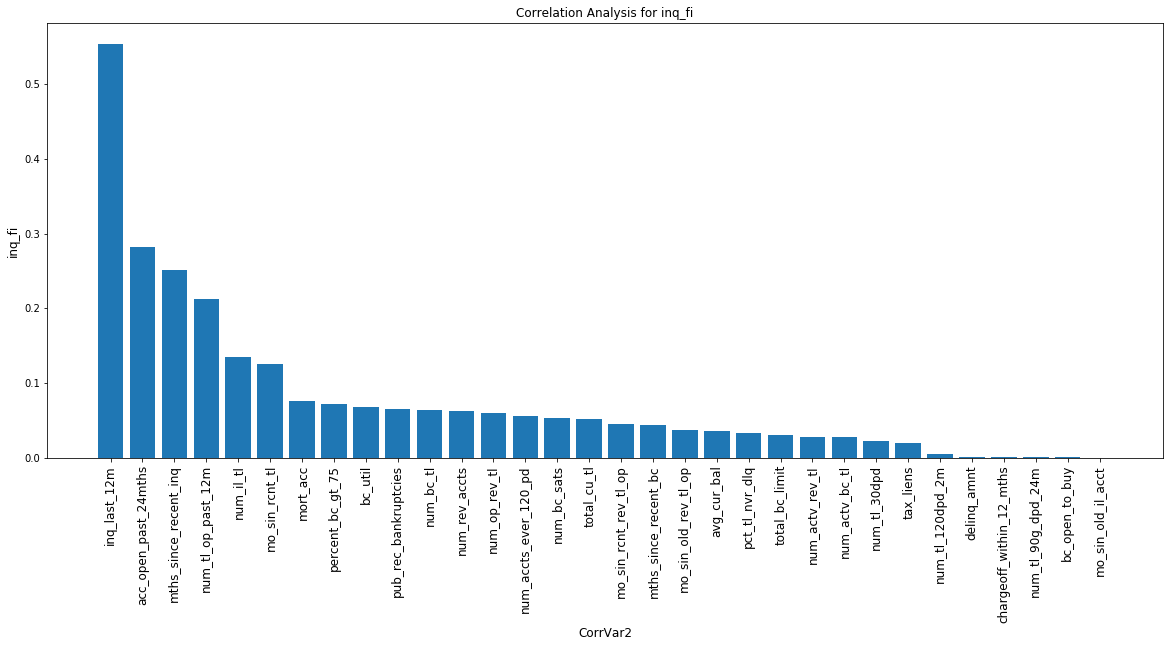

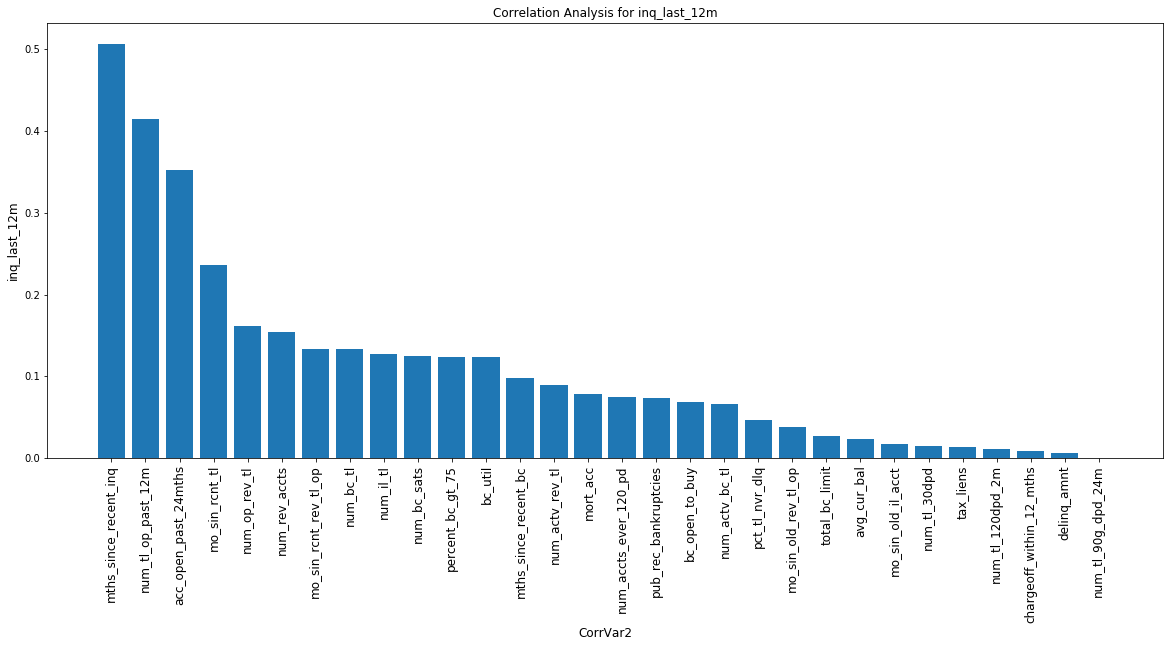

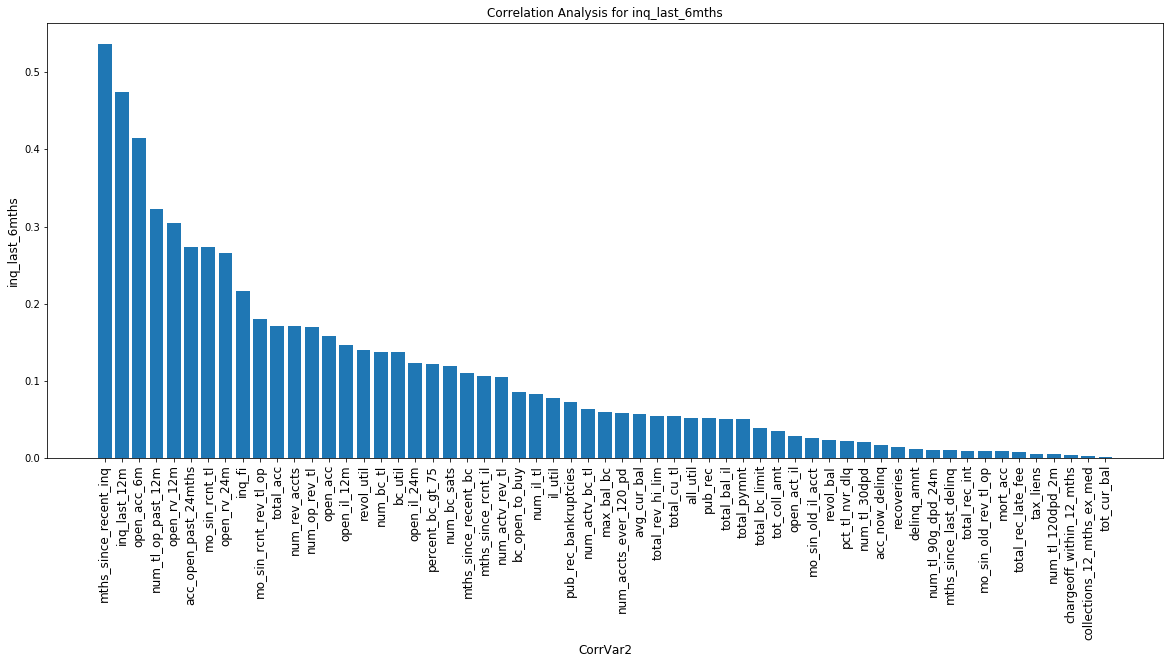

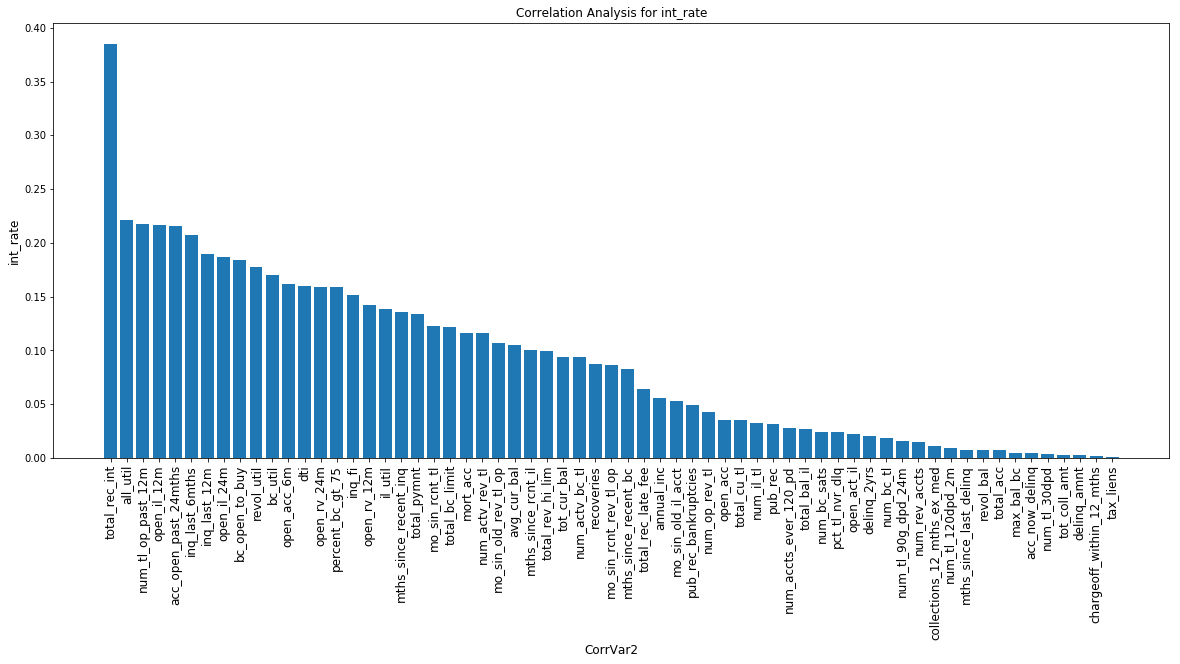

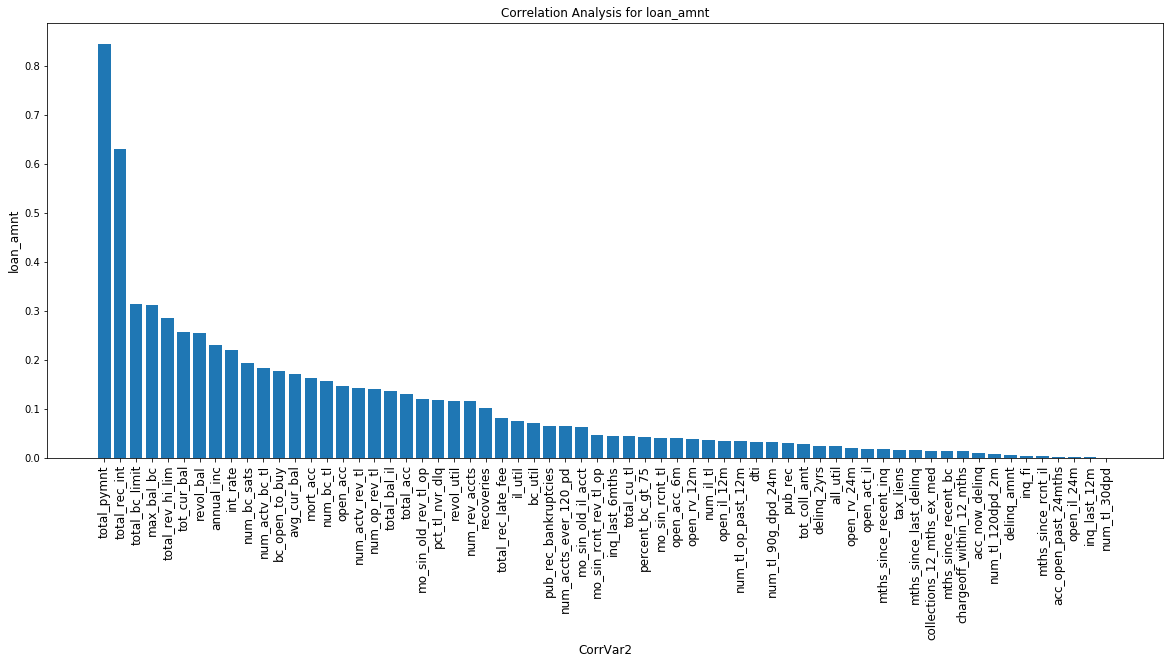

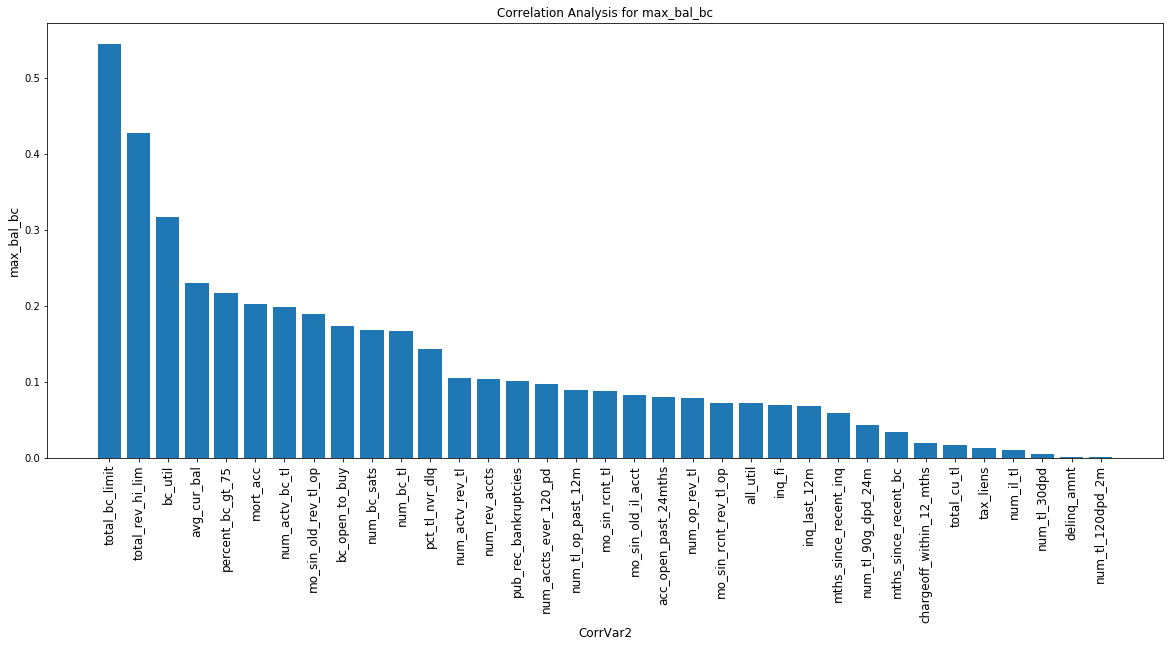

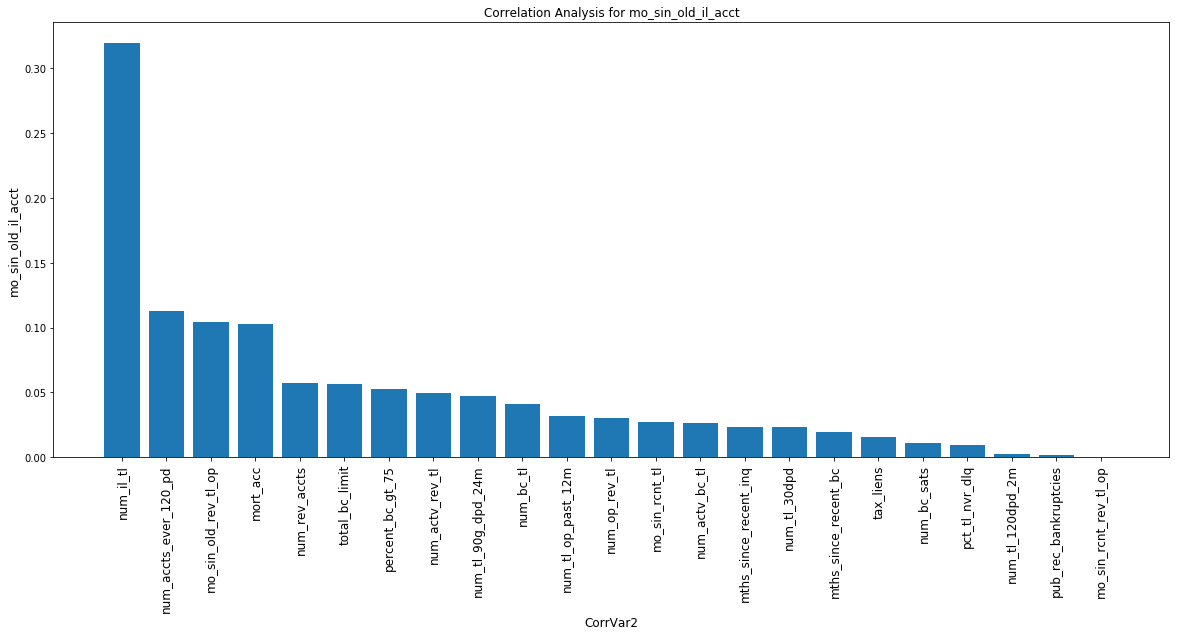

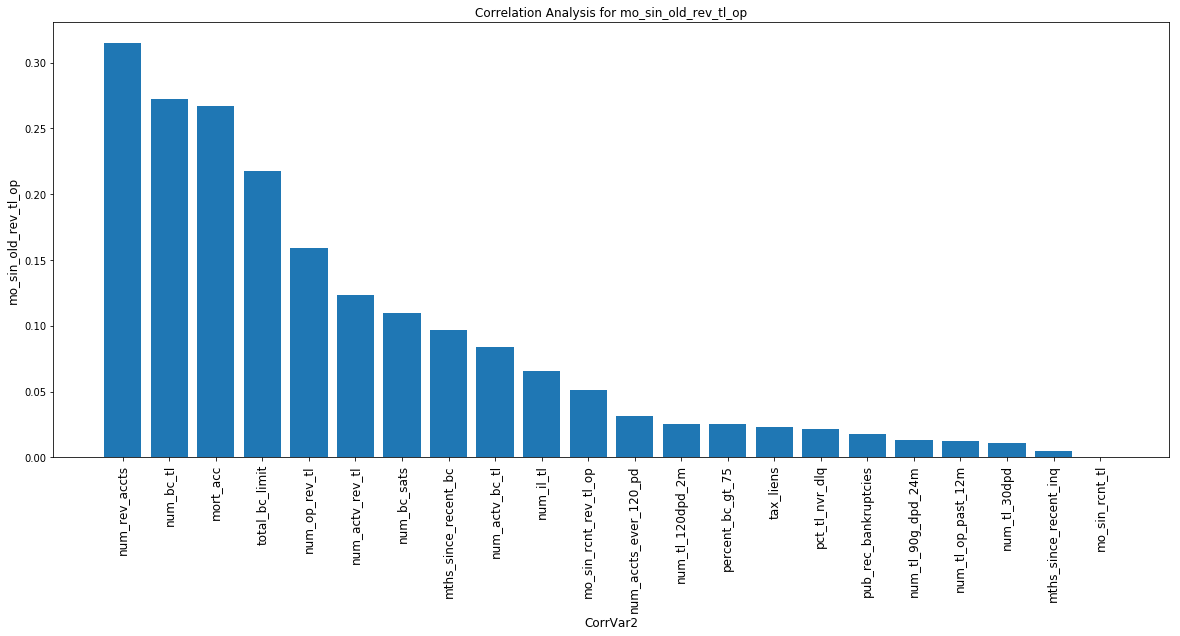

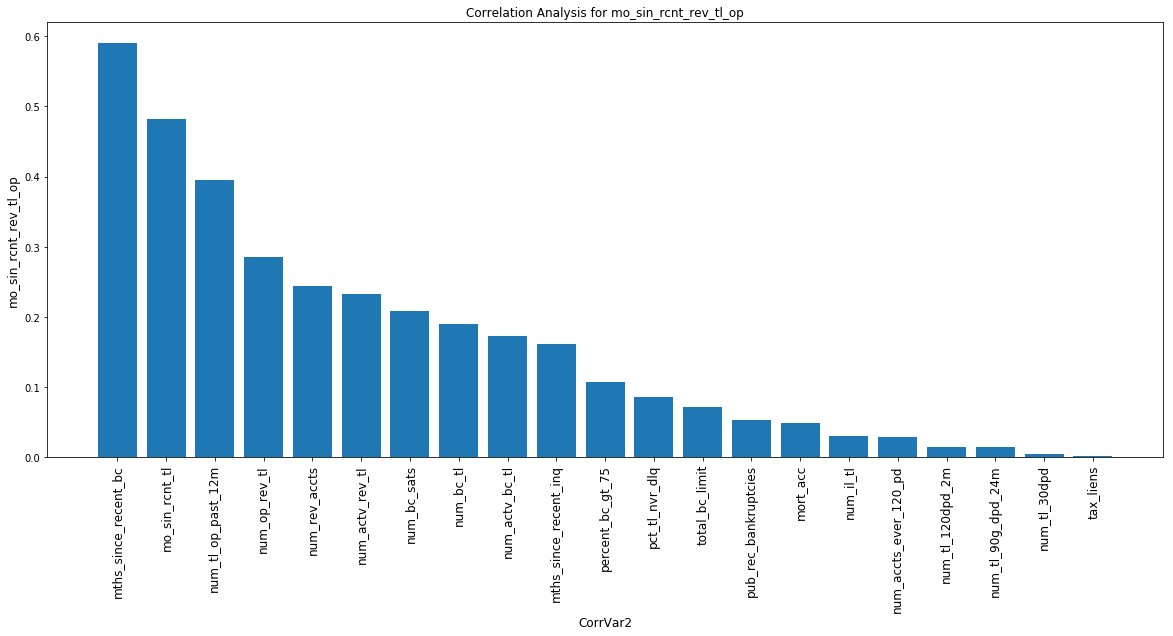

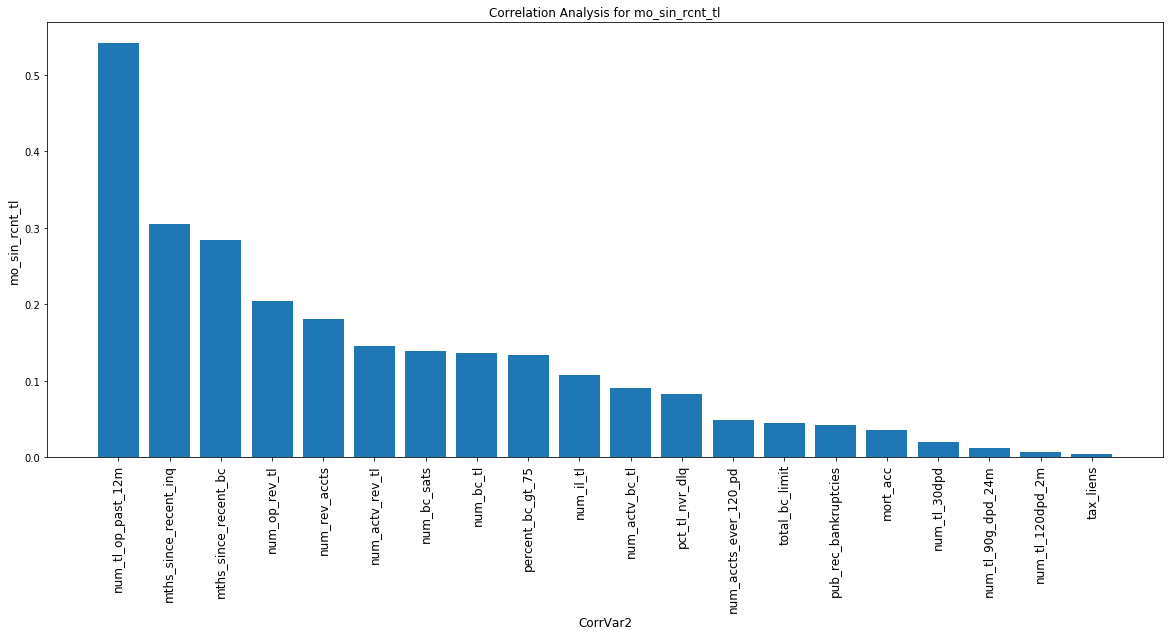

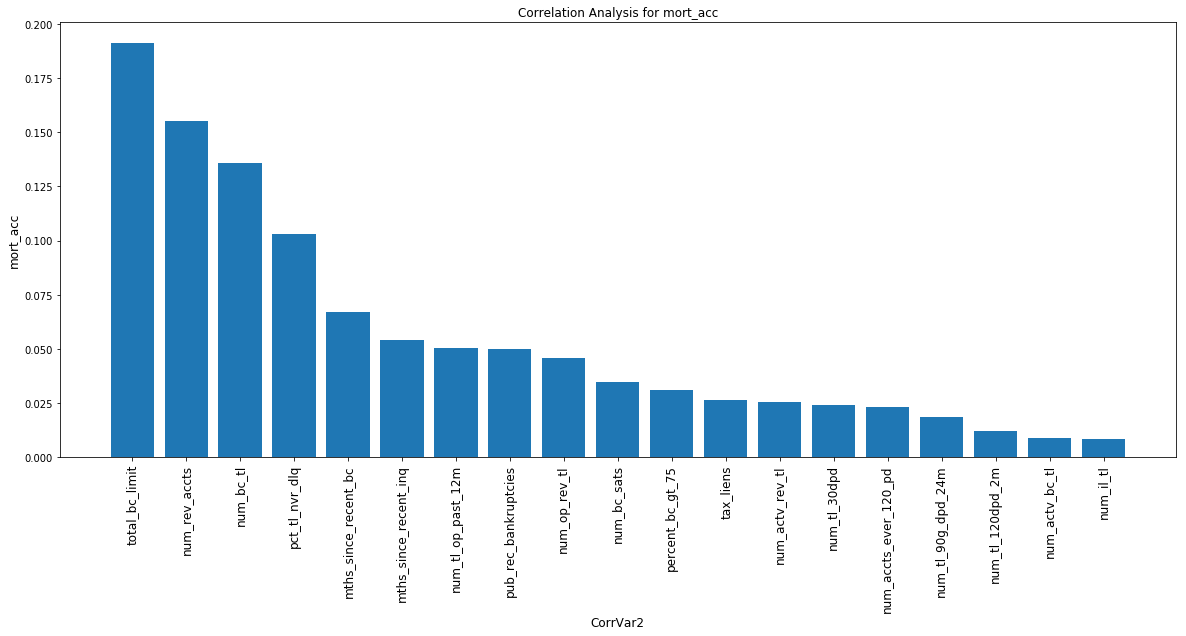

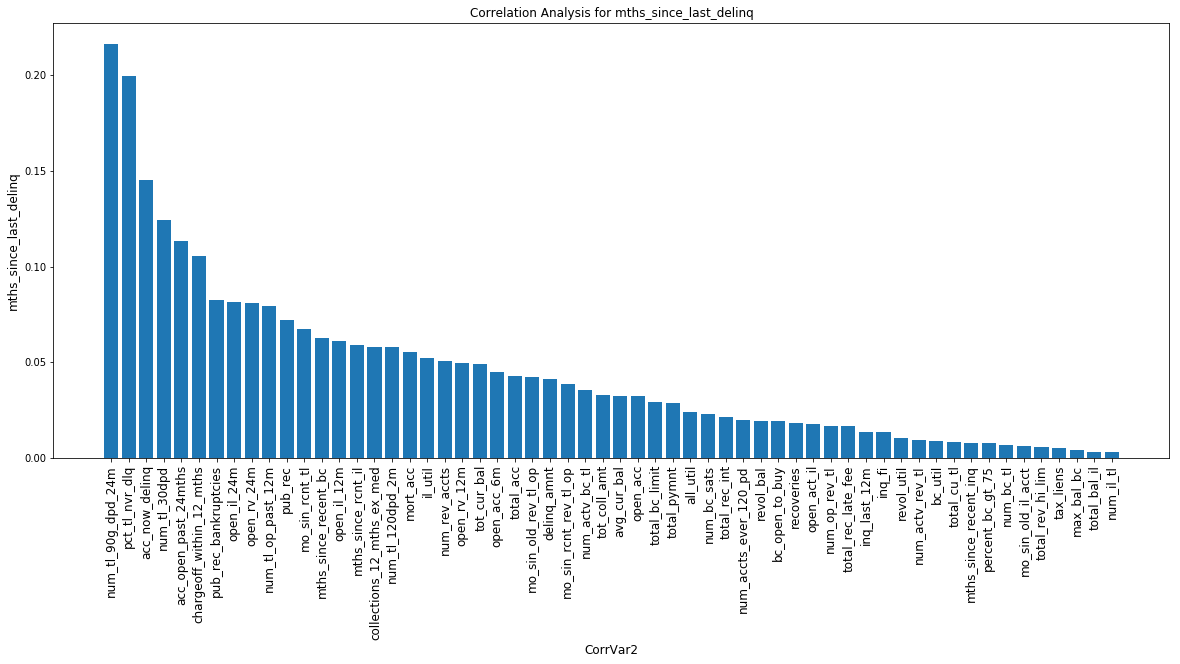

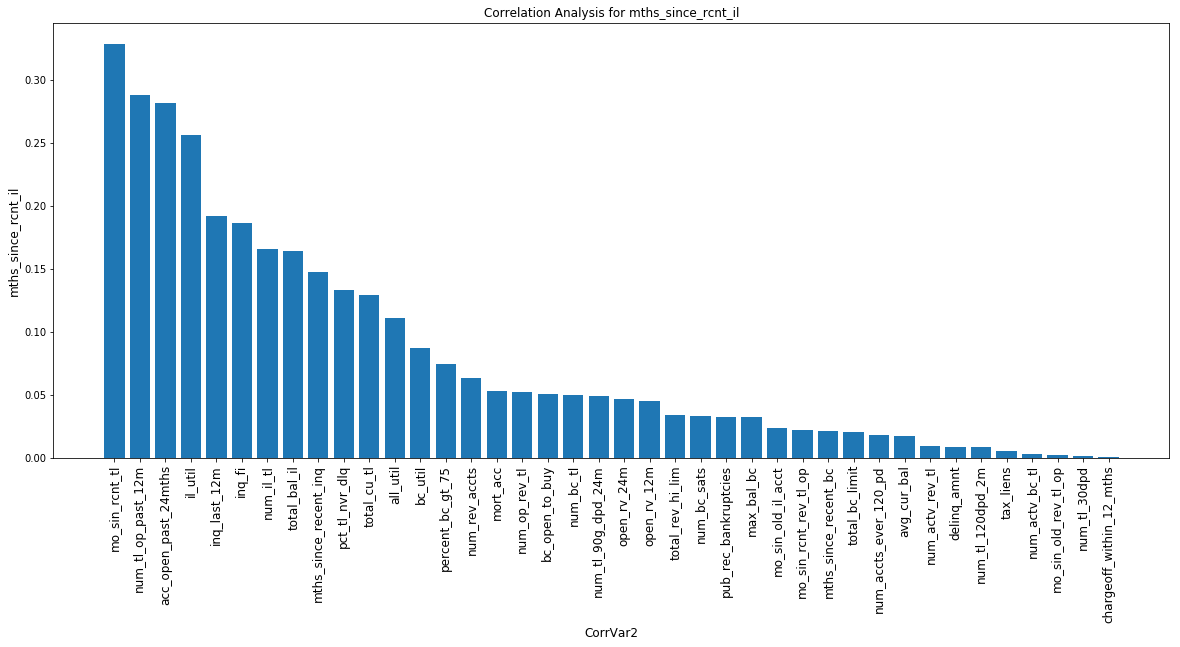

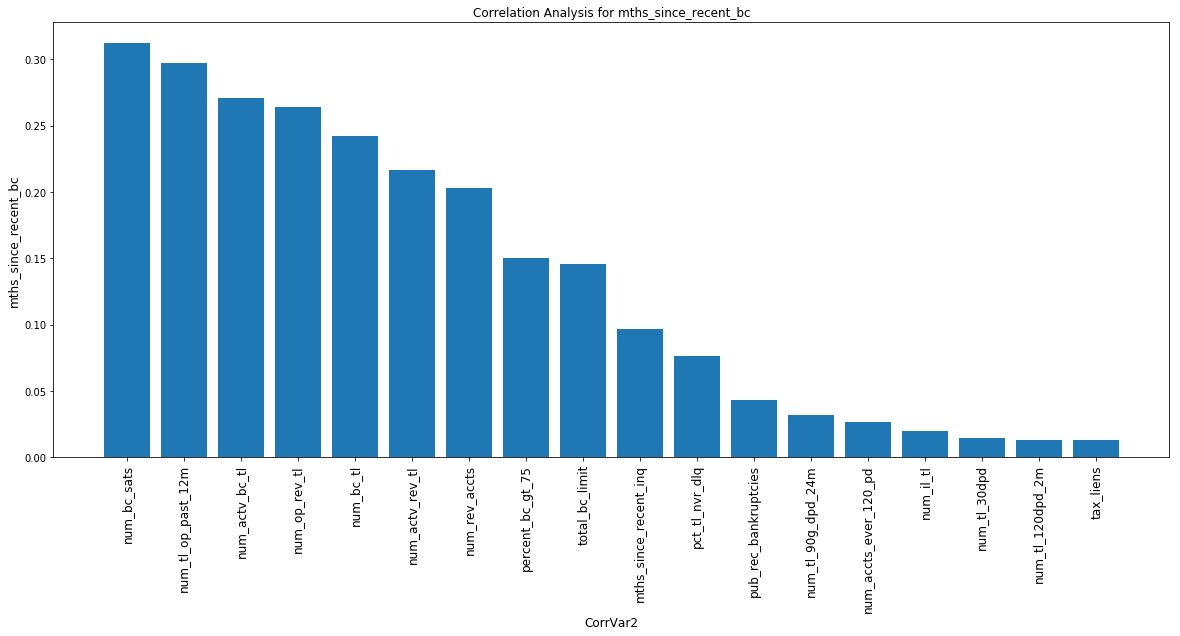

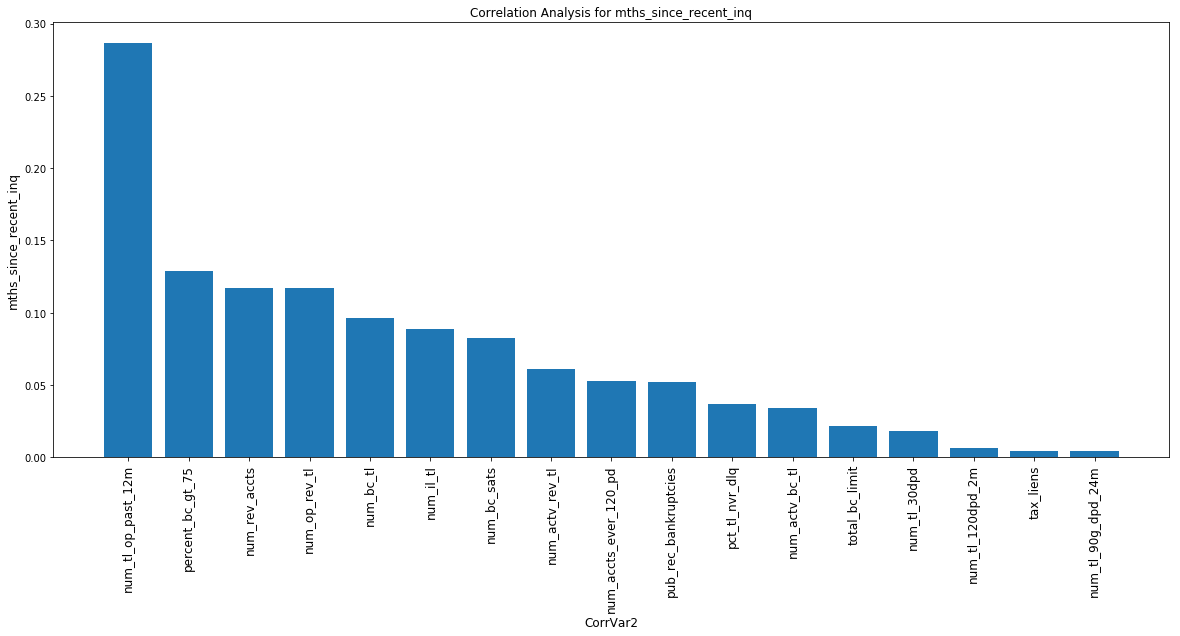

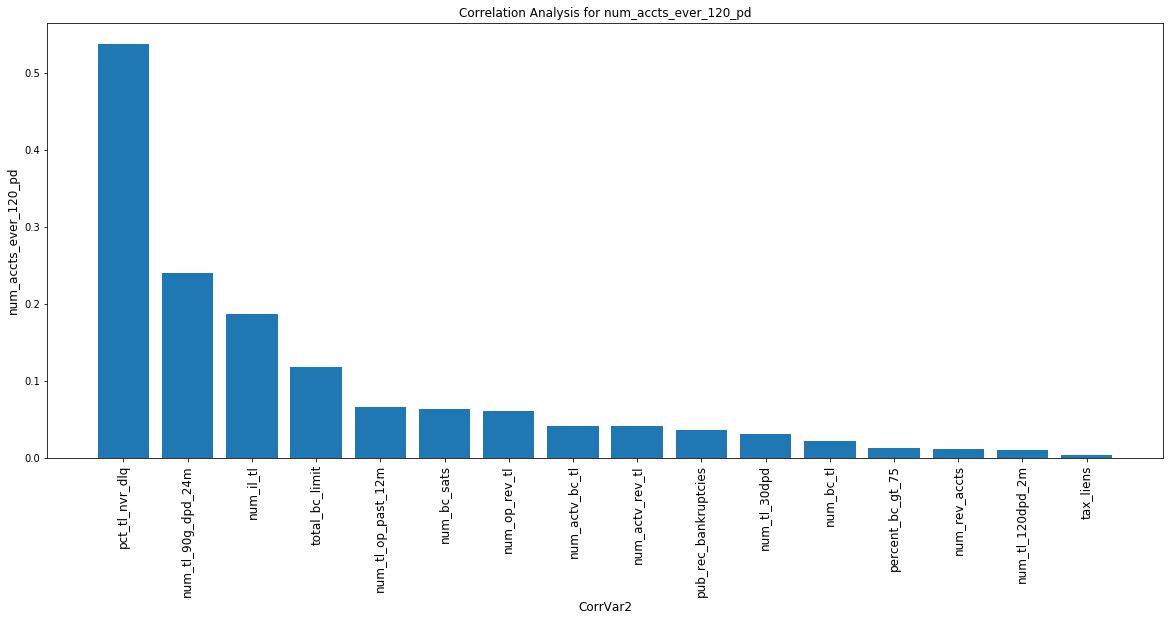

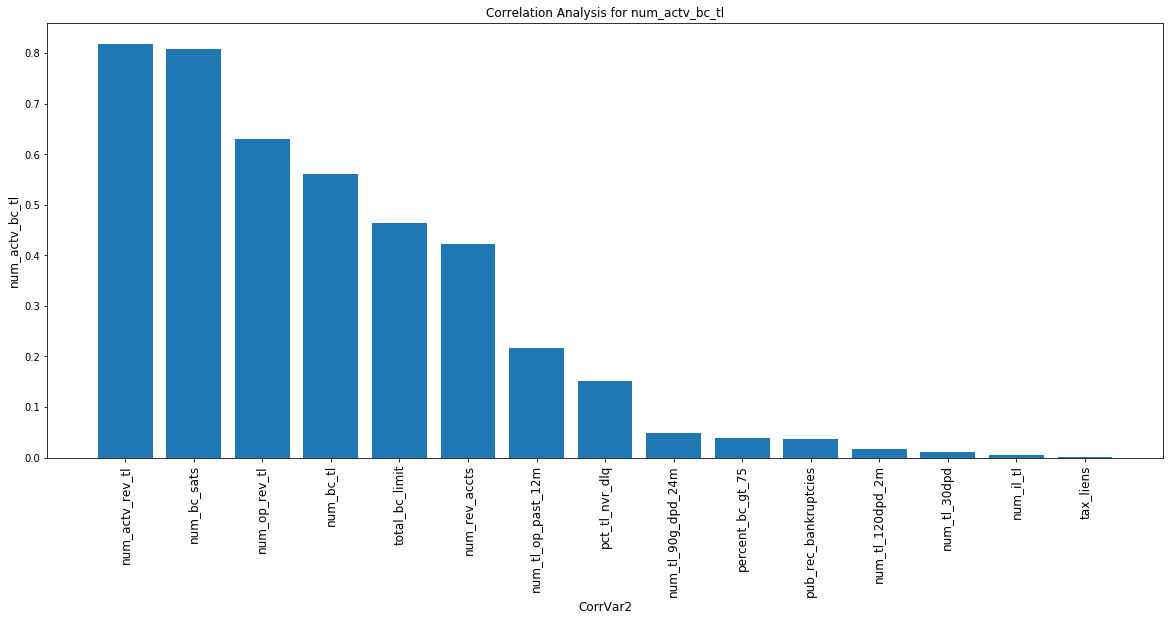

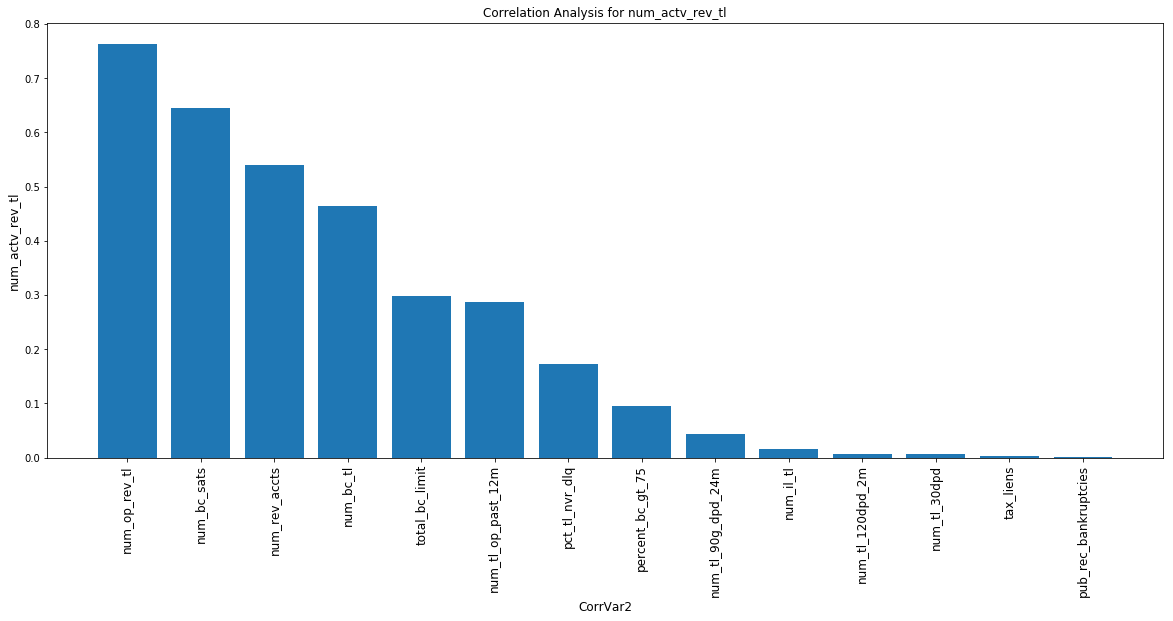

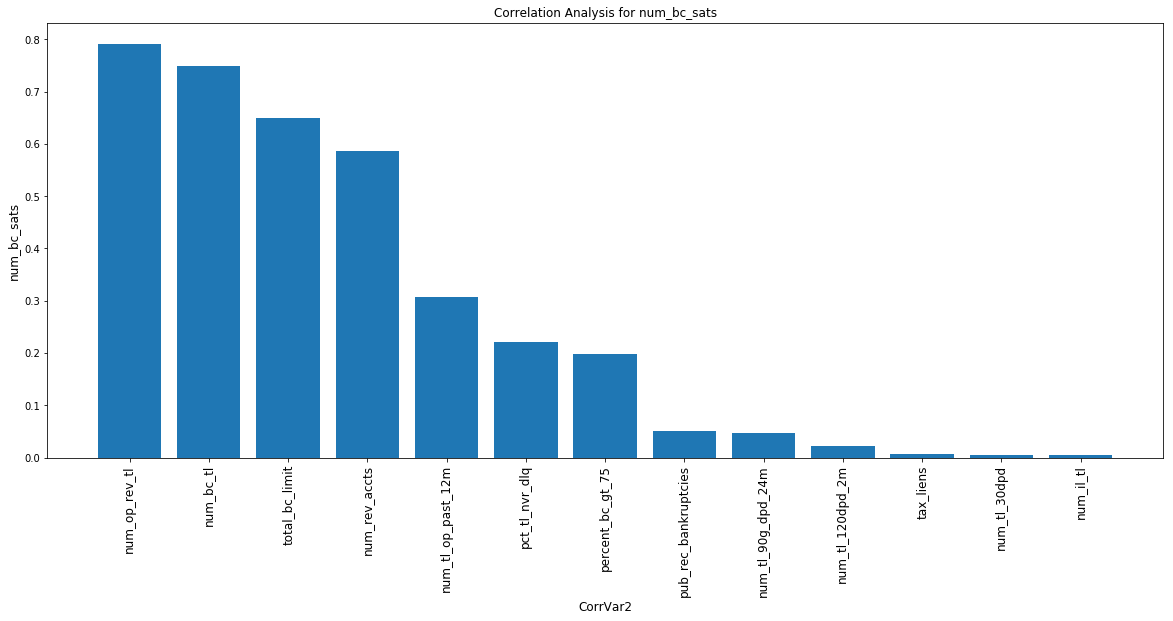

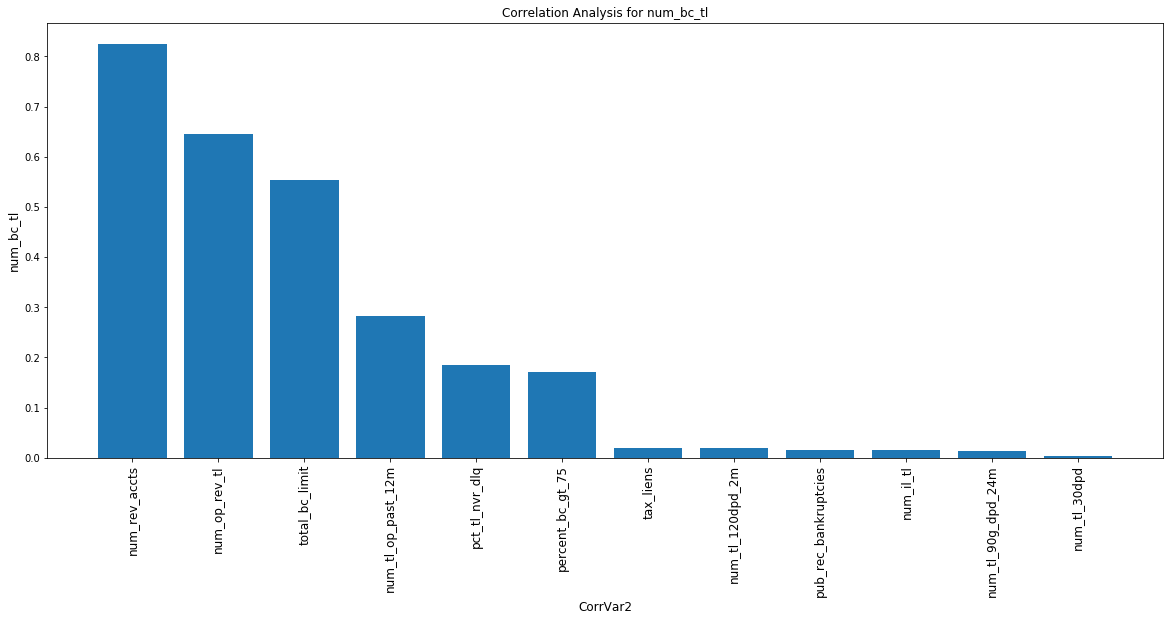

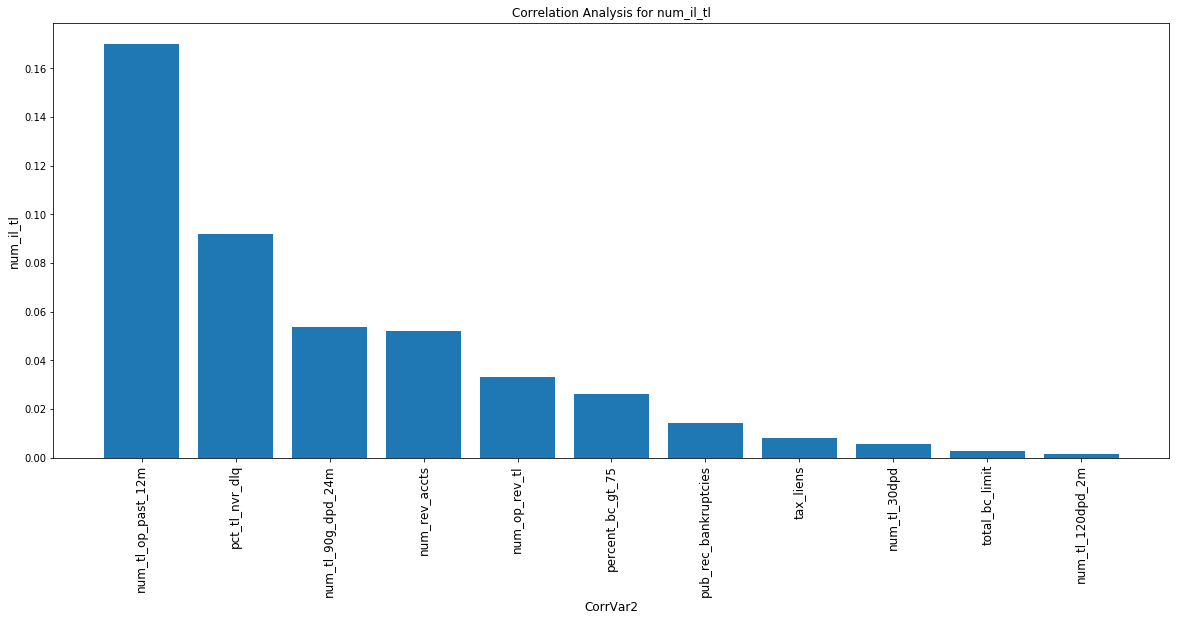

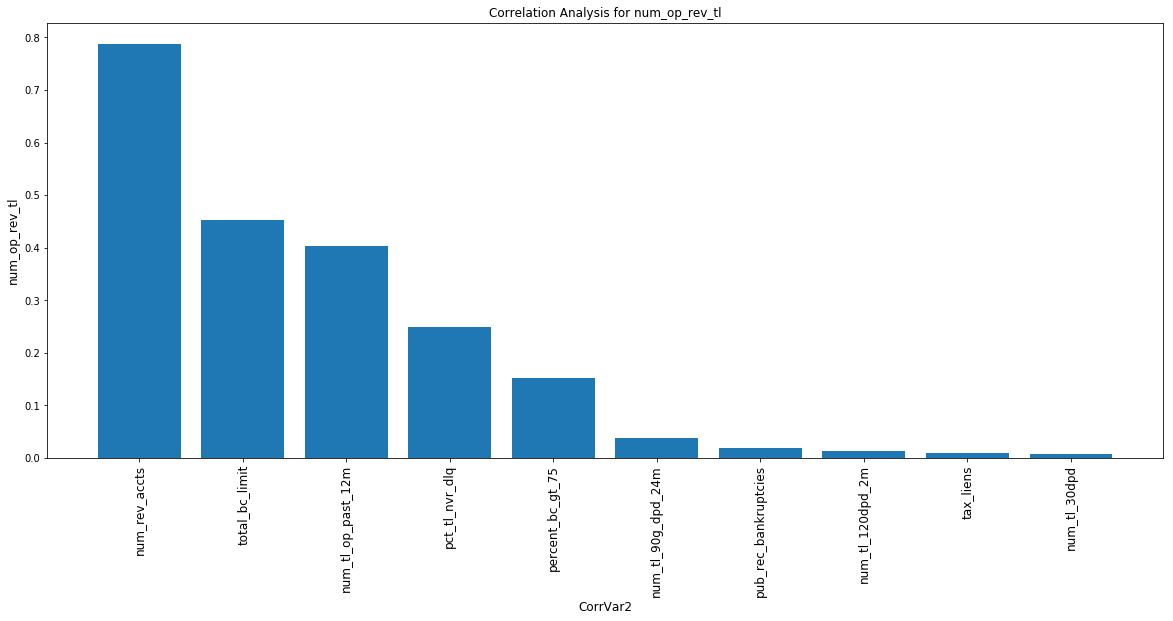

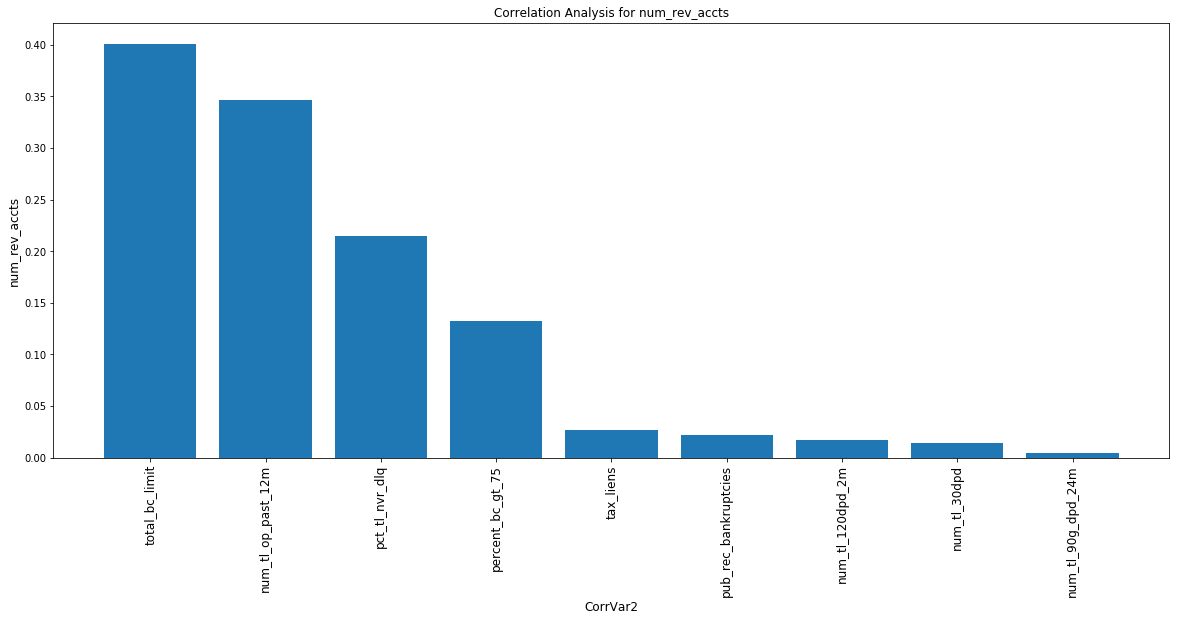

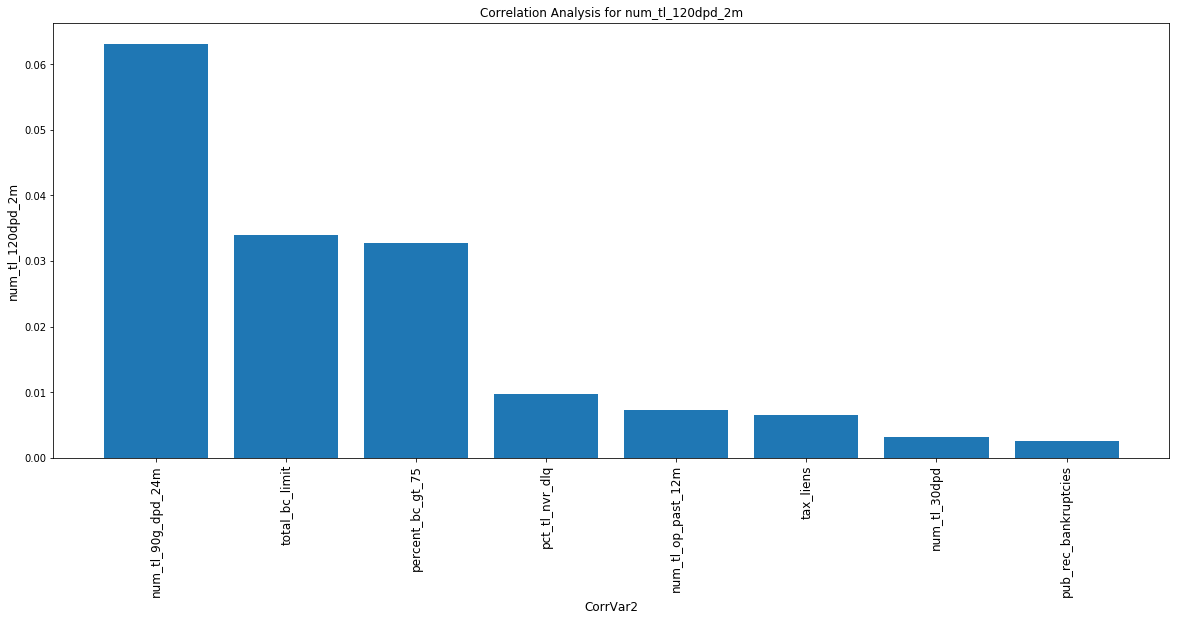

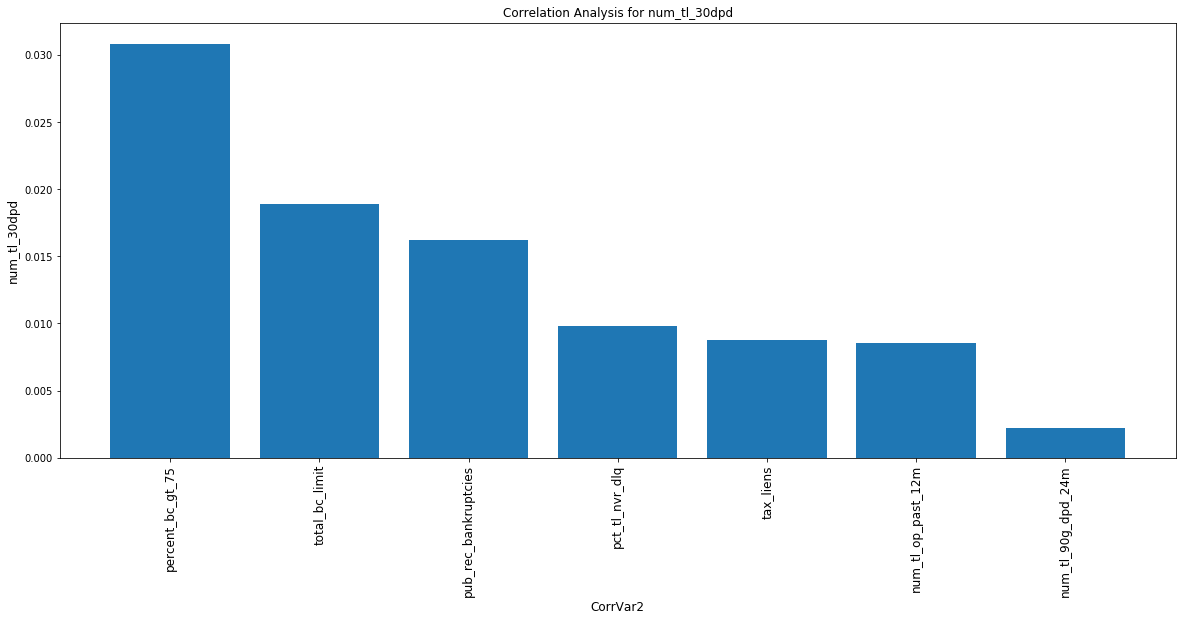

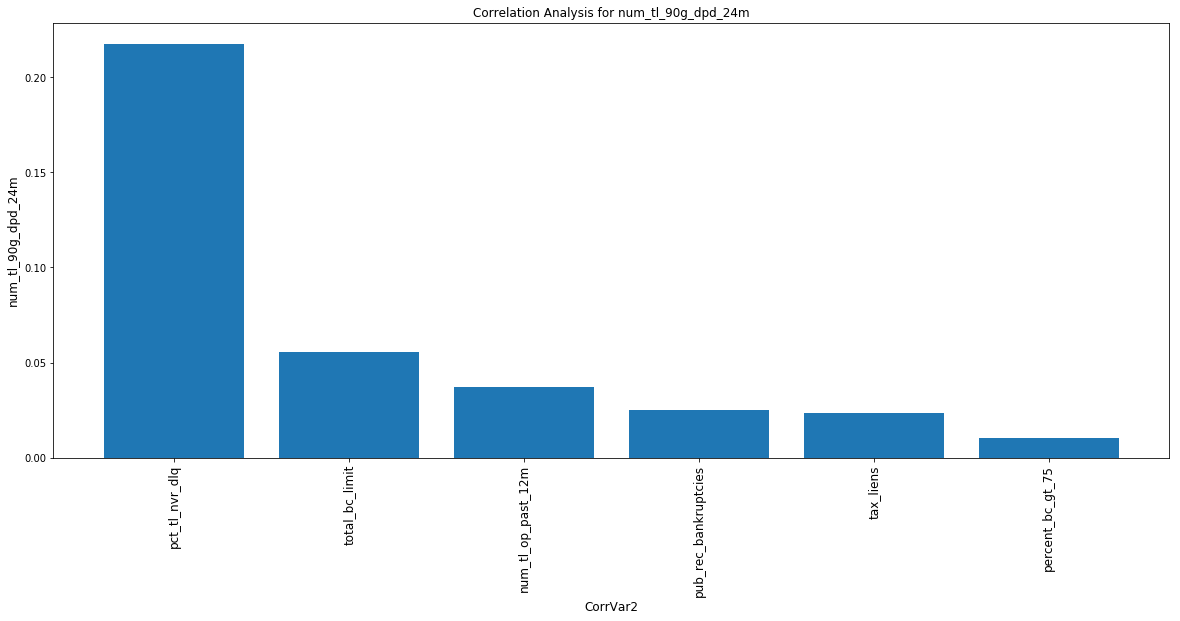

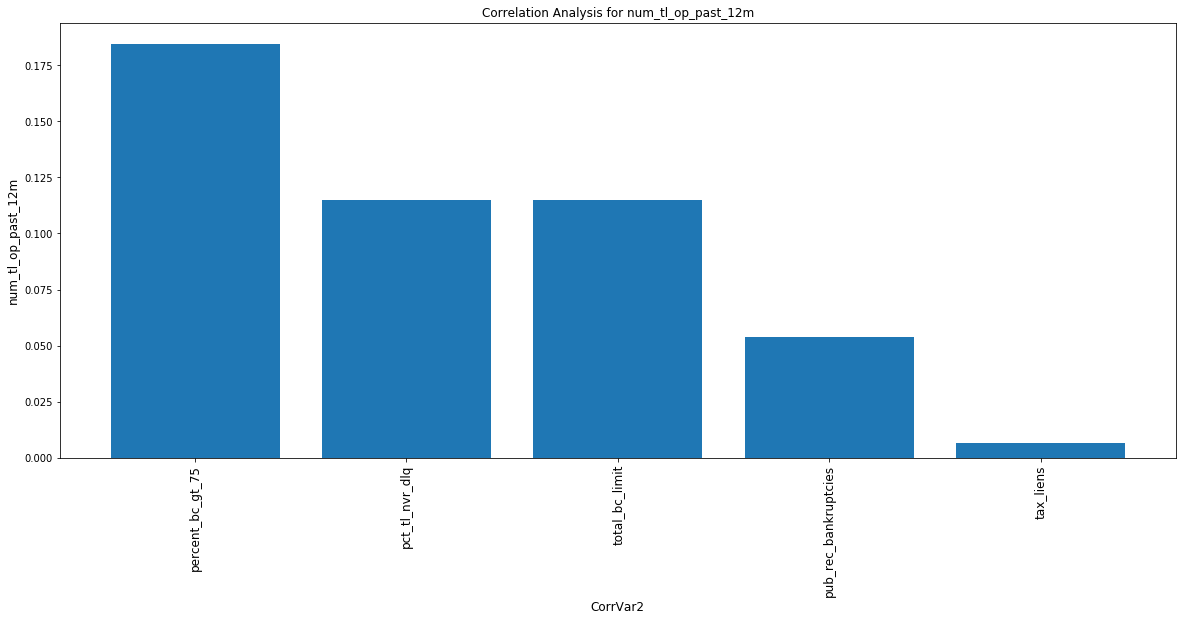

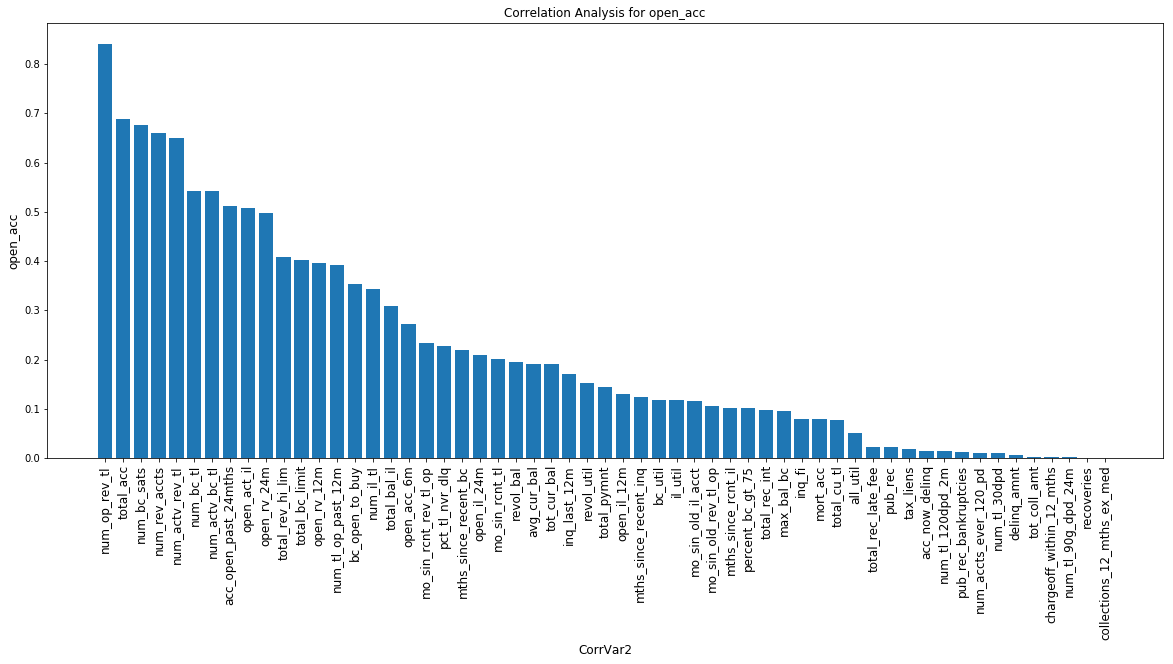

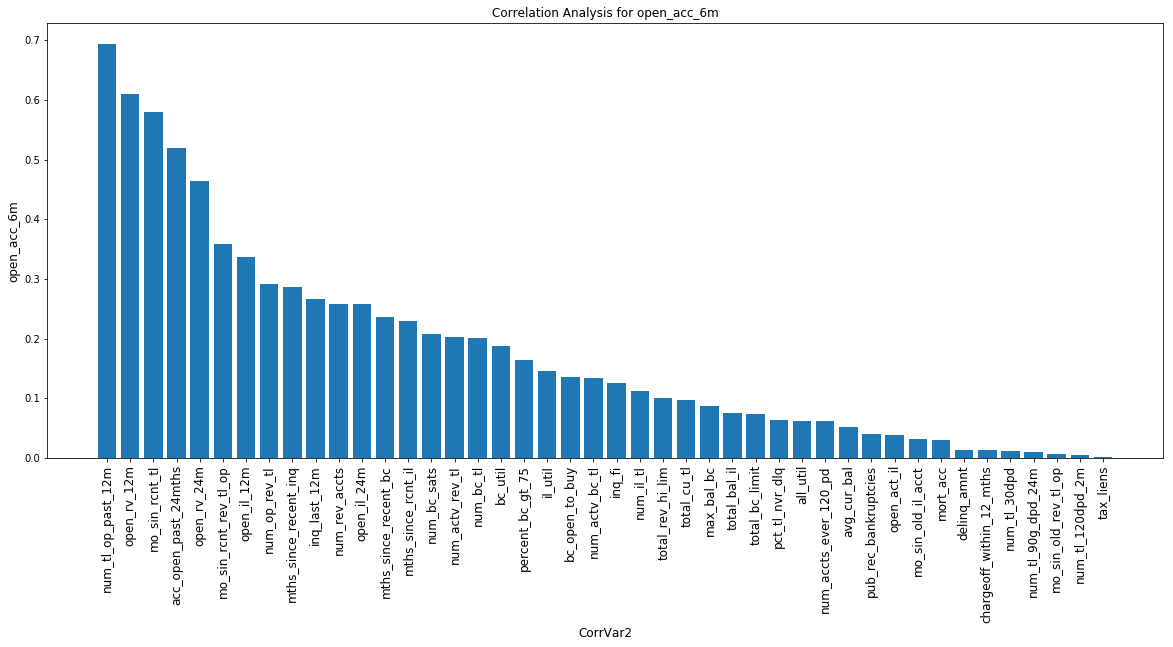

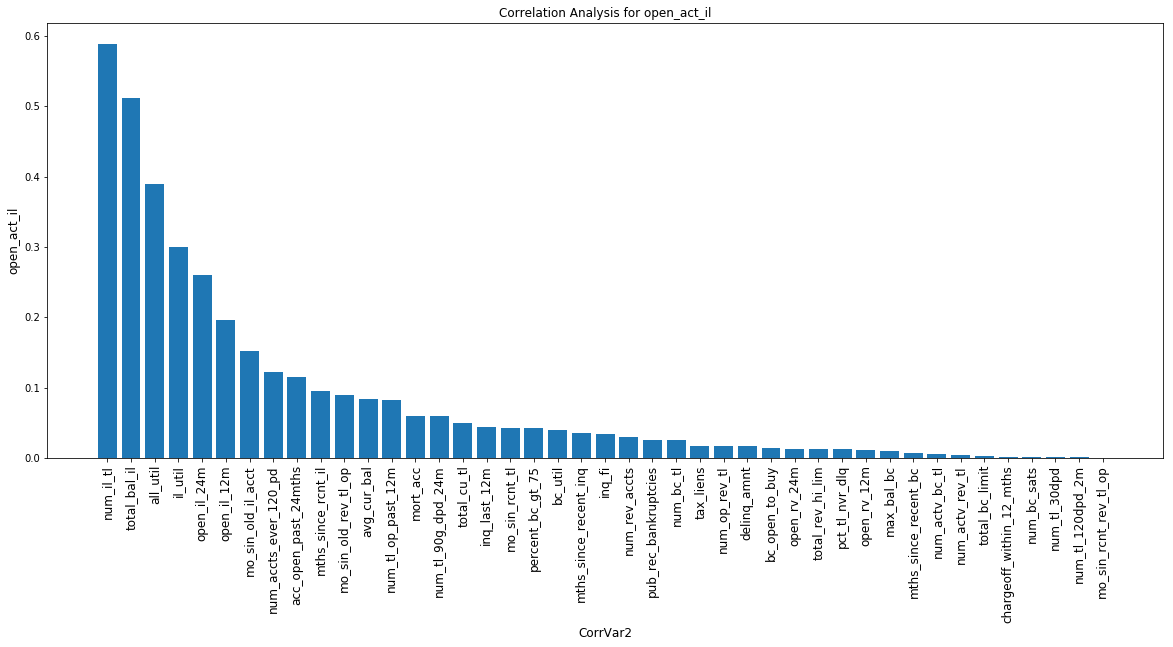

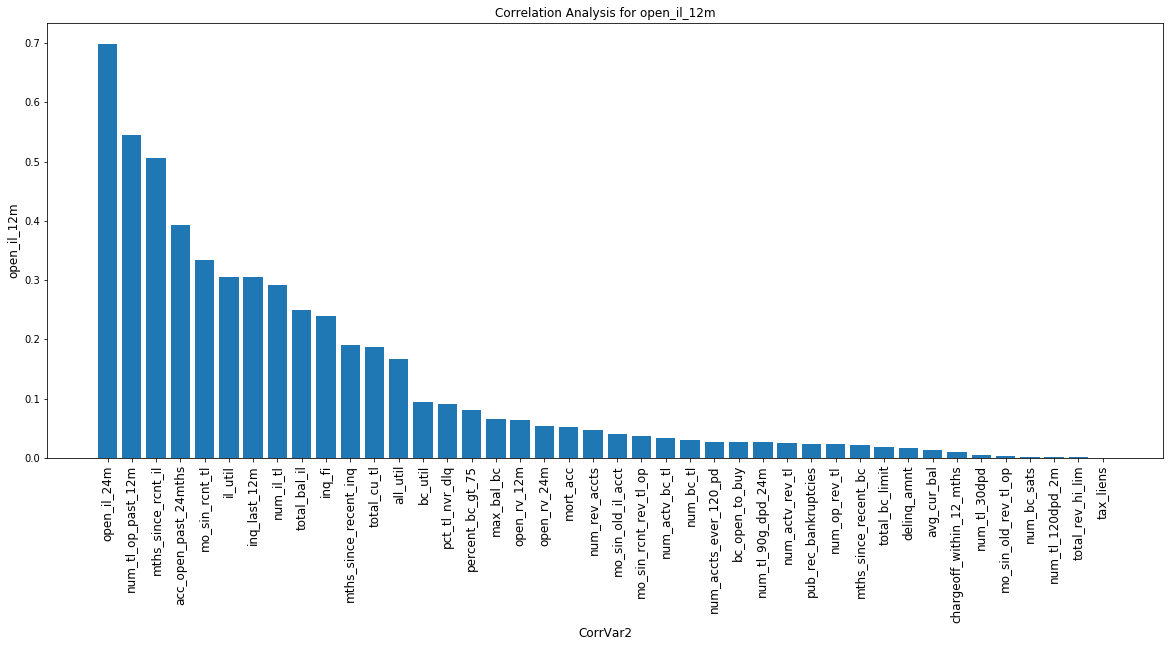

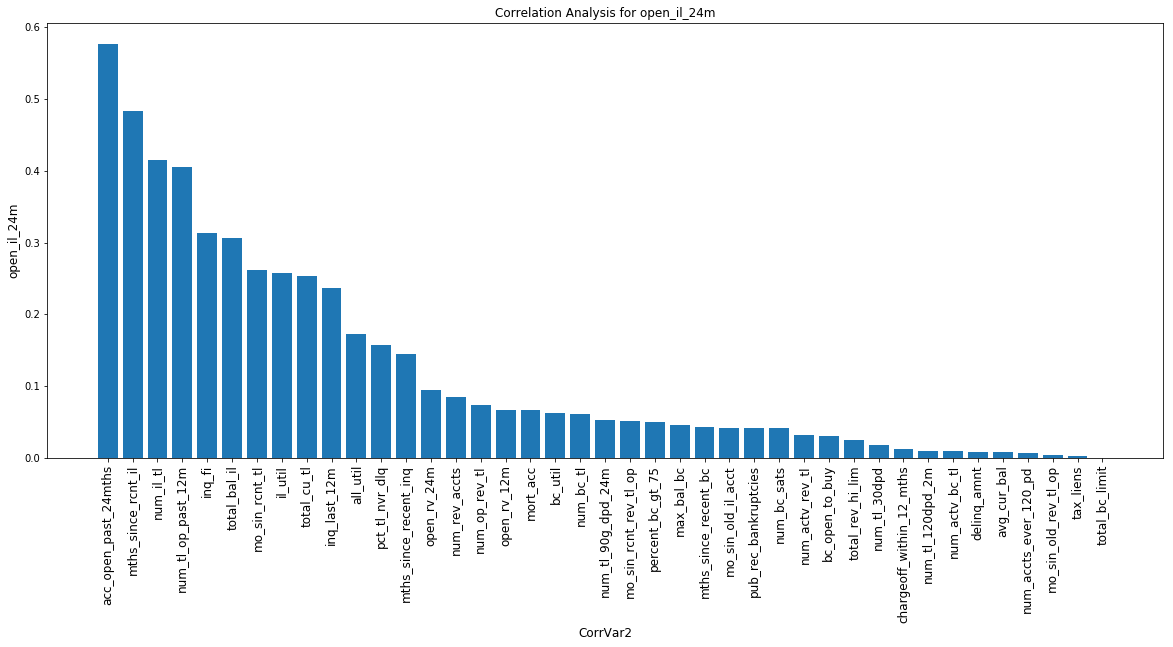

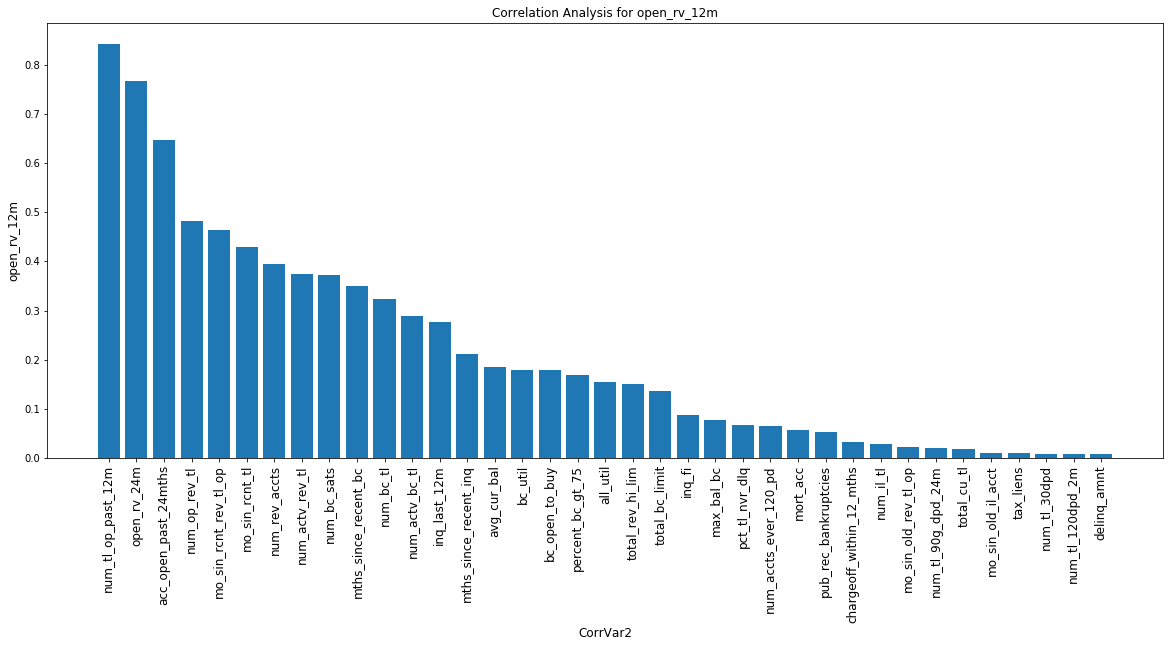

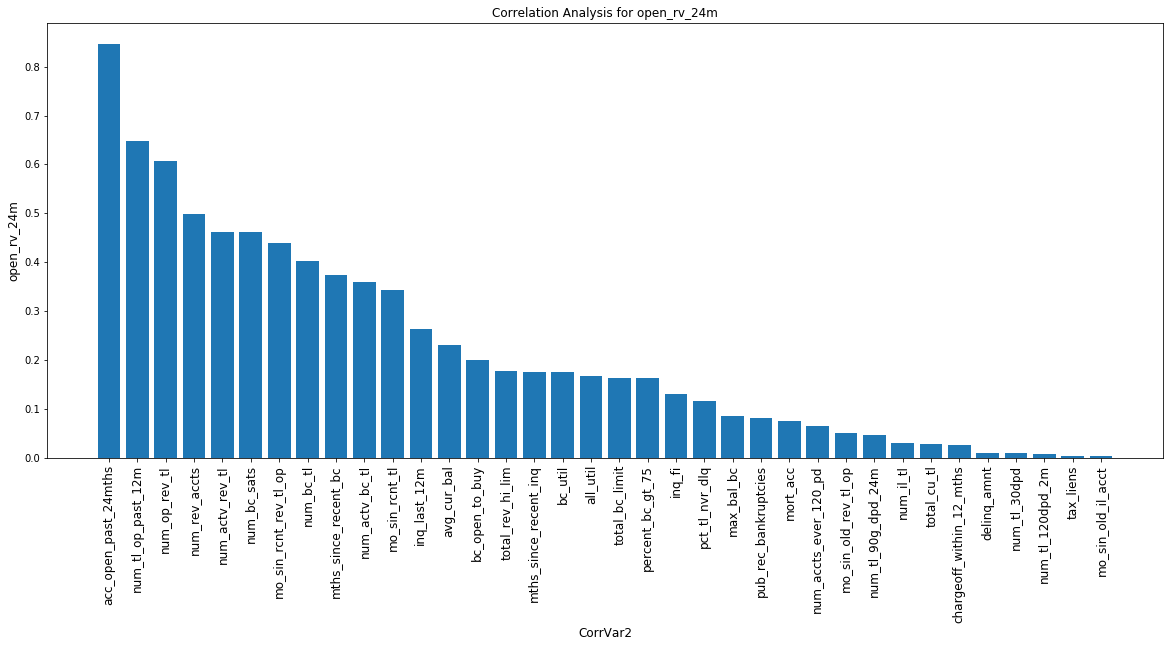

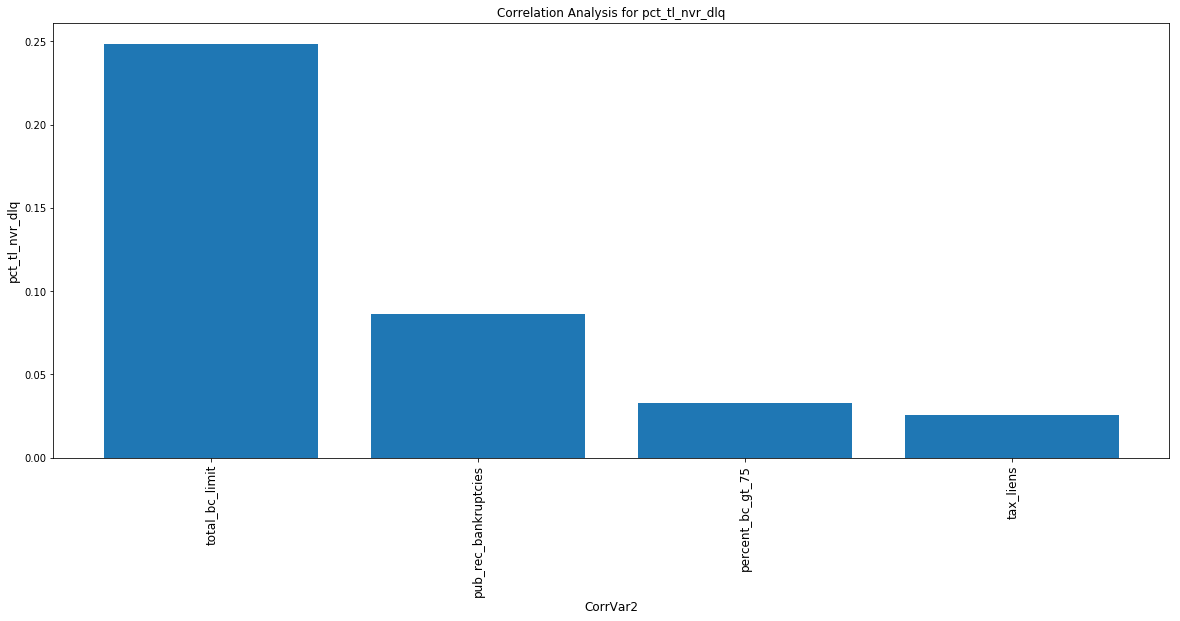

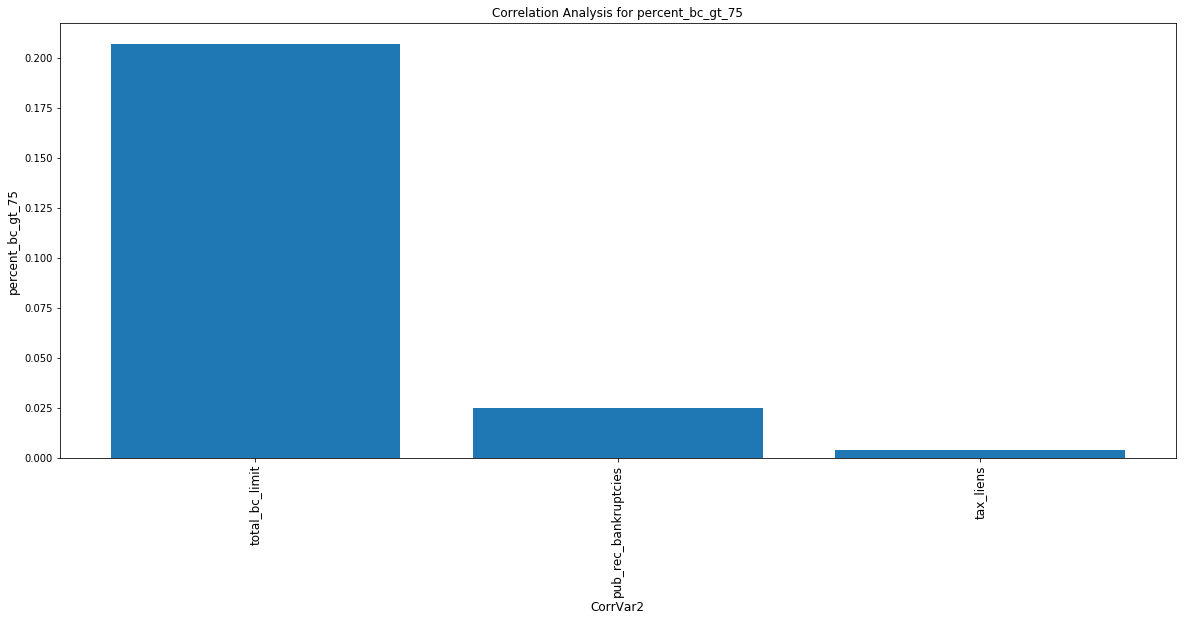

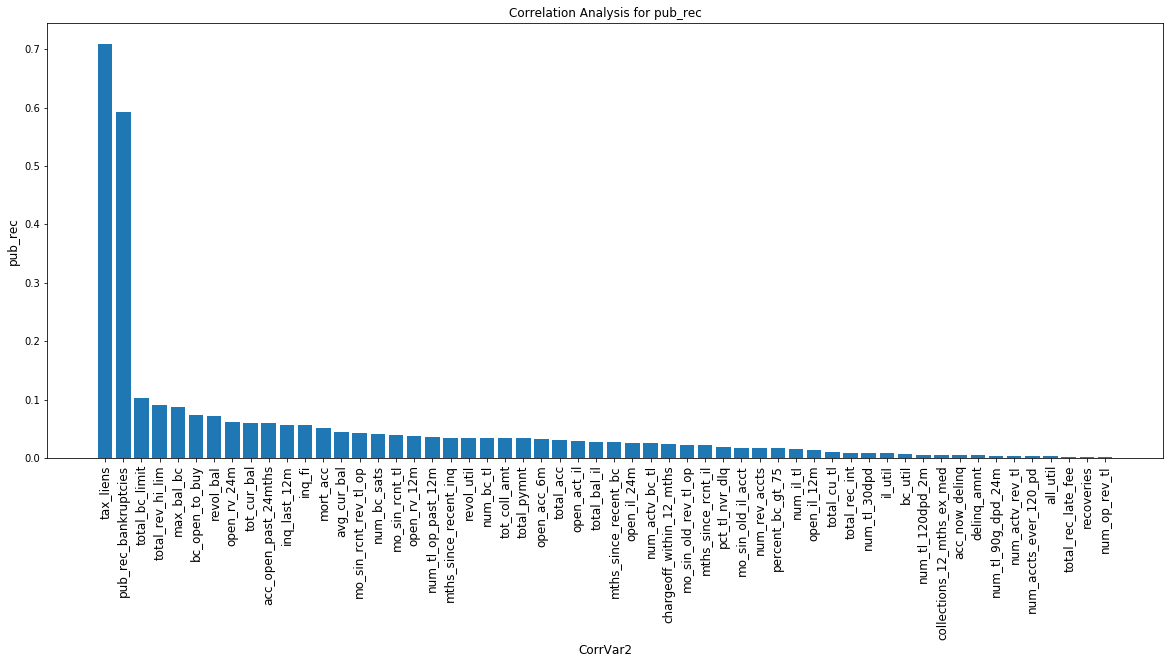

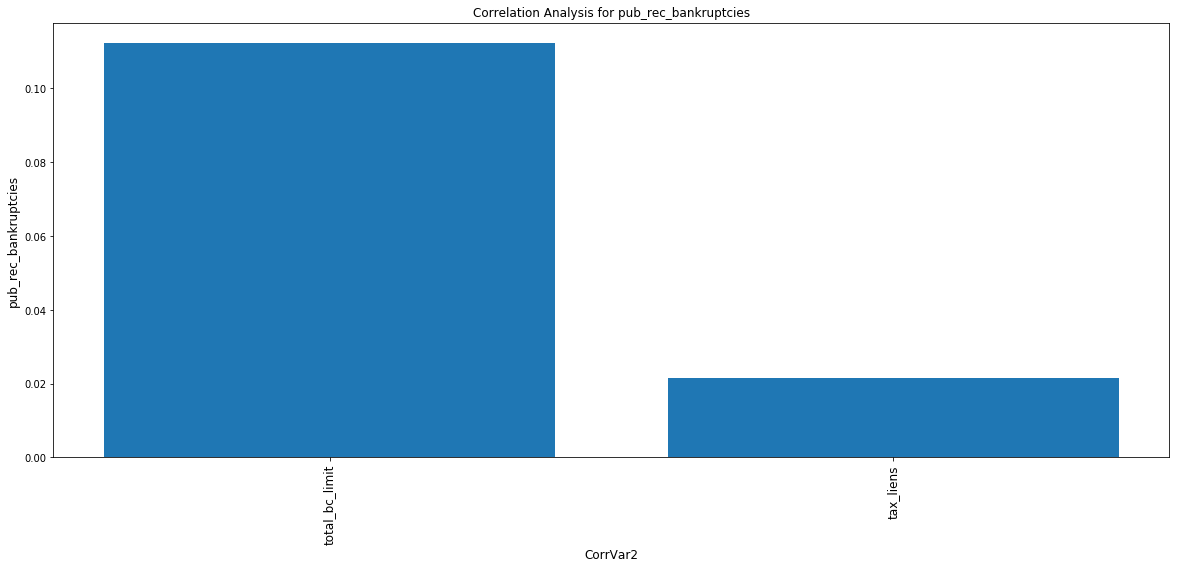

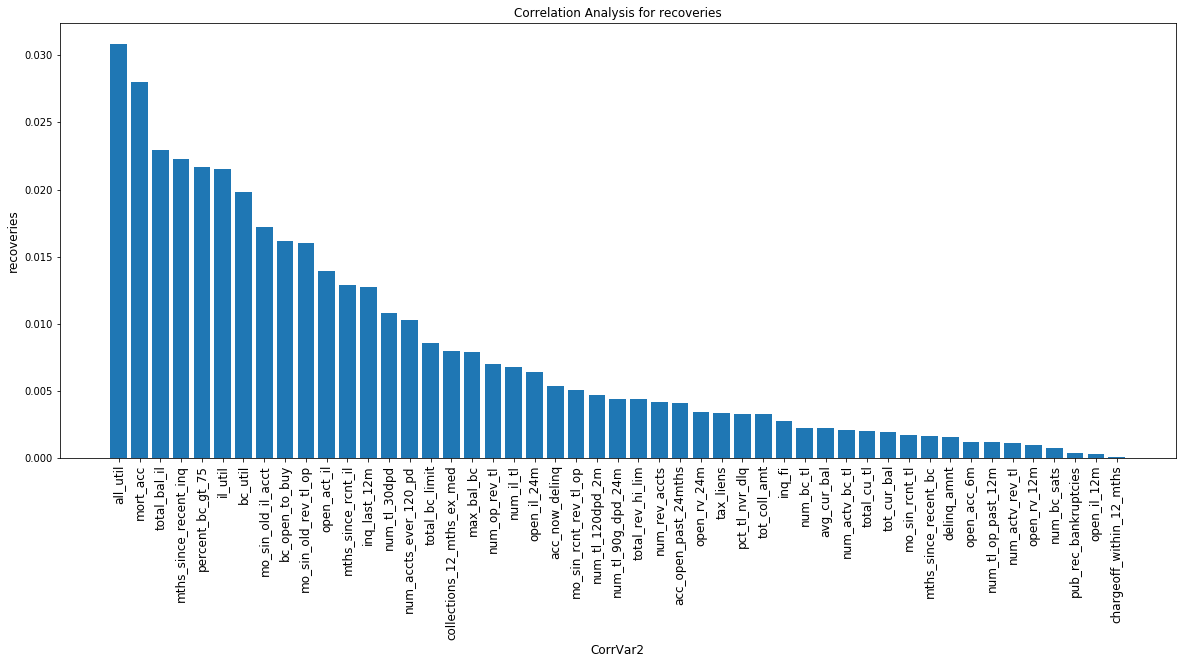

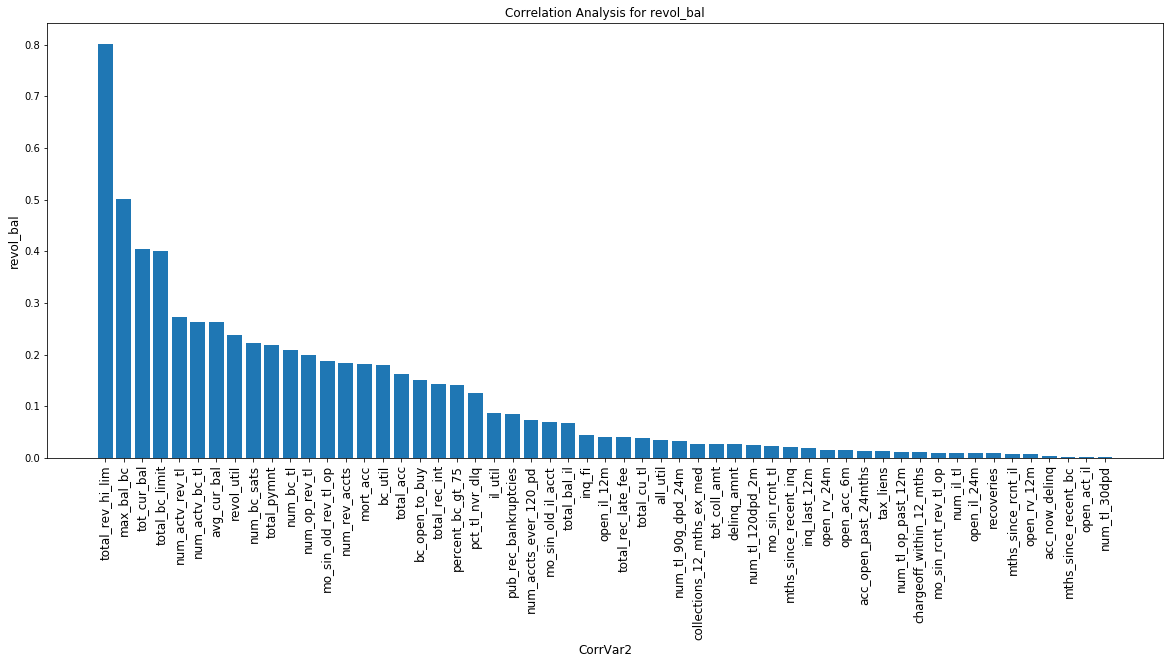

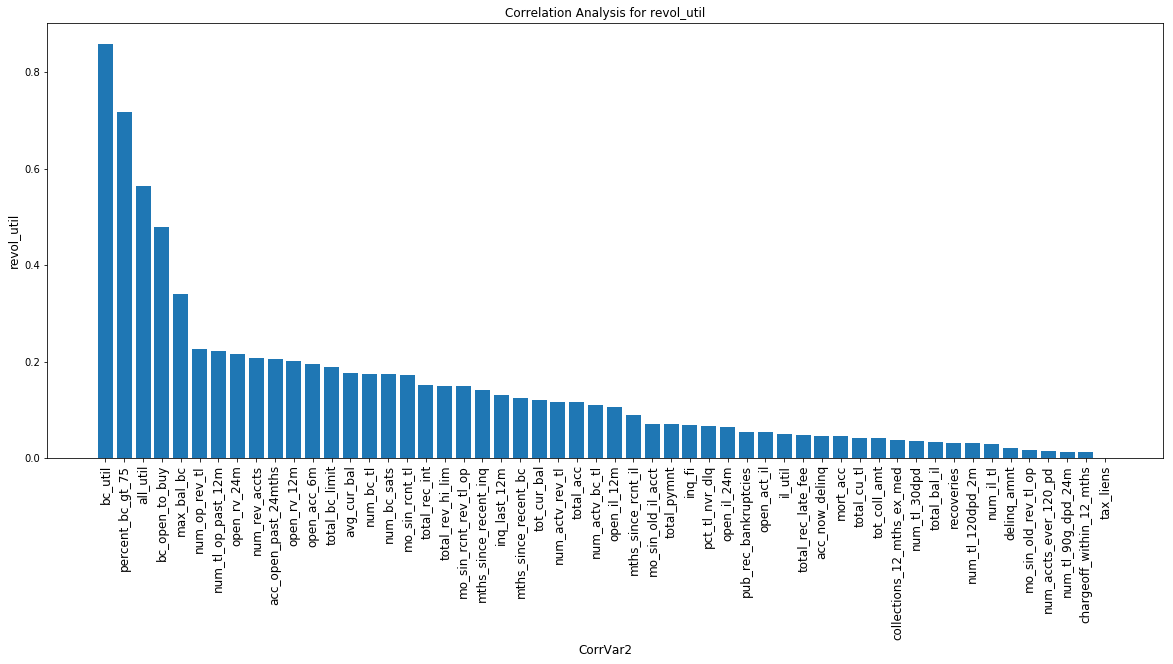

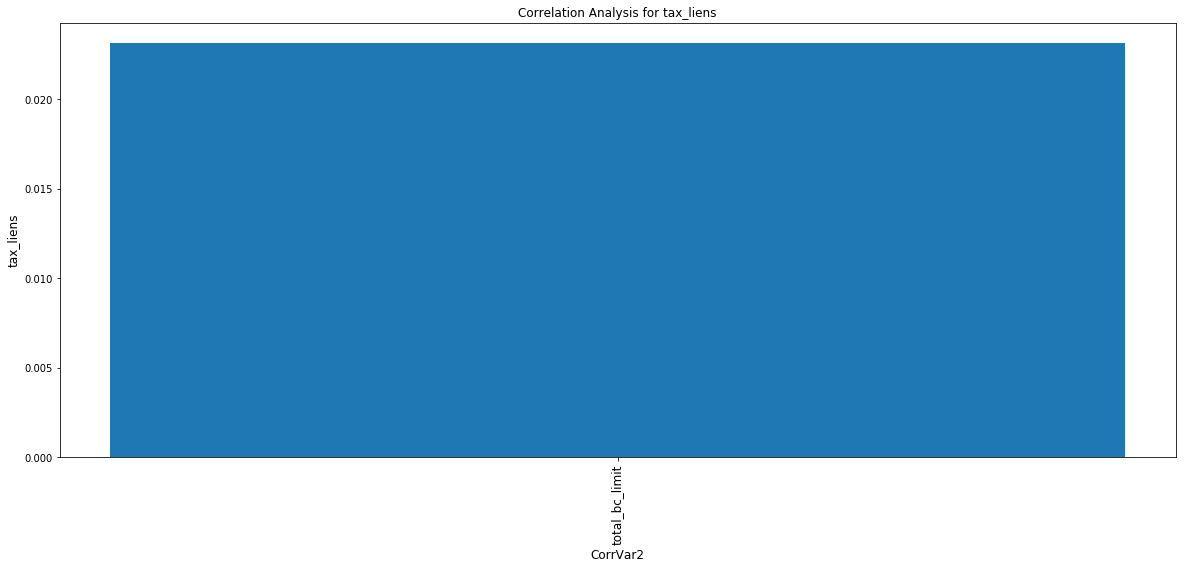

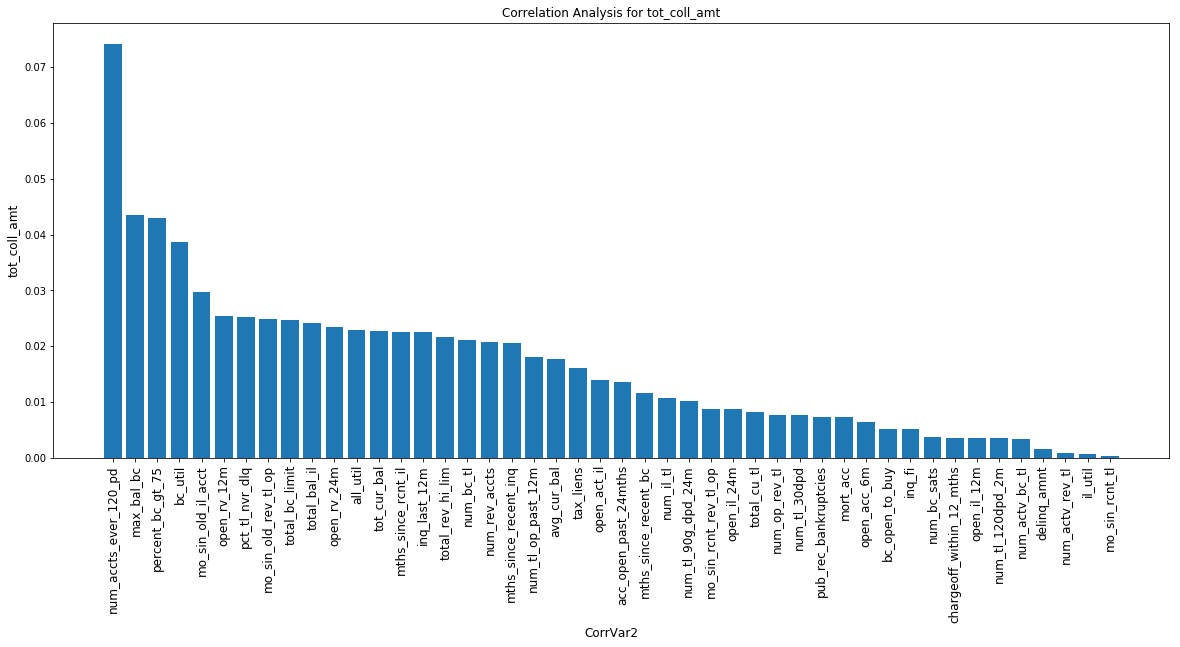

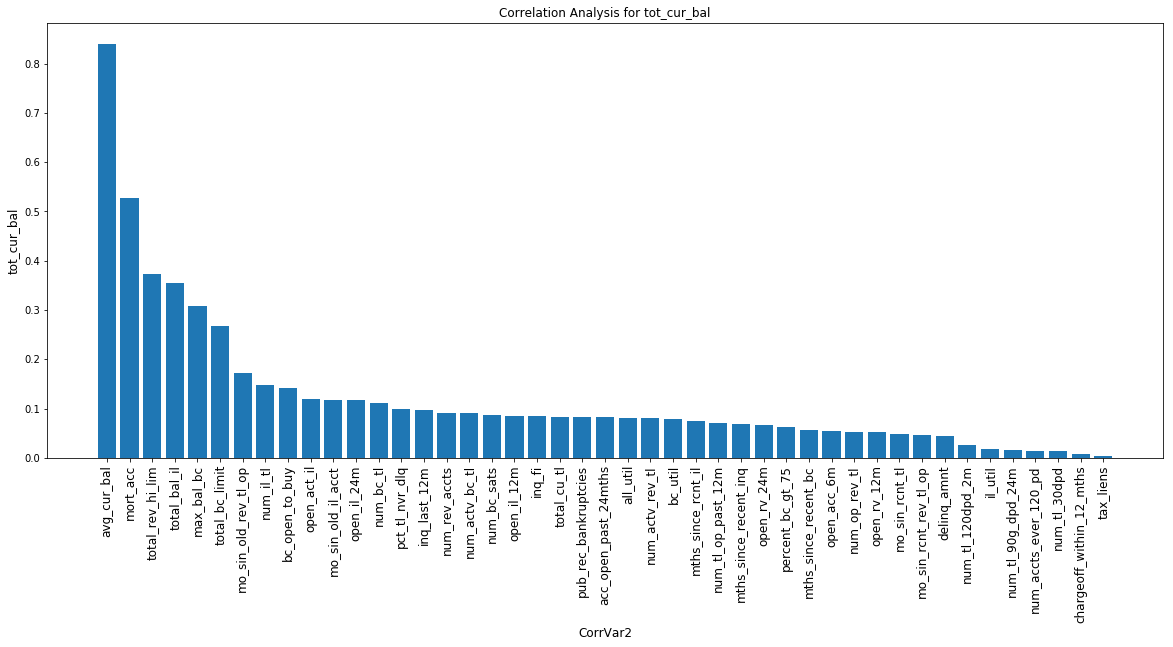

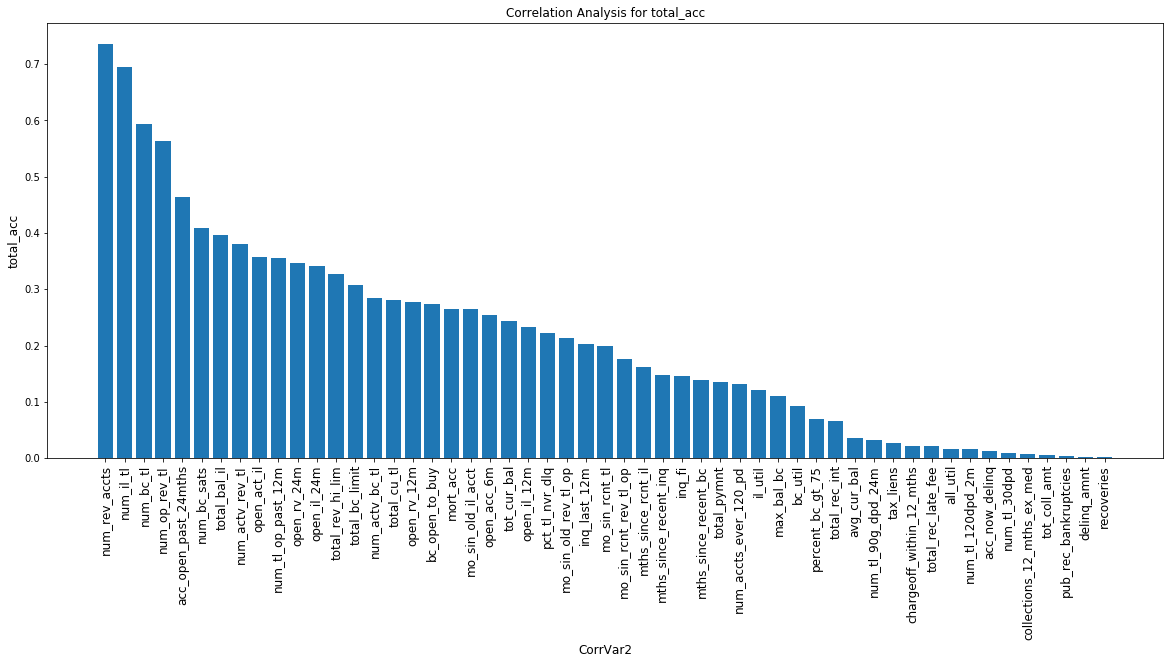

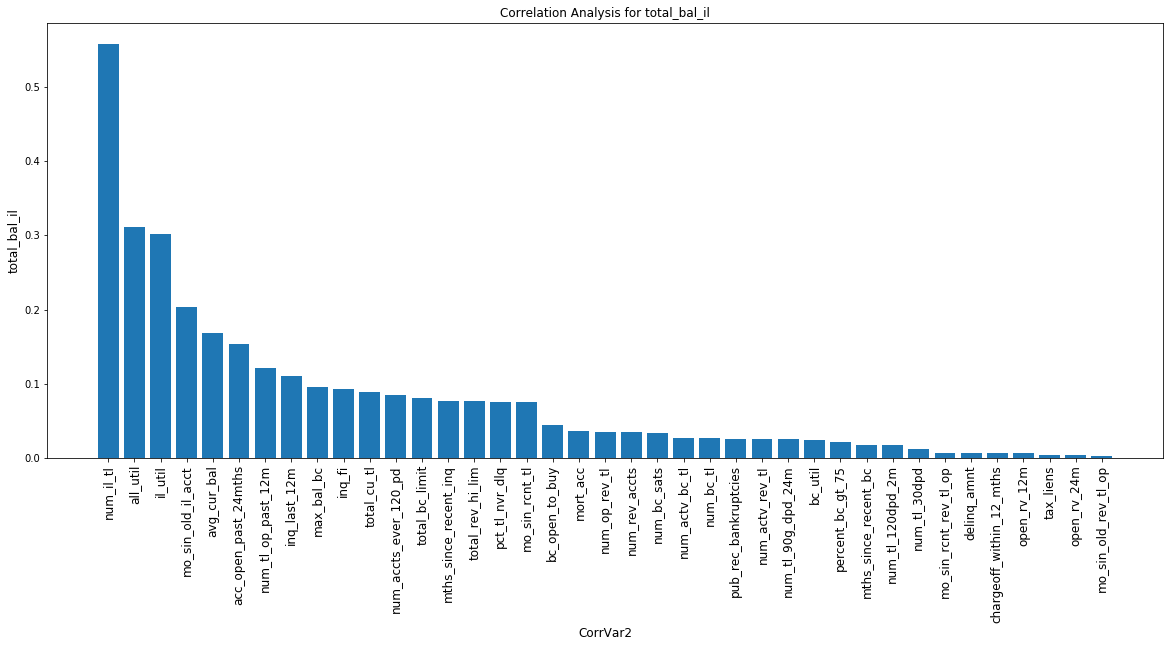

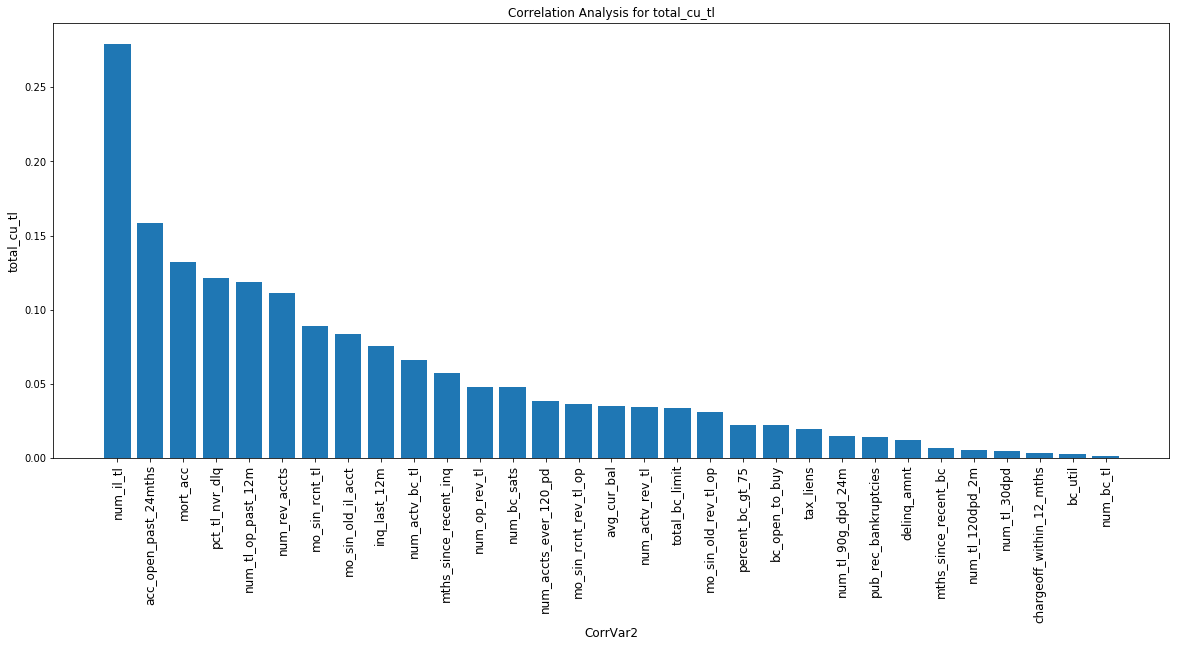

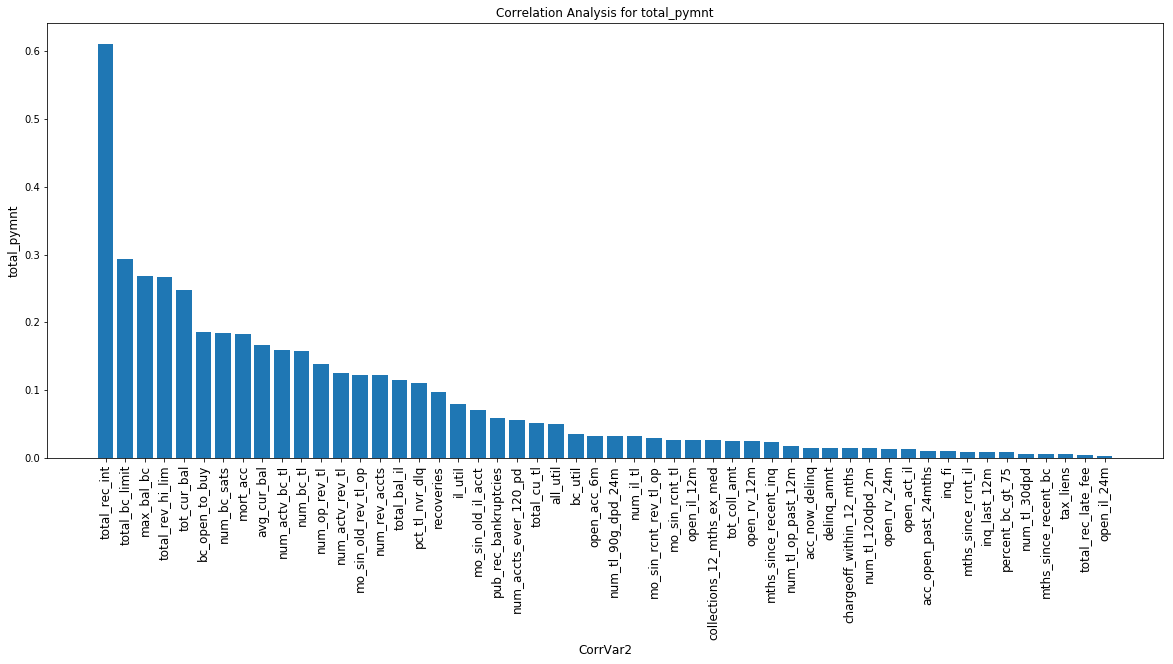

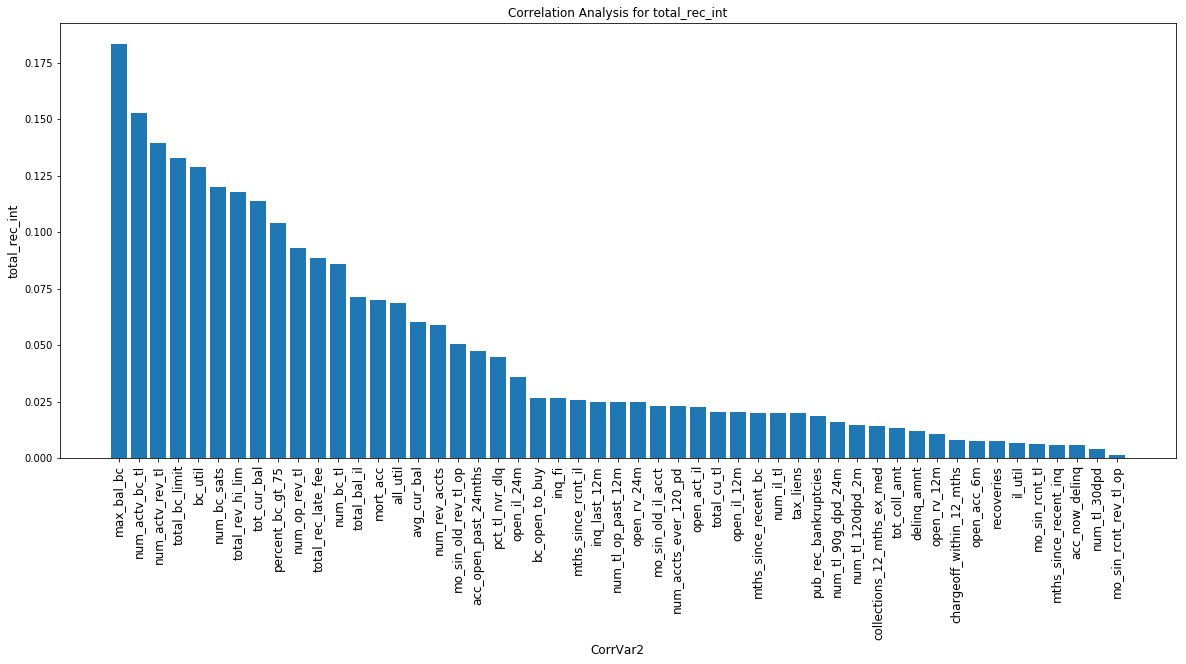

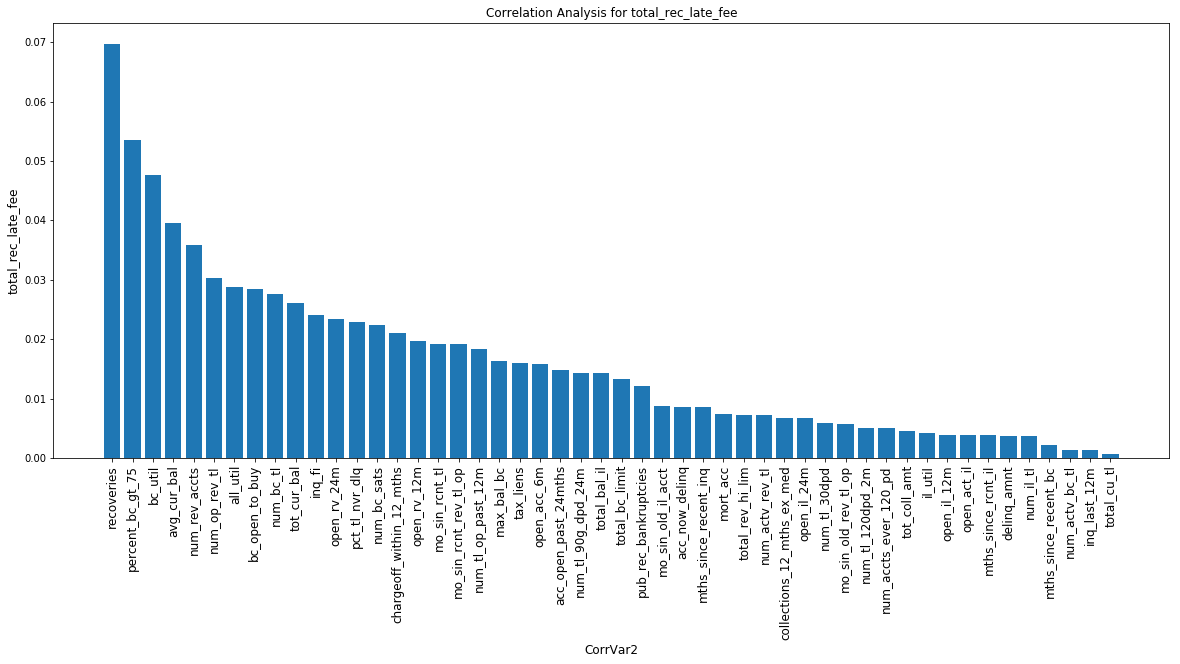

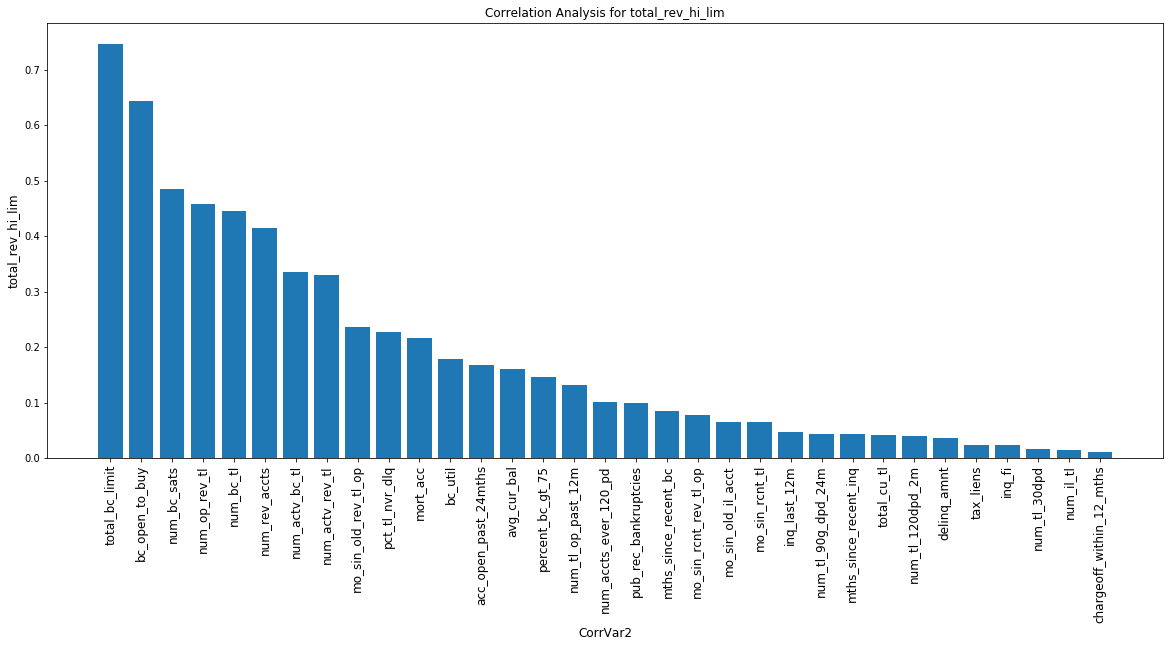

List of common features exhibiting correlation with all other features : {'total_bc_limit'}
List of features not exhibiting correlation with all other features : {'policy_code', 'out_prncp', 'loan_amnt'}


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import *

# Extract list of numeric features
LoanStats_Numeric = set(LoanStatsDF_Clean.toPandas().select_dtypes(include=[np.number]))

# Extract columns exhibiting correlation
corr_matrix = LoanStatsDF_Clean.toPandas().corr().abs()
high_corr_var=np.where(corr_matrix>=0)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y],corr_matrix.iloc[x, y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

# Sort correlation matrix by correlation index in descending order
high_corr_var.sort(key=lambda tup: tup[2], reverse=True)

df = pd.DataFrame(high_corr_var)

df.columns = ['CorrVar1', 'CorrVar2', 'CorrVal']
df1 = df.sort_values(by=['CorrVar1', 'CorrVal'], ascending=[True, False])
uniquevalues = np.unique(df1[['CorrVar1']].values)

d_all = {}
d_exclusive = {}
l = []

for val in uniquevalues:
    label = df1[df1['CorrVar1'] == val]['CorrVar2'].tolist()
    colval = df1[df1['CorrVar1'] == val]['CorrVal'].tolist()
    index = np.arange(len(label))  
    
    #create dictionary of lists for CorrVar2 values of CorrVar1 
    d_all[val] = set(label)
    #create dictionary of lists for LoanStats_Numeric values not in CorrVar2 of CorrVar1 
    d_exclusive[val] = LoanStats_Numeric.symmetric_difference(set(label))
    
    fig=plt.figure(figsize=(20,8))
    plt.bar(index, colval)
    plt.xlabel('CorrVar2', fontsize=12)
    plt.ylabel(val, fontsize=12)
    plt.xticks(index, label, fontsize=12, rotation=90)
    plt.title("Correlation Analysis for " + val)
    plt.show()

print("List of common features exhibiting correlation with all other features : {0}".format(set.intersection(*d_all.values())))
print("List of features not exhibiting correlation with all other features : {0}".format(set.intersection(*d_exclusive.values())))

__Remarks__:

1. “tax_liens” column has correlation only with the “total_bc_limit” column.
2. "total_bc_limit" column exhibit some correlation with all other numerical columns.
3. "policy_code", "out_prncp" and "loan_amnt" columns do not exhibit correlation with all other numerical columns.

### 4. Visualization

#### 4.1. Histogram

Next, we check the distribution profile of the numerical columns using histograms

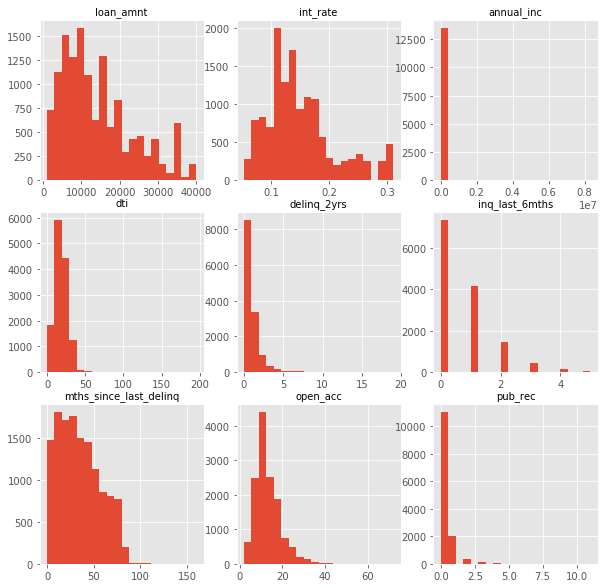

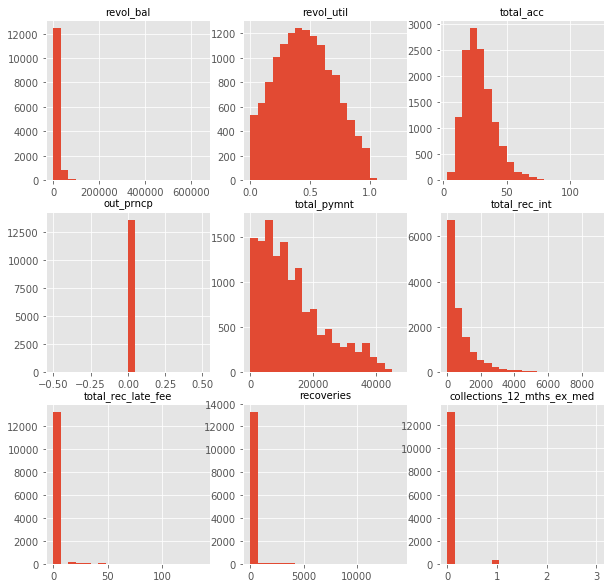

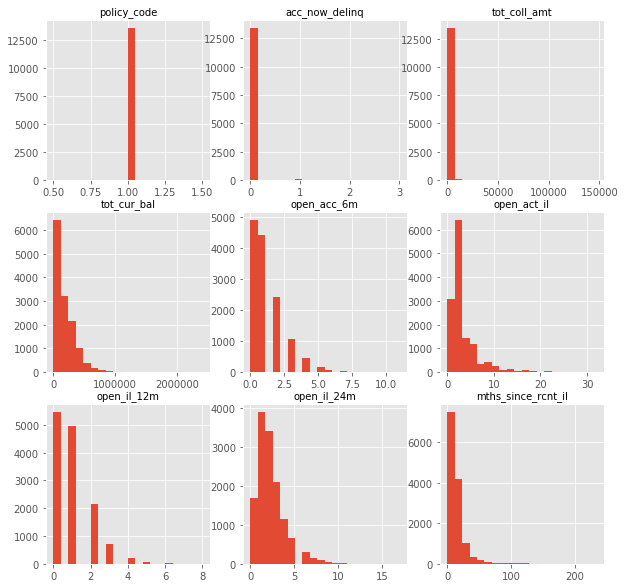

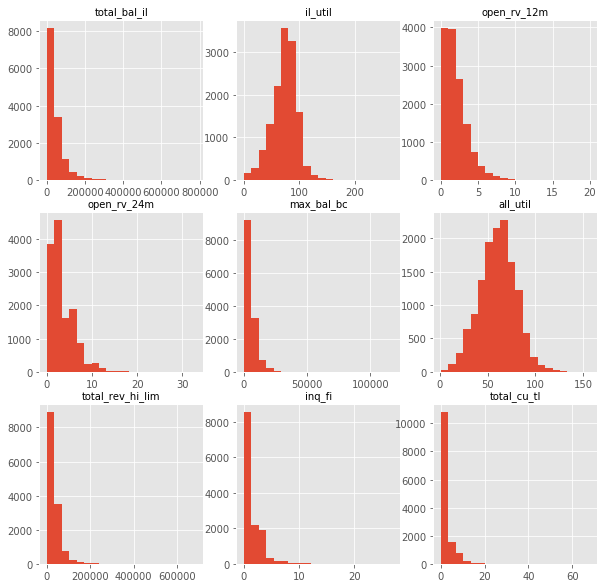

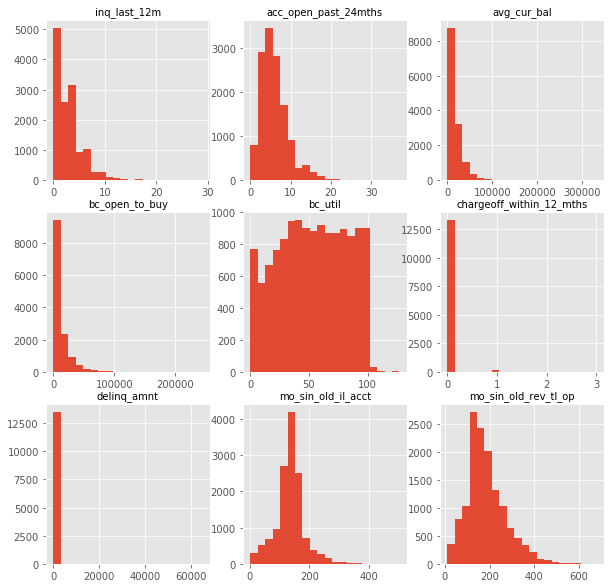

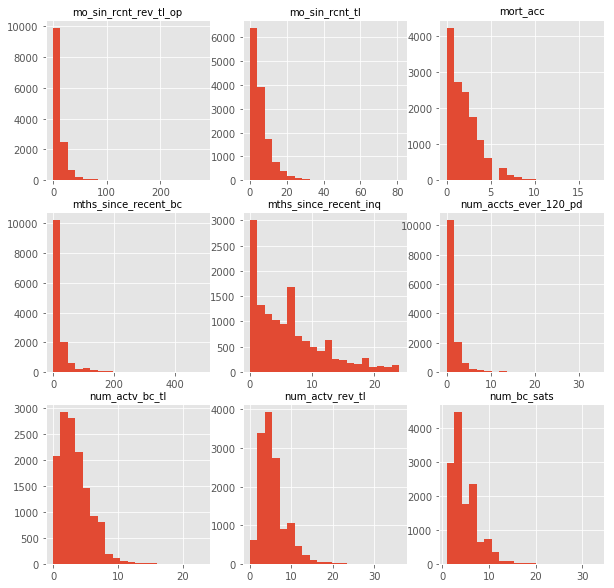

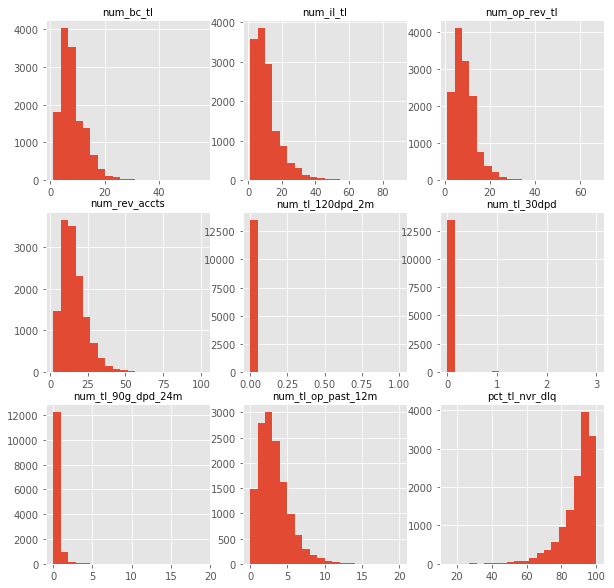

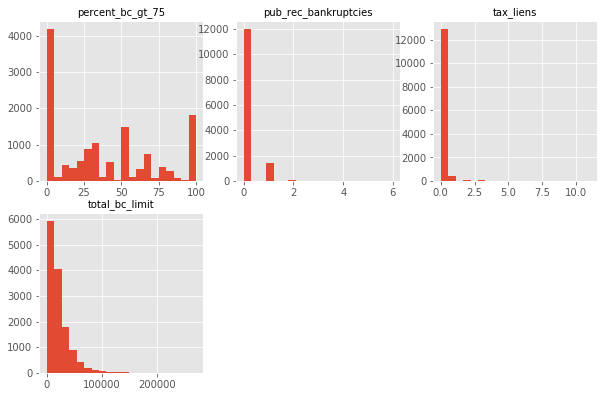

In [9]:
#Plot Histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#col_list = list(LoanStatsDF_Clean.toPandas().select_dtypes(include=[np.number]).columns.values)
LoanStats_Numeric = LoanStatsDF_Clean.toPandas().select_dtypes(include=[np.number])
    
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(10,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name, fontsize=10)
    plt.show()
    
for i in range(0,len(LoanStats_Numeric.columns),9):
    draw_histograms(LoanStats_Numeric, LoanStats_Numeric.columns[i:i+9], 3, 3)

__Remarks:__

From the histogram plots for each numerical feature above, it is observed that except for "all_util" and "revo_util" columns which exhibits gaussian distribution characteristics, all others exhibit lognormal characteristics and depending on the learning model used for prediction, data normalization may be required.

#### 4.2. Box Plots

Next, we check the correlation between numerical columns against loan status (for "Charged Off" and "Fully Paid" cases) using box plots

              Boxplots of numerical features against 'Loan Status'              


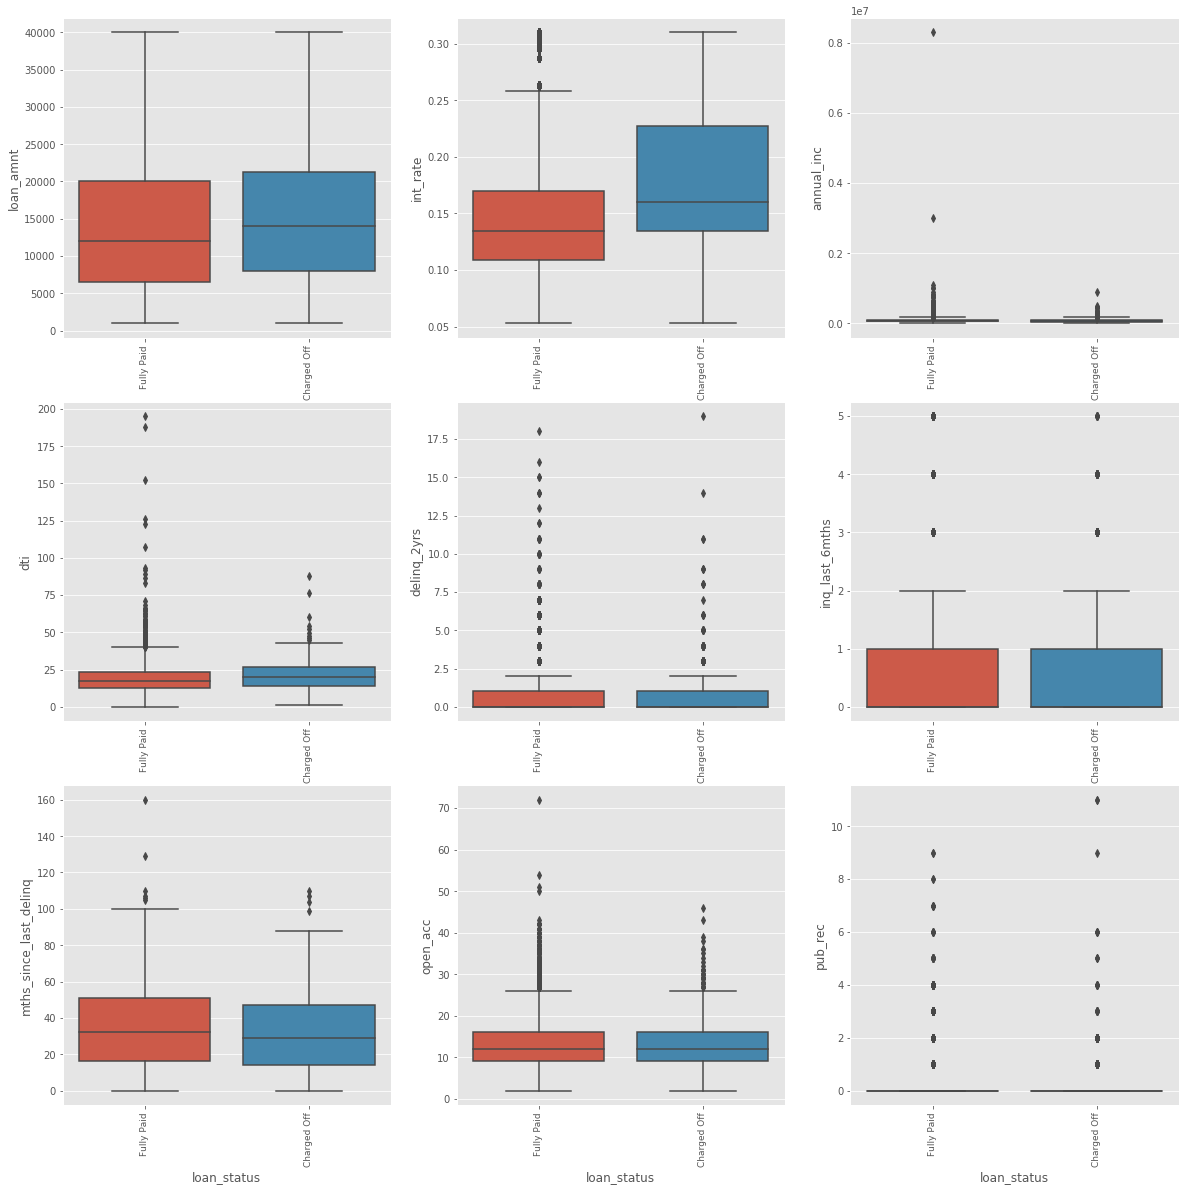

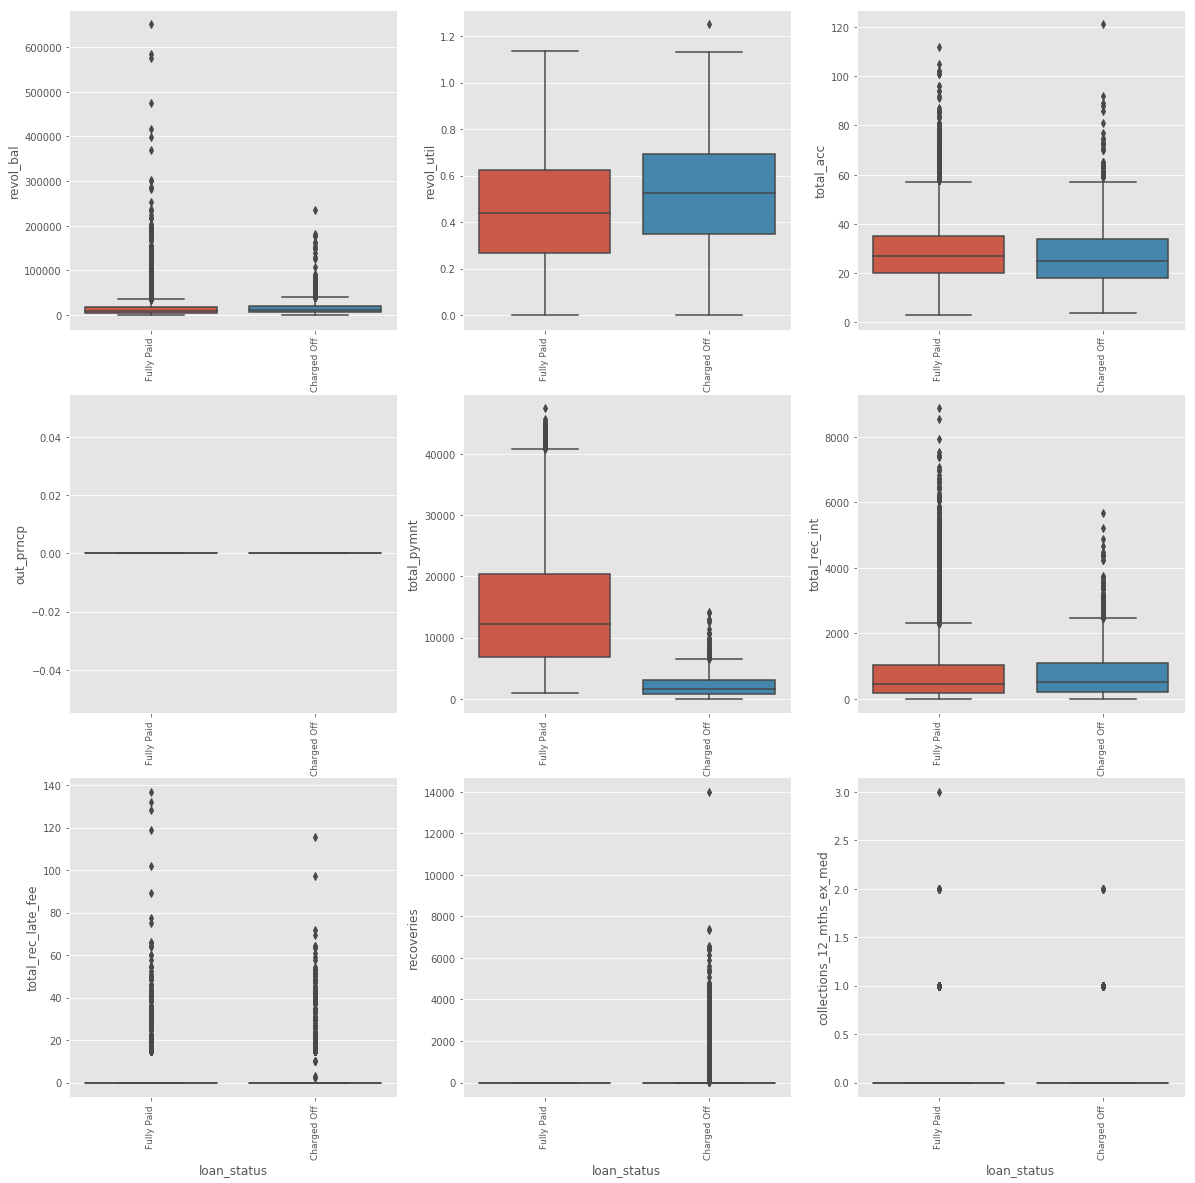

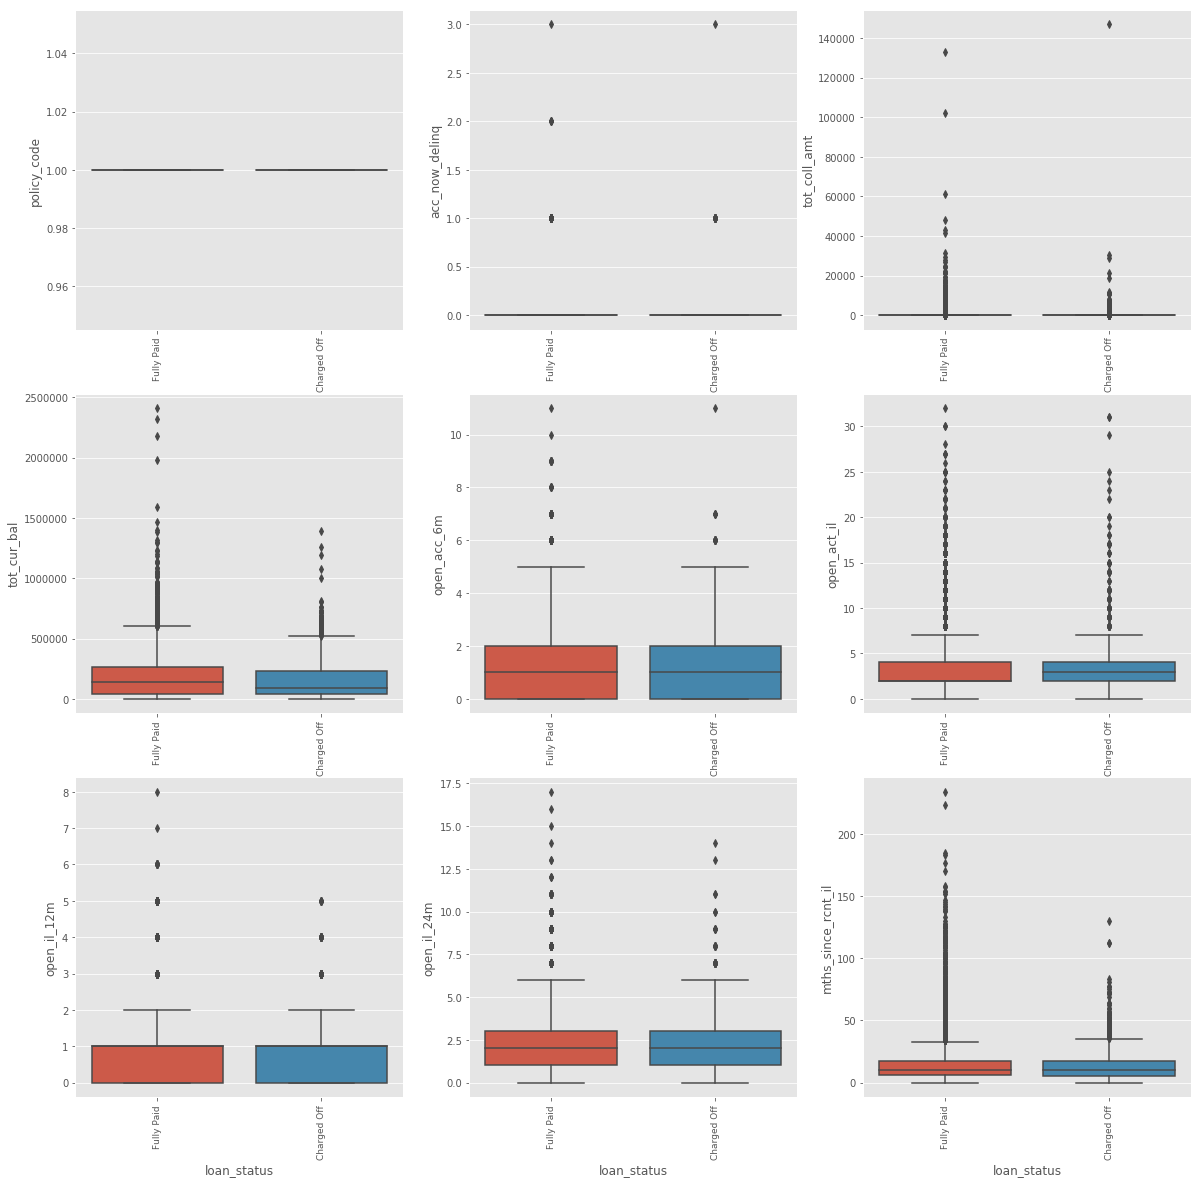

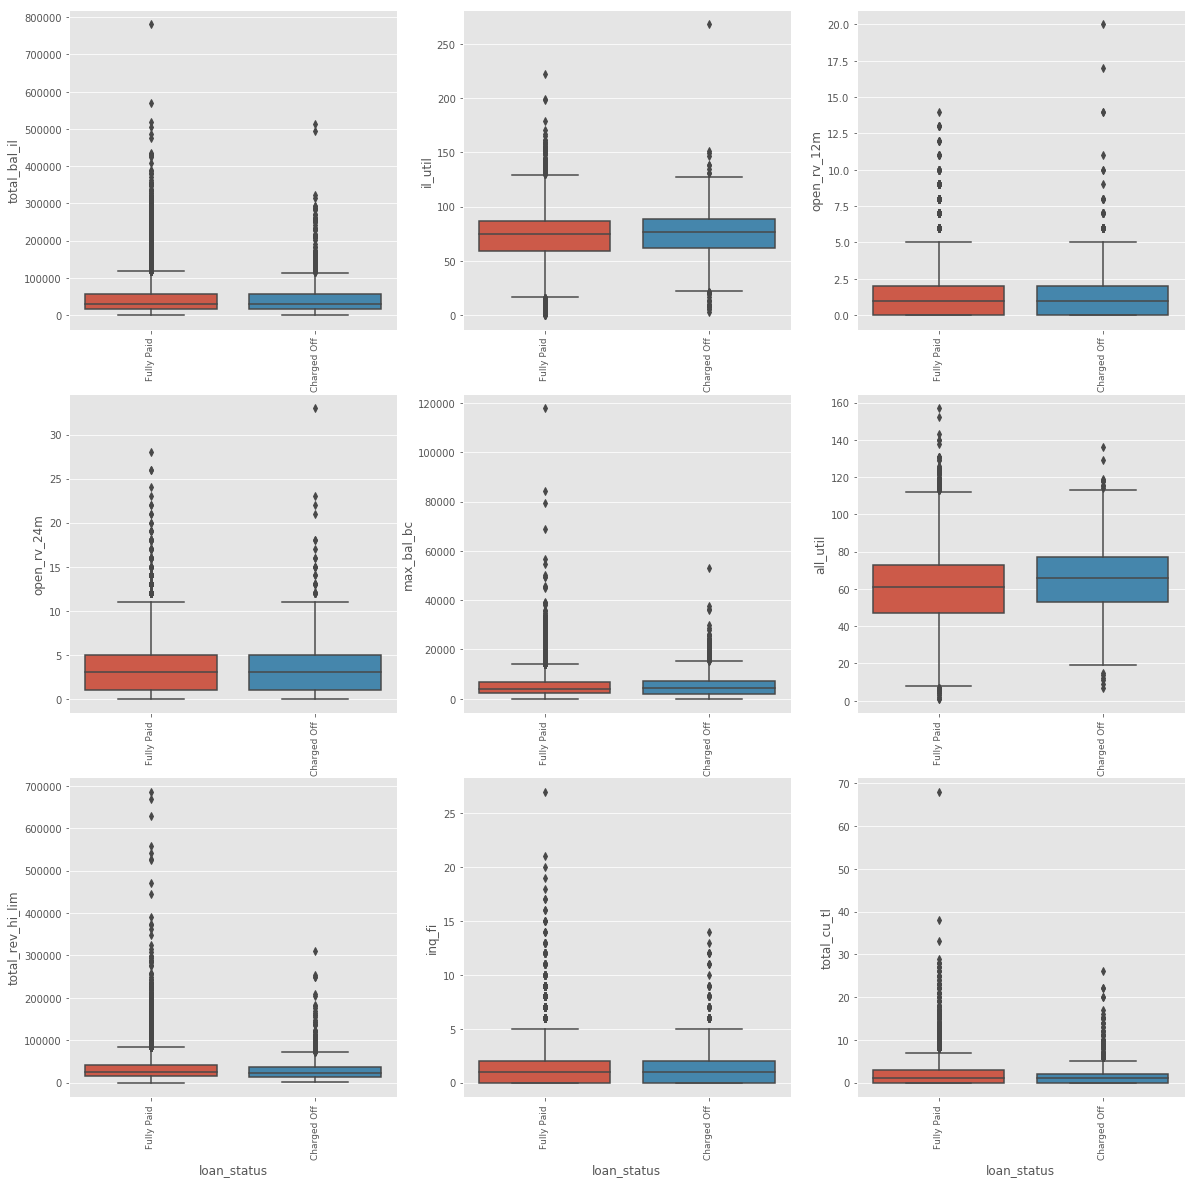

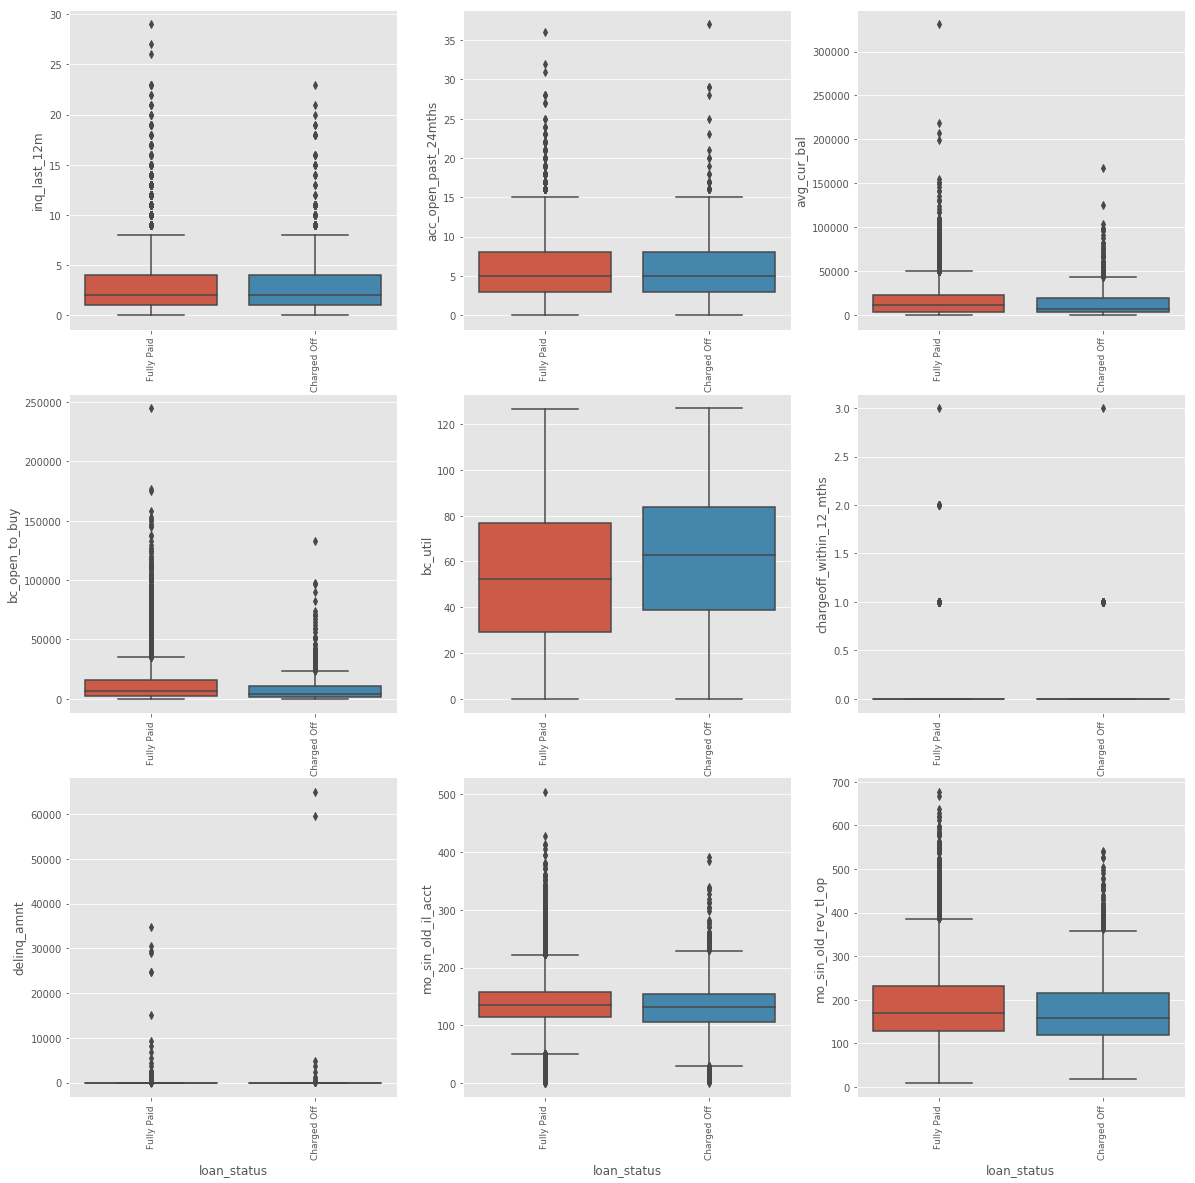

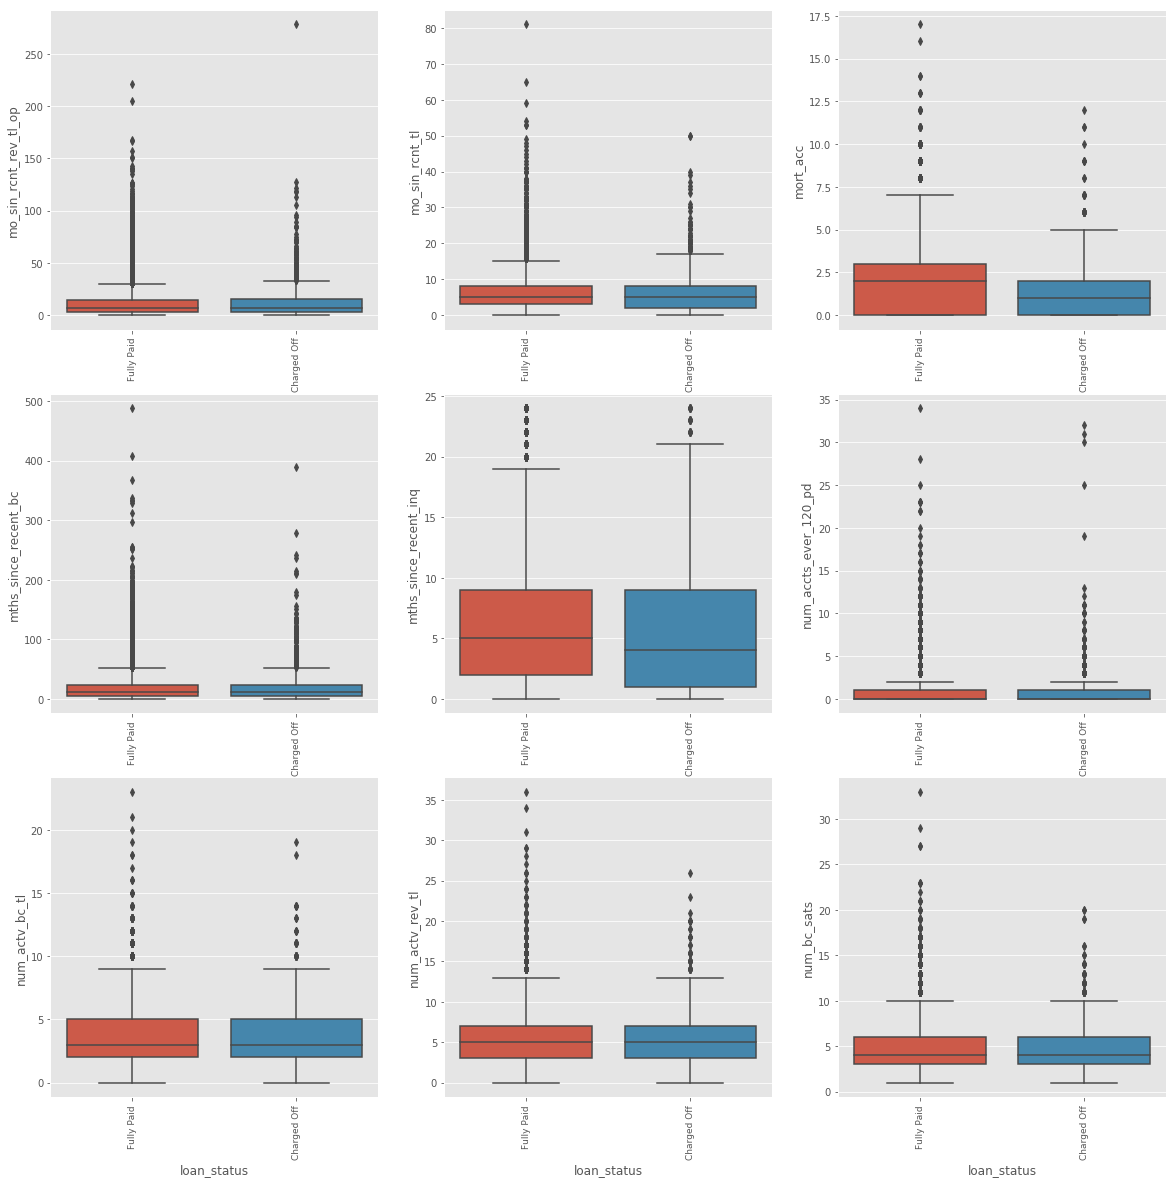

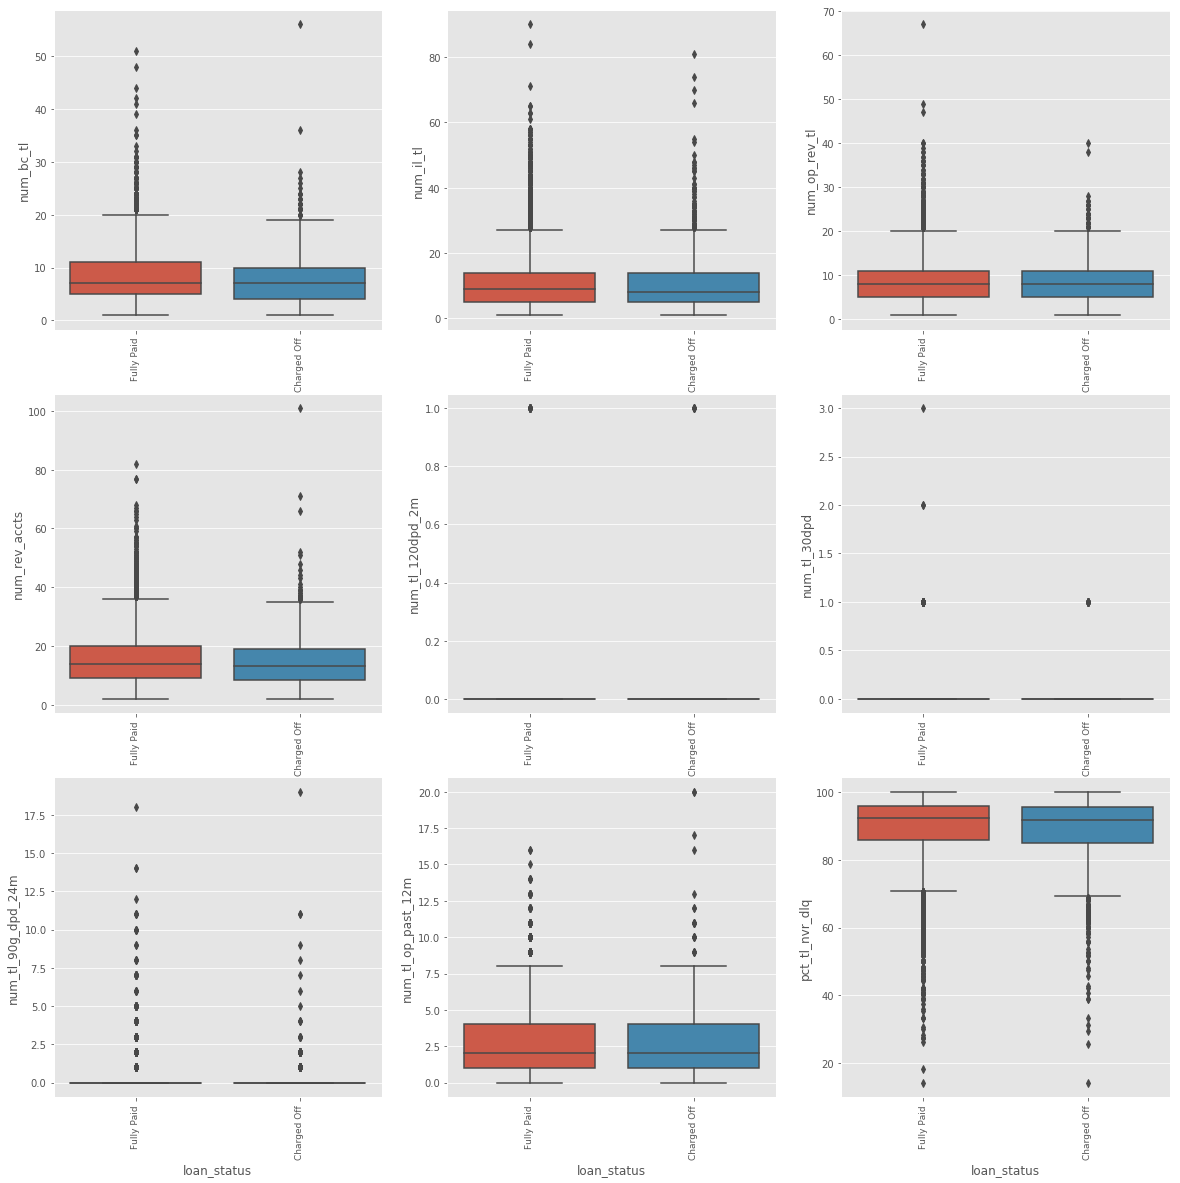

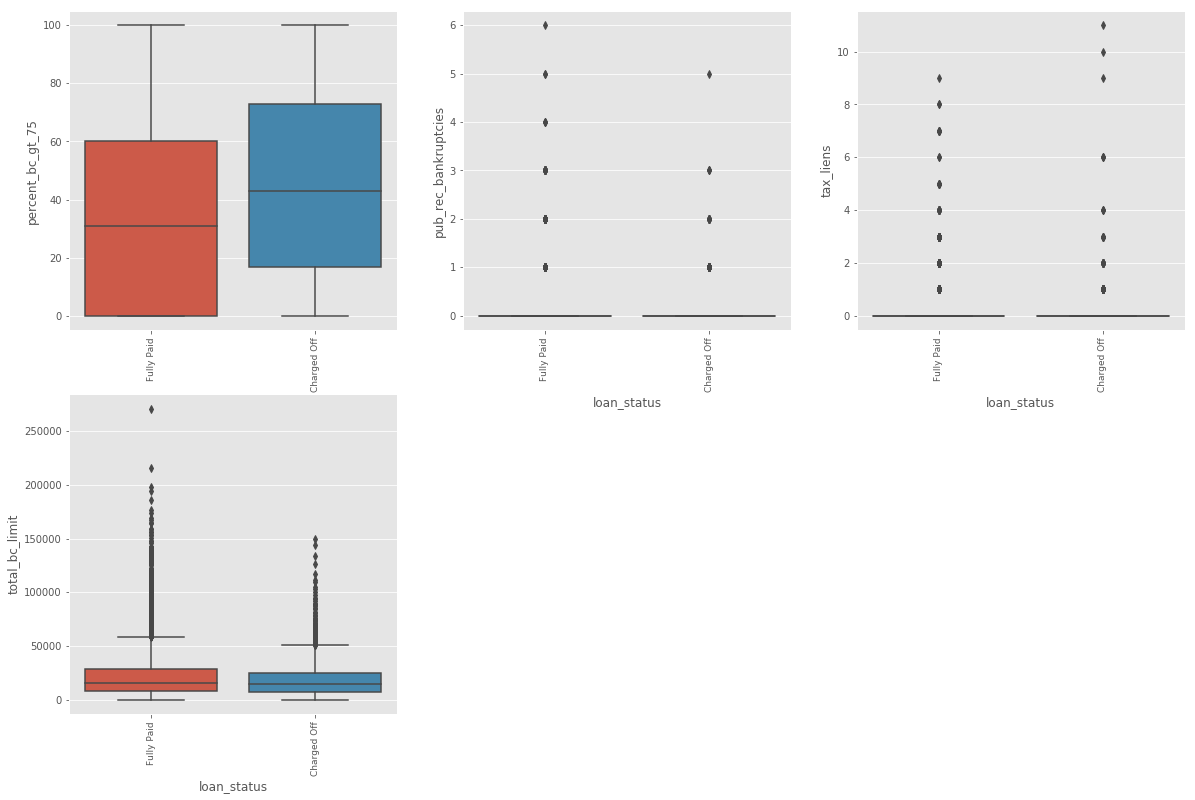

In [10]:
import seaborn as sns
import os
    
def draw_boxplot(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #ax = sns.boxplot(x="loan_status", y=var_name, data=LoanStatsDF_Clean.filter("loan_status = 'Charged Off' or loan_status = 'Fully Paid'").toPandas())
        ax = sns.boxplot(x="loan_status", y=var_name, data=LoanStatsDF_Clean.toPandas())
        ax.set_ylabel(var_name)
        plt.xticks(fontsize=9, rotation=90)
    plt.show()

print("Boxplots of numerical features against 'Loan Status'".center(os.get_terminal_size().columns))

for i in range(0,len(LoanStats_Numeric.columns),9):
    draw_boxplot(LoanStats_Numeric, LoanStats_Numeric.columns[i:i+9], 3, 3)

__Remarks:__

From the above box plots for each numerical feature against the "loan_status" feature, the following are some observations made:

1. For the "int_rate" feature, occurences of loan default cases tend to be associated with higher interest rates offered whilst that for successful loan repayment cases tend to be associated with lower interest rates.

2. For the "total_pymnt" feature, occurences of loan default cases tend to be associated with much lower total payment amounts recorded whilst that for successful loan repayment cases tend to be associated with much higher total payment amounts recorded.

Note: Occurences of loan default cases are identified by "Charged Off" value in "loan_status" column
      Successful loan repayment cases are identified by "Fully Paid" value in "loan_status" column

#### 4.3. Density Plot

Next, we check the correlation between numerical columns against loan status (for "Charged Off" and "Fully Paid" cases) using density plots 

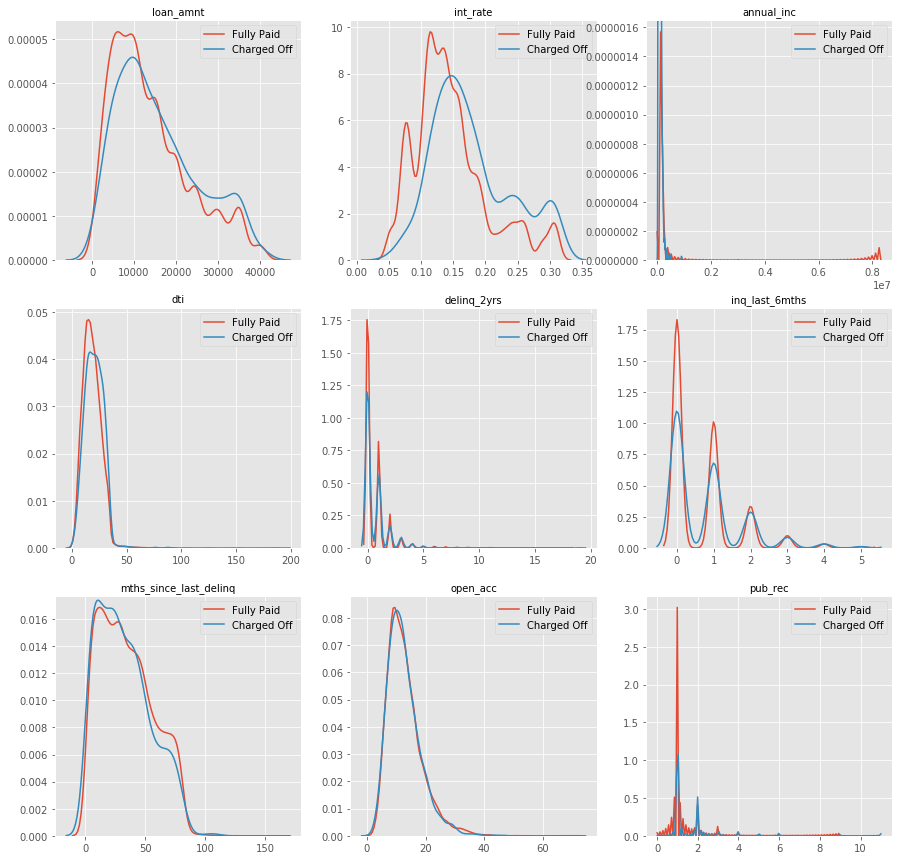

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


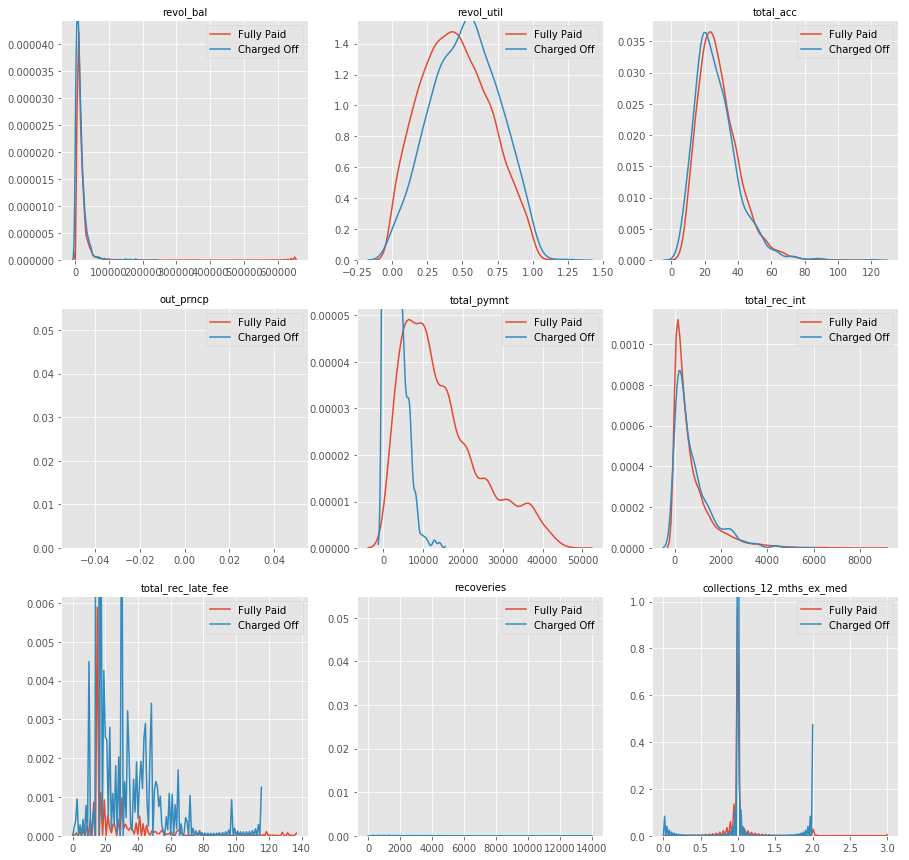

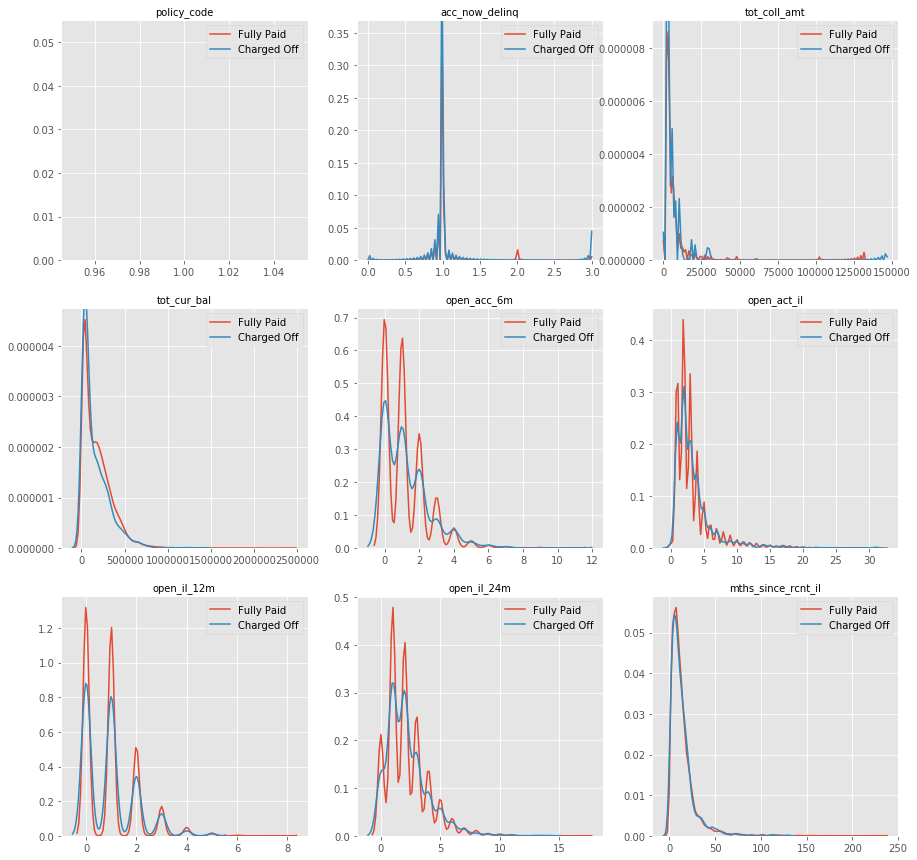

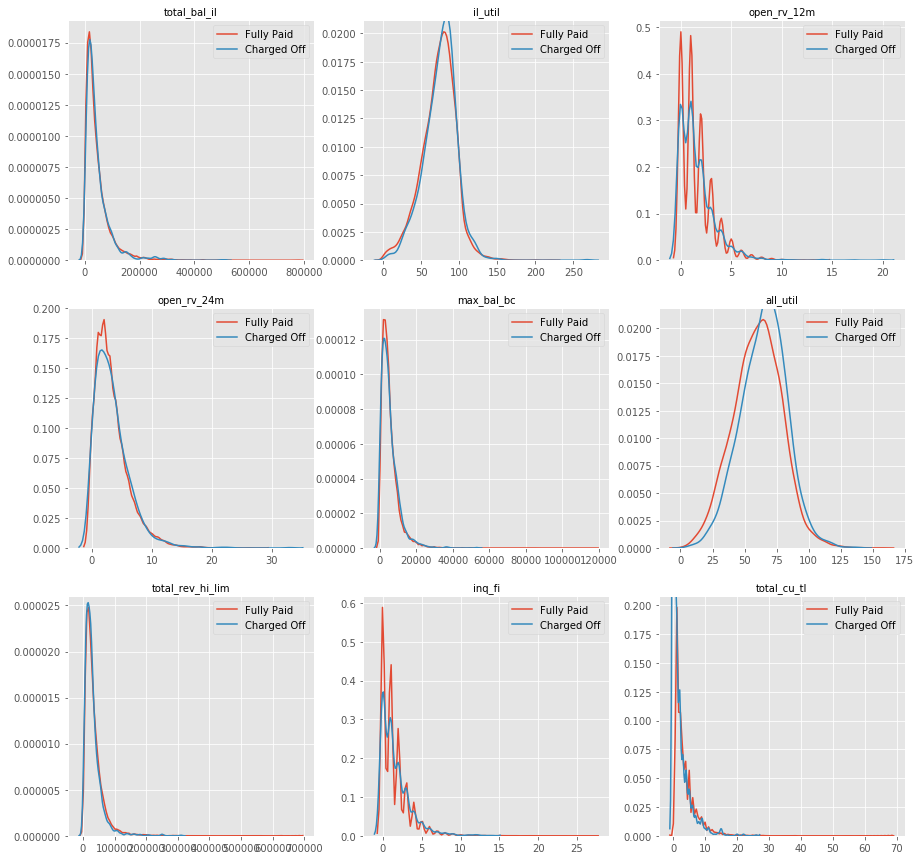

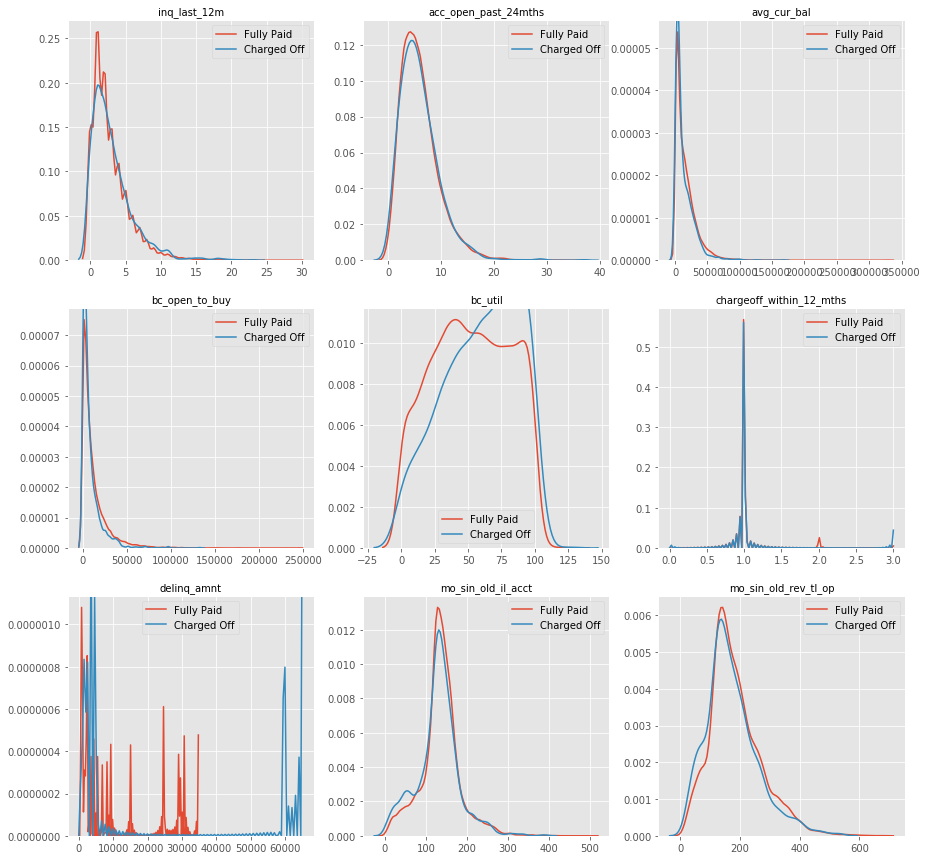

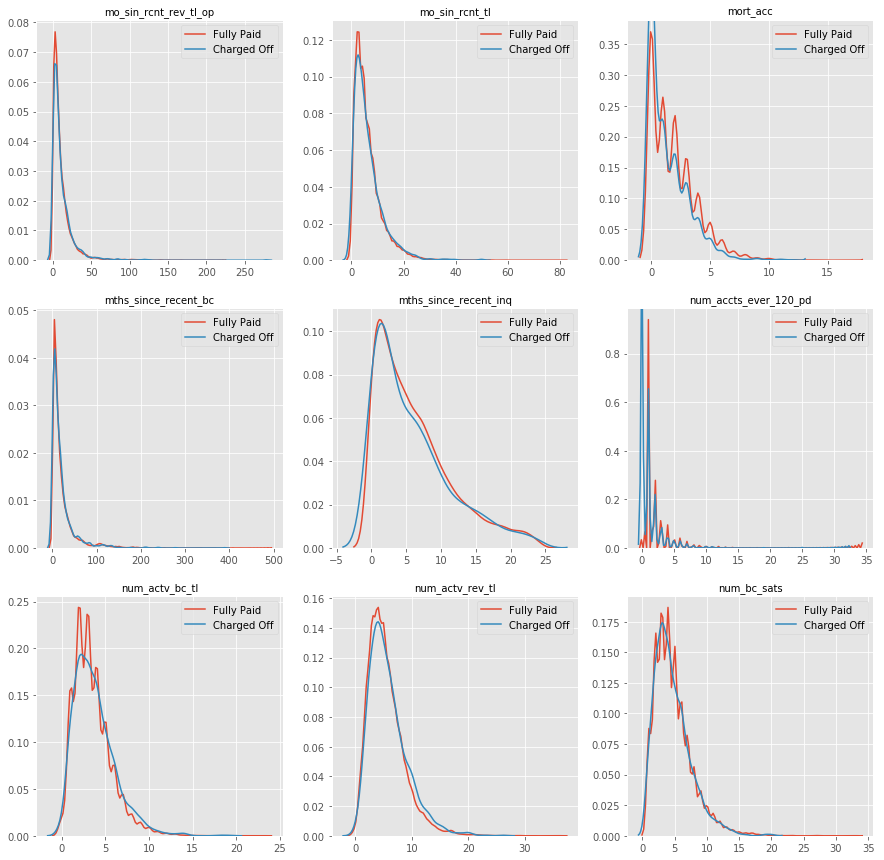

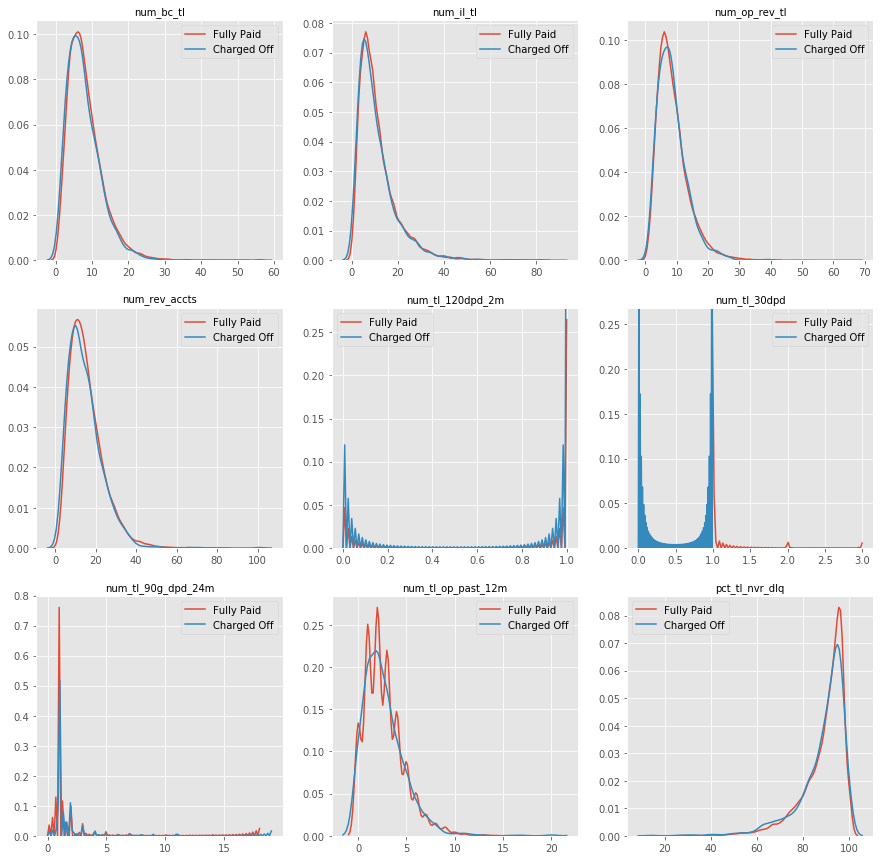

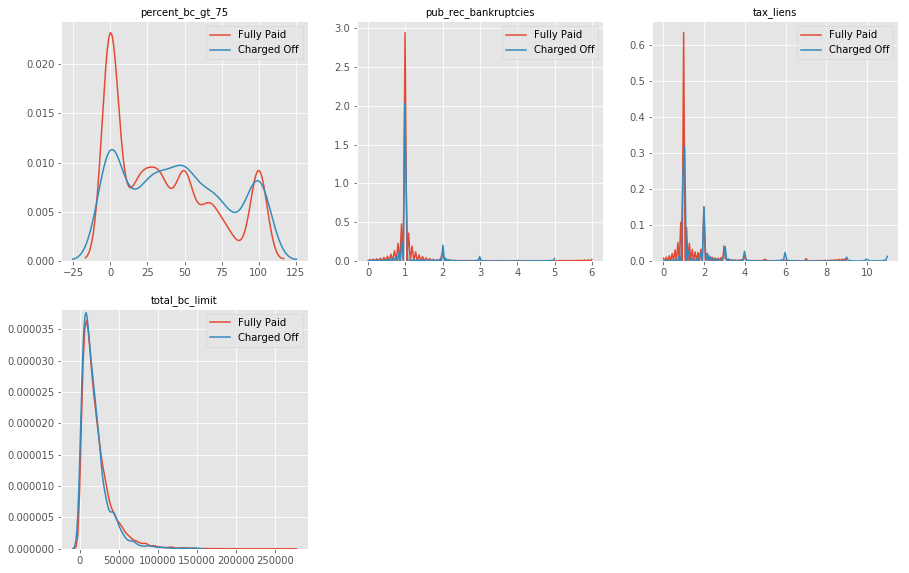

In [11]:
import seaborn as sns
import os

loanStatus_list = LoanStatsDF_Clean.toPandas().loan_status.unique()

def draw_density(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        for status in loanStatus_list:
            if(status == "Fully Paid" or status == "Charged Off"):
                tempStr = "loan_status = '" + status + "'"
                templist = [e[0] for e in LoanStatsDF_Clean.select(var_name).where(tempStr).collect()]
                ax = sns.distplot(templist, hist=False, label=status)
                ax.set_title(var_name, fontsize=10)
    plt.show()
    
for i in range(0,len(LoanStatsDF_Clean.columns),9):
    draw_density(LoanStats_Numeric, LoanStats_Numeric.columns[i:i+9], 3, 3)

__Remarks:__

From the above density plots for each numerical feature against the "loan_status" feature, the following are some observations made:

1. For the "int_rate" feature, there are much higher occurences of loan default cases at higher interest rates offered as compared to successful loan repayment cases where the interest rates offered are very low.

2. For the "total_pymnt" feature, there are higher occurences of loan default cases at very low total payment amounts recorded whilst successful loan repayment cases see much higher total payment amounts recorded.

The above concurs with the observations recorded from the boxplots.

#### 4.4. Mosaic Plots

Next, we check the correlation between categorical columns using mosaic plots

           Mosaic Plots of categorical features against 'Loan Status'           


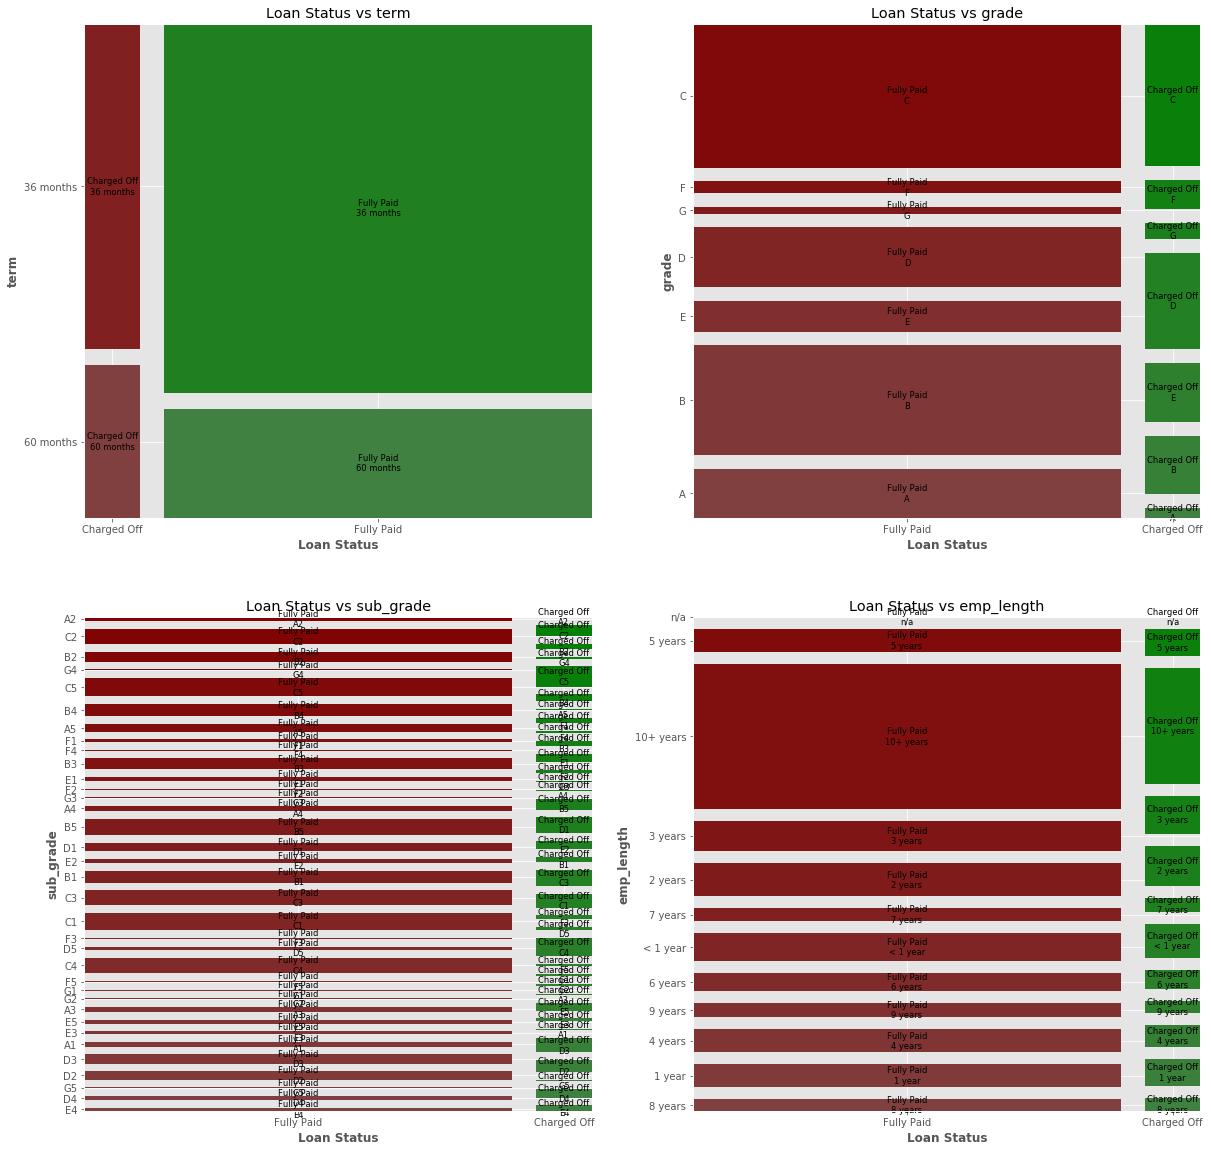

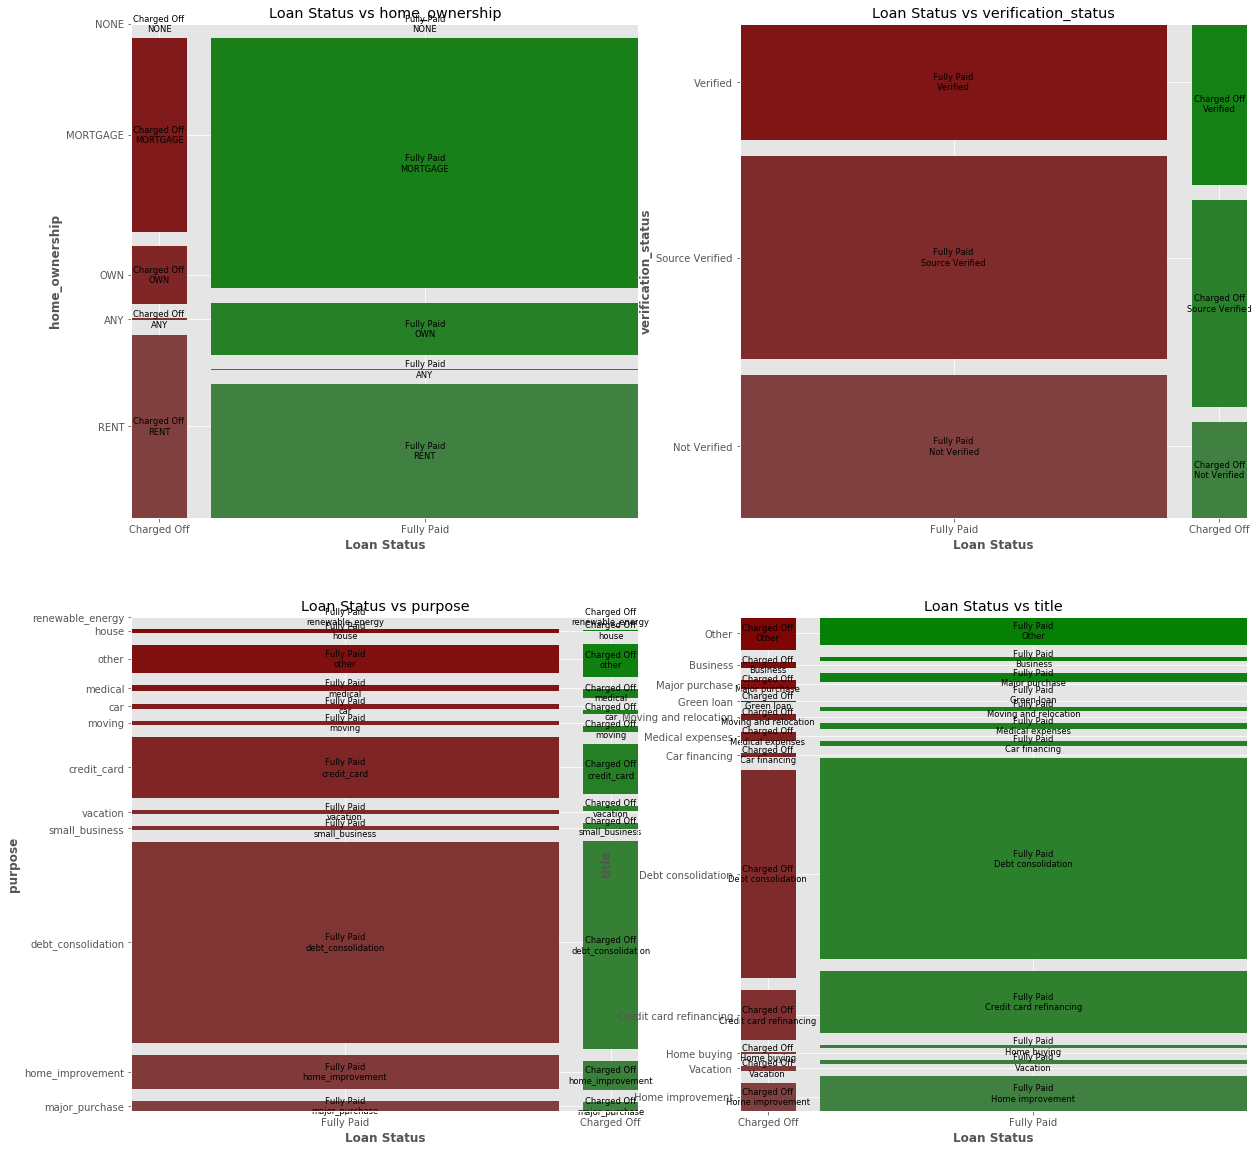

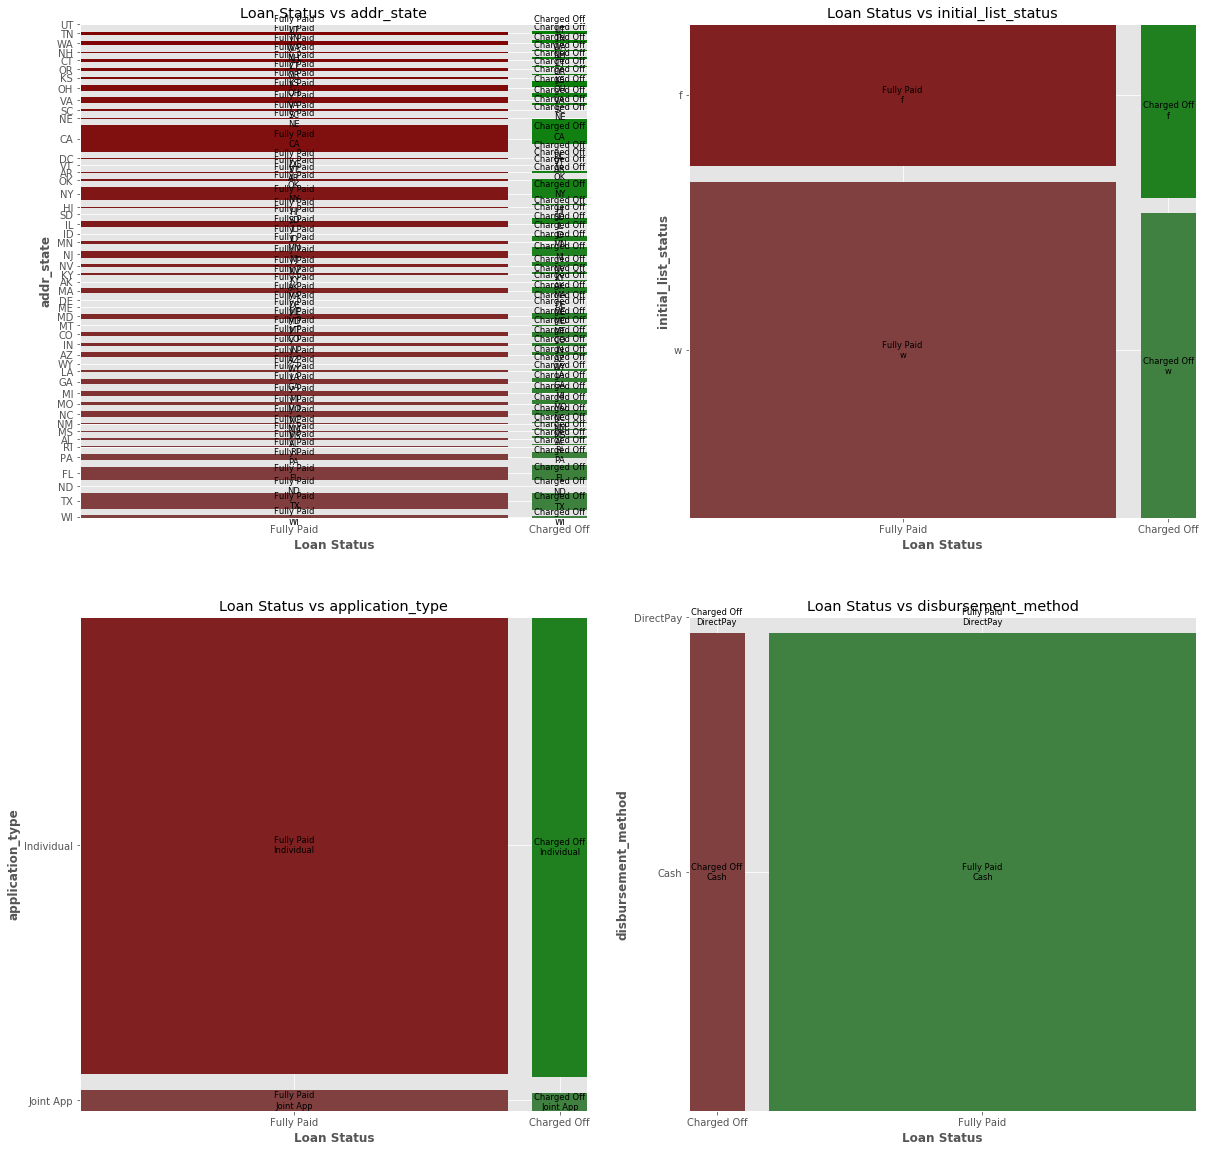

In [12]:
from statsmodels.graphics import mosaicplot

# Extract Dataset for categorical features only
LoanStats_String = LoanStatsDF_Clean.toPandas().select_dtypes(exclude=[np.number])

# Function routine for displaying mosaic plots with display 
def draw_mosaicplot(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,20))
    for i, var_name in enumerate(variables):
        if(var_name != "loan_status"):
            ax=fig.add_subplot(n_rows,n_cols,i+1)

            # Generate dictionary containing number of records for each combination of categorical feature and loan_status
            dict = {}

            data = LoanStatsDF_Clean.filter("loan_status = 'Fully Paid' or loan_status = 'Charged Off'") \
                                    .select("loan_status", var_name).groupby("loan_status", var_name).count().collect()
            for row in data:
                d = row.asDict()
                key = (d["loan_status"], d[var_name])
                value = d["count"]
                dict[key] = value        

            # display the mosaic plot
            ax = plt.gca()                      # get the plotting area
            ax.set_xlabel('Loan Status', fontsize=12, fontweight='semibold')   # set label for x-axis
            ax.set_ylabel(var_name, fontsize=12, fontweight='semibold')         # set lavel for y-axis
            mosaicplot.mosaic(dict, gap=0.05, title='Loan Status vs ' + var_name, ax=ax)
    plt.show()

print("Mosaic Plots of categorical features against 'Loan Status'".center(os.get_terminal_size().columns))

for i in range(0,len(LoanStats_String.columns),4):
    draw_mosaicplot(LoanStats_String, LoanStats_String.columns[i:i+4], 2, 2)

__Remarks:__

From the above mosaic plots for each categorical feature against the "loan_status" feature, it is observed that the horizontal splits occur at similar locations on the y-axis indicating no strong relationship exists between loan status and "application_type", "disbursement_method" features. For the other features, the horizontal splits are not different enough to warrant a strong relationship between these and the "loan_status" feature.

#### 4.5. Heat Maps

Next, we check the correlation between categorical feature groups against numerical features using heatmaps

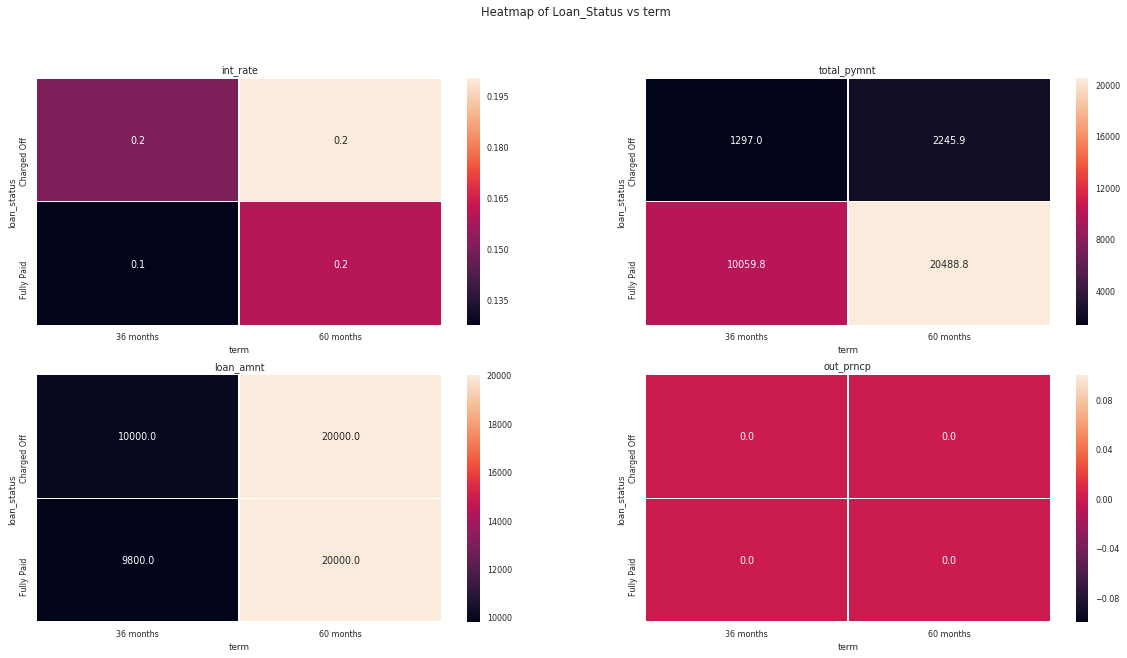

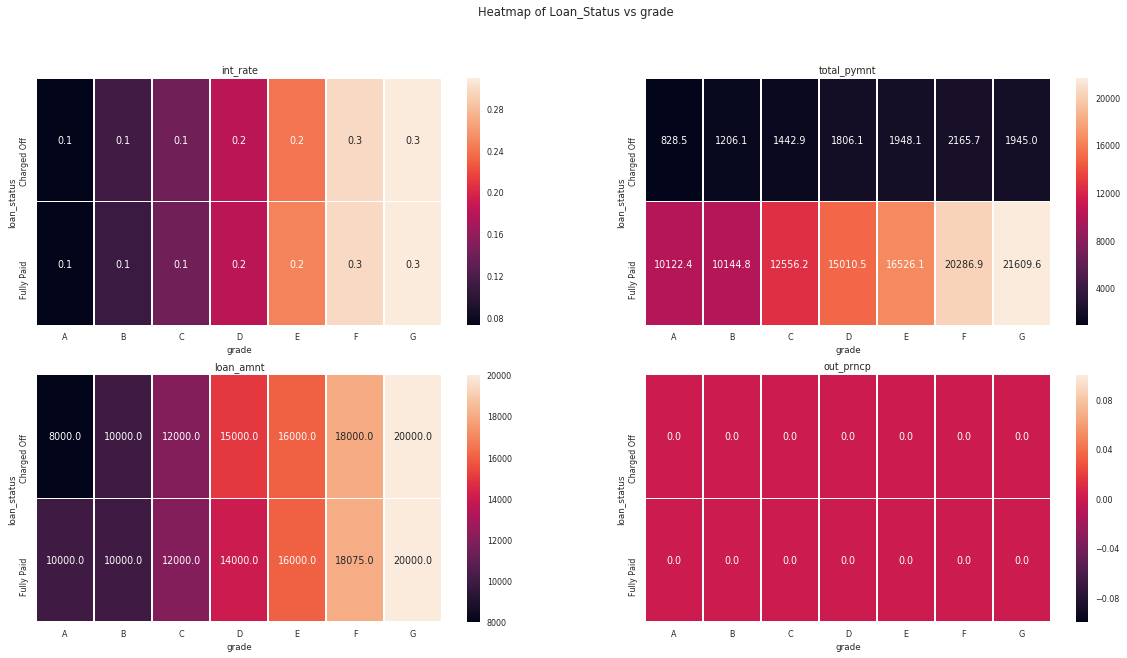

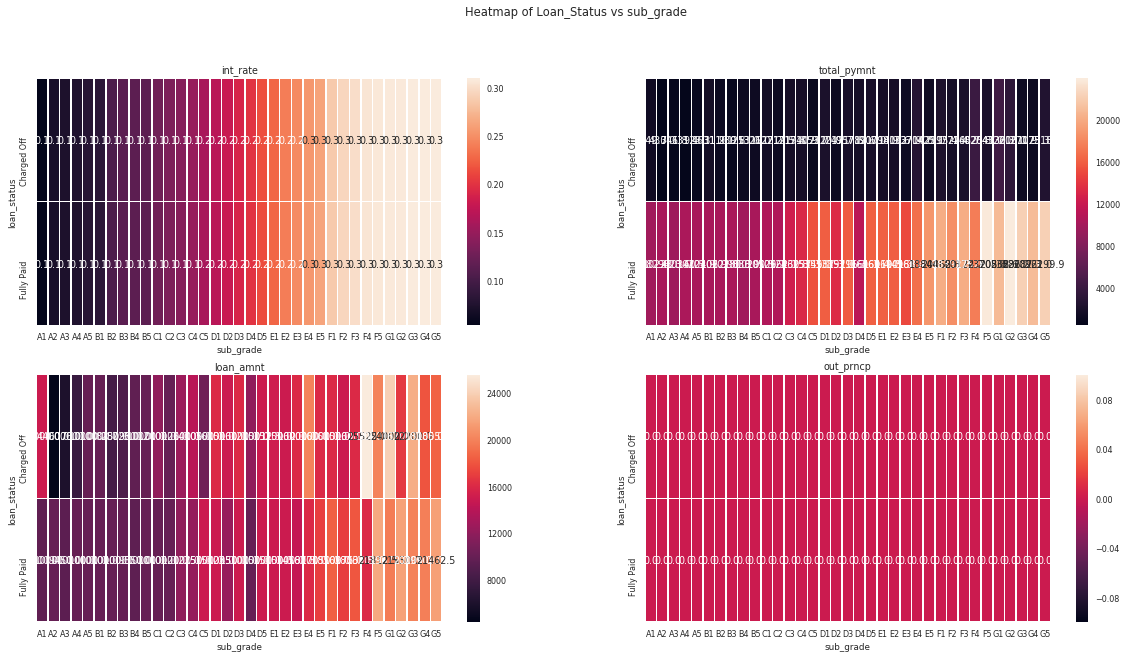

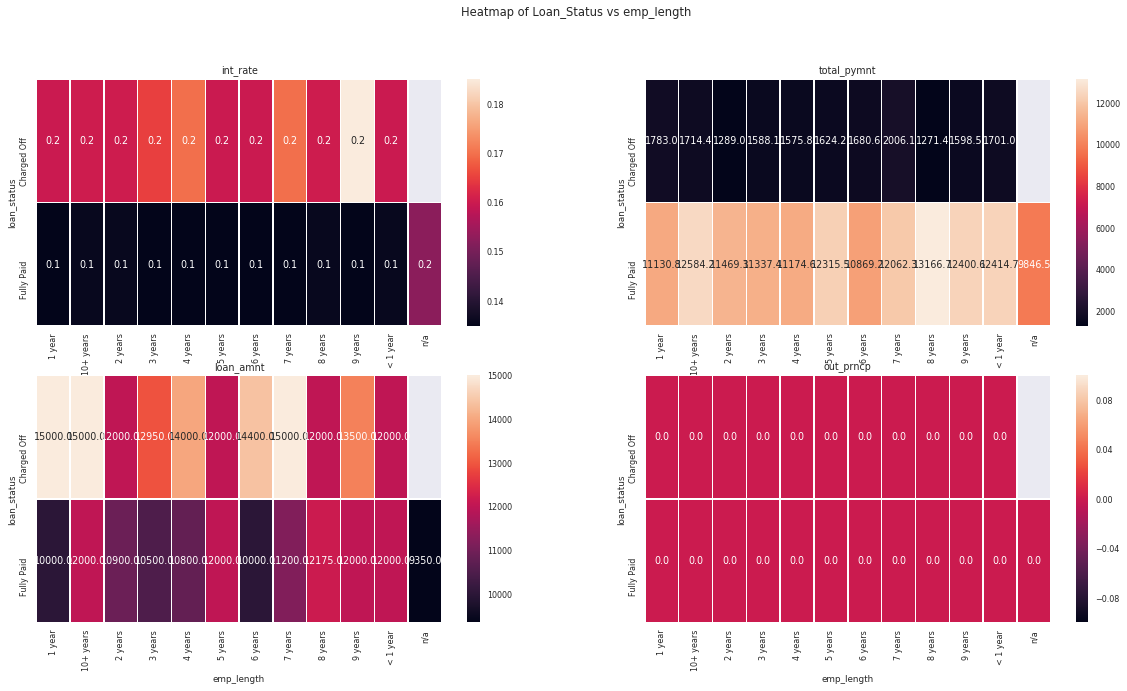

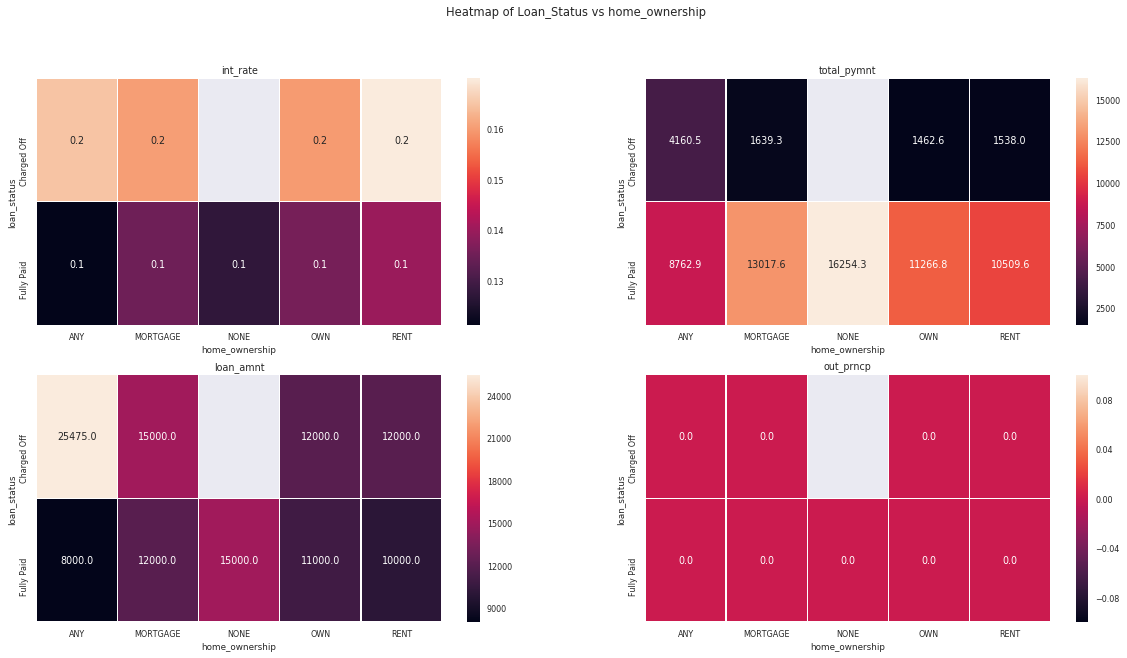

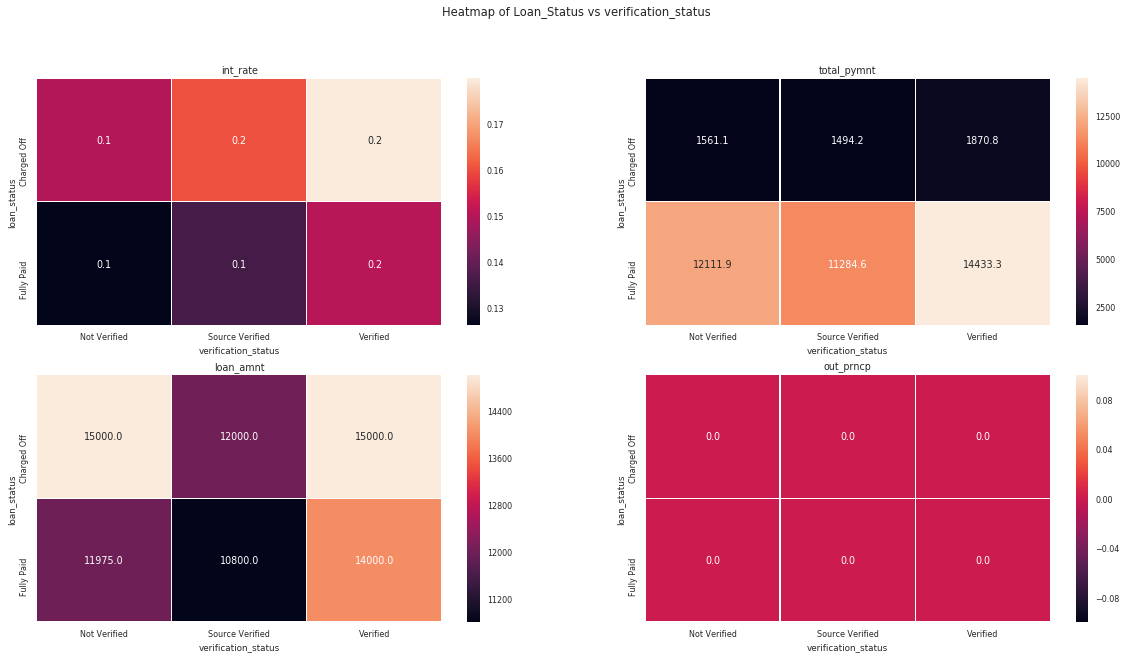

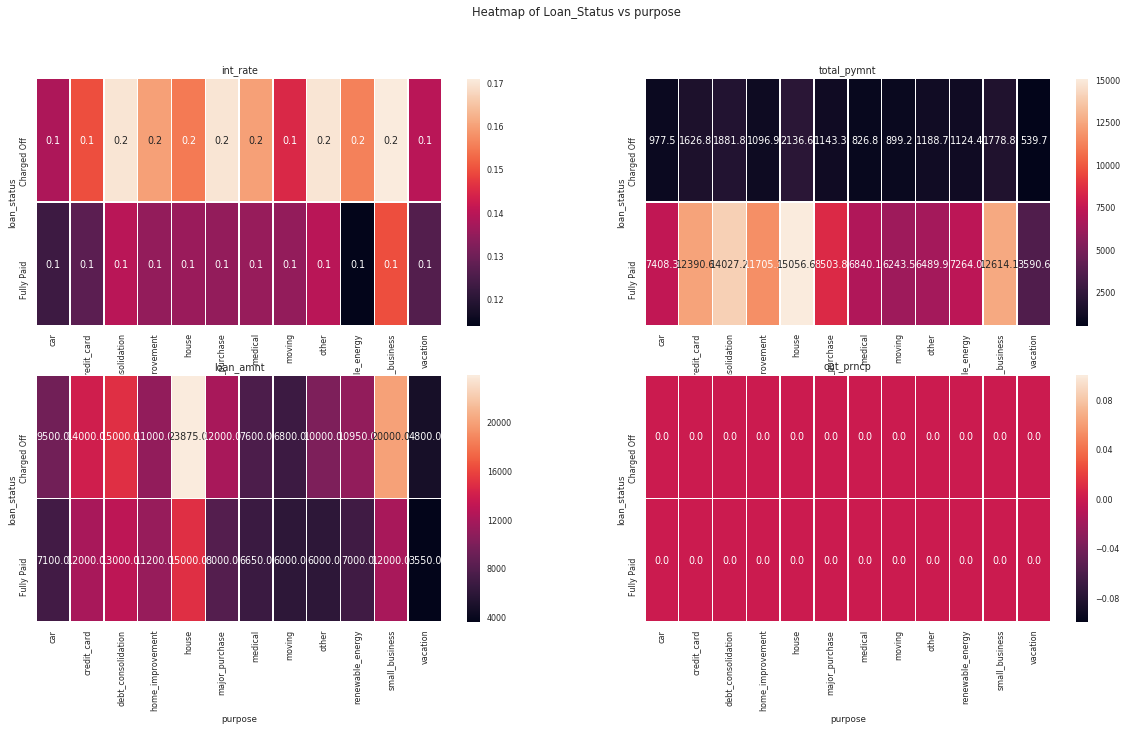

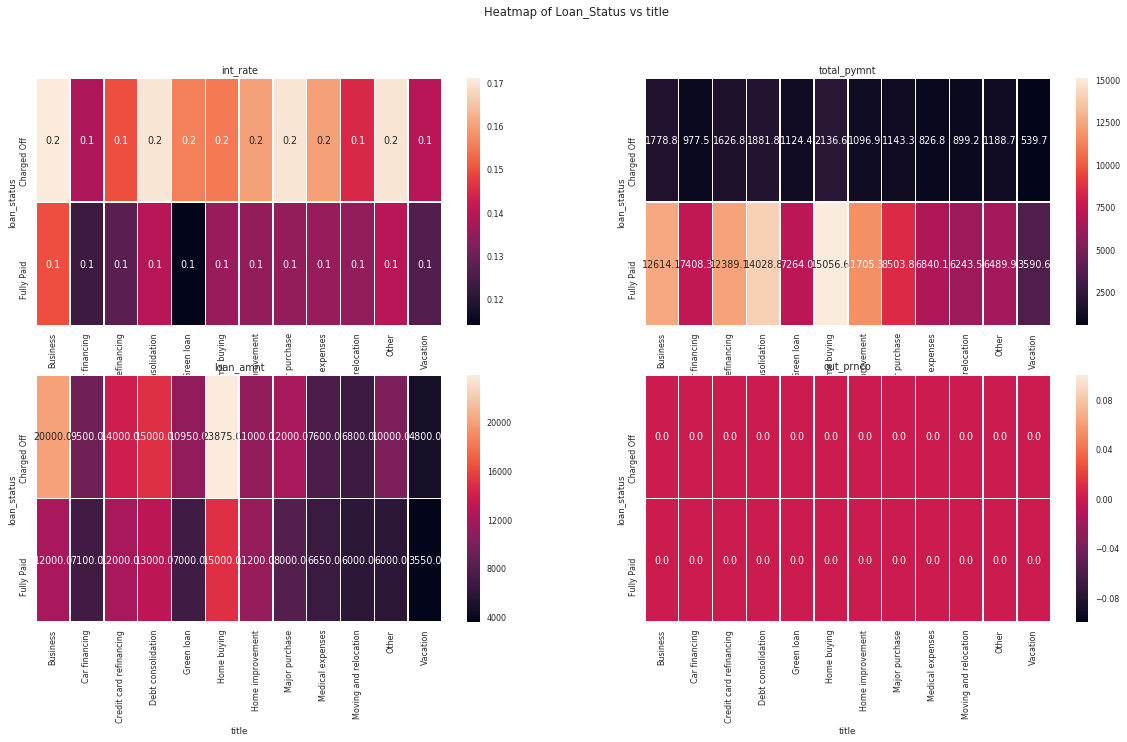

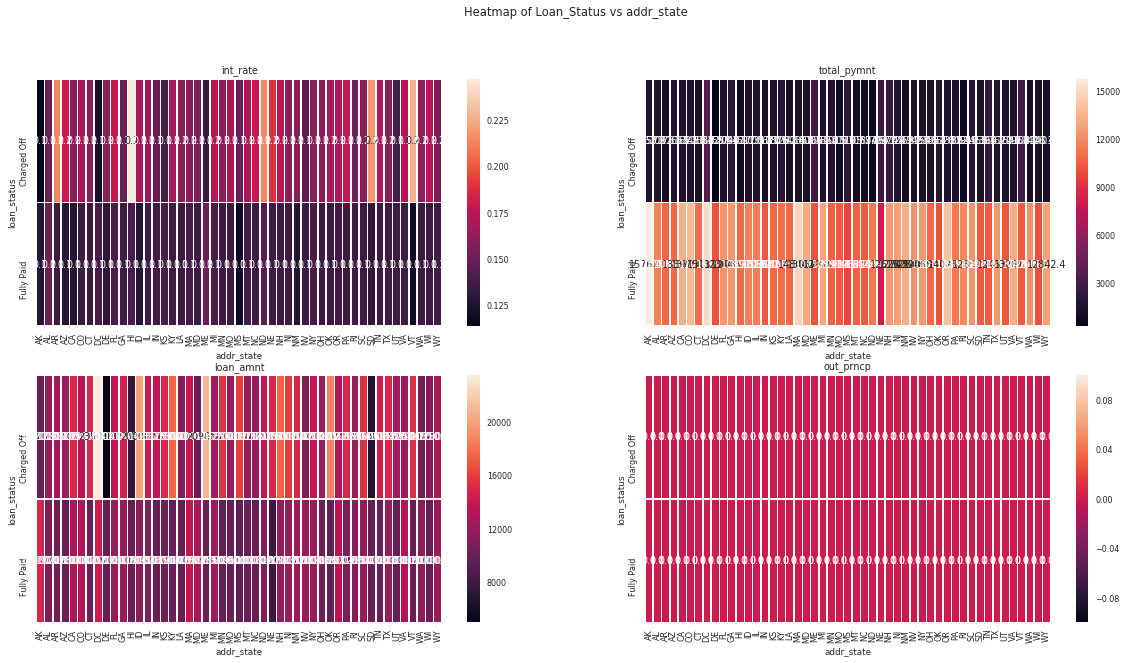

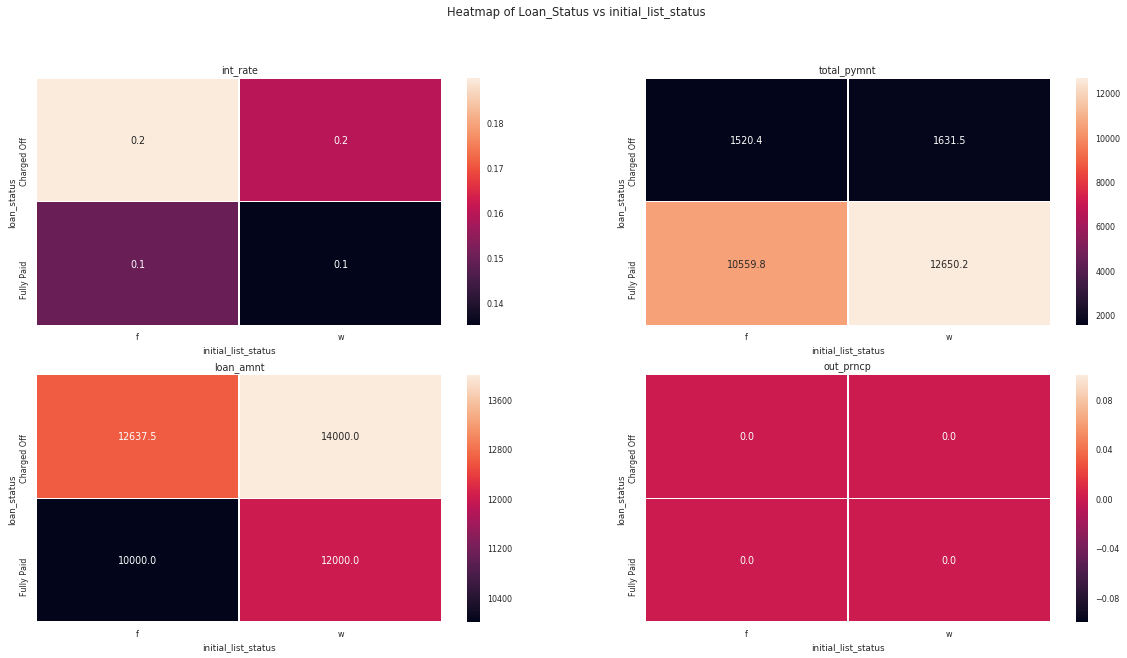

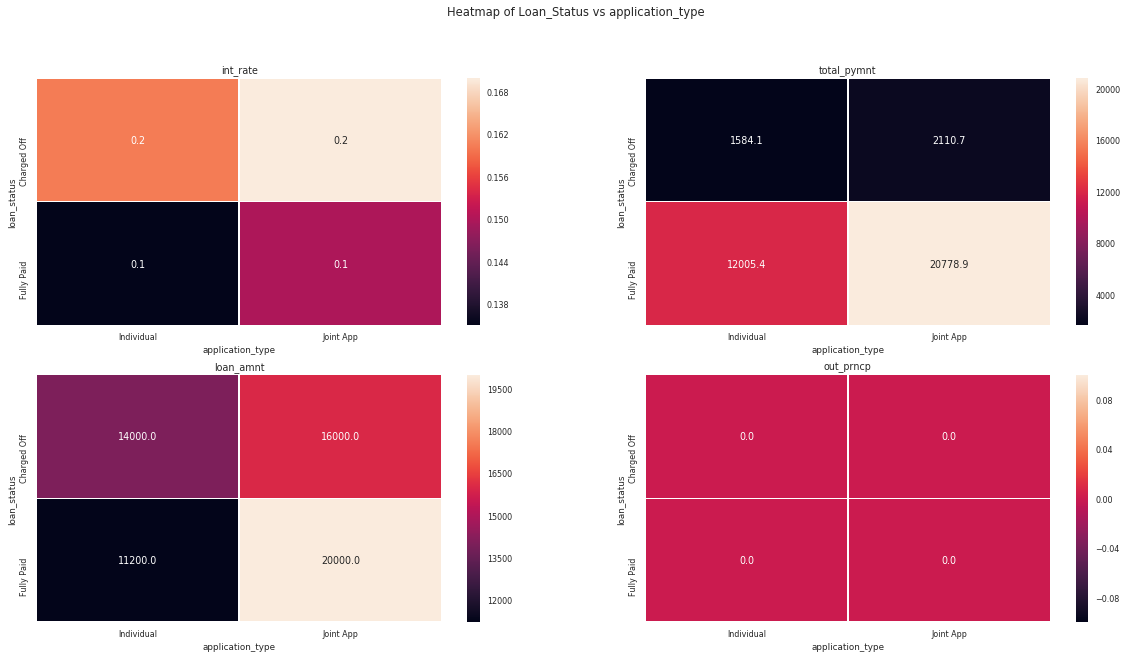

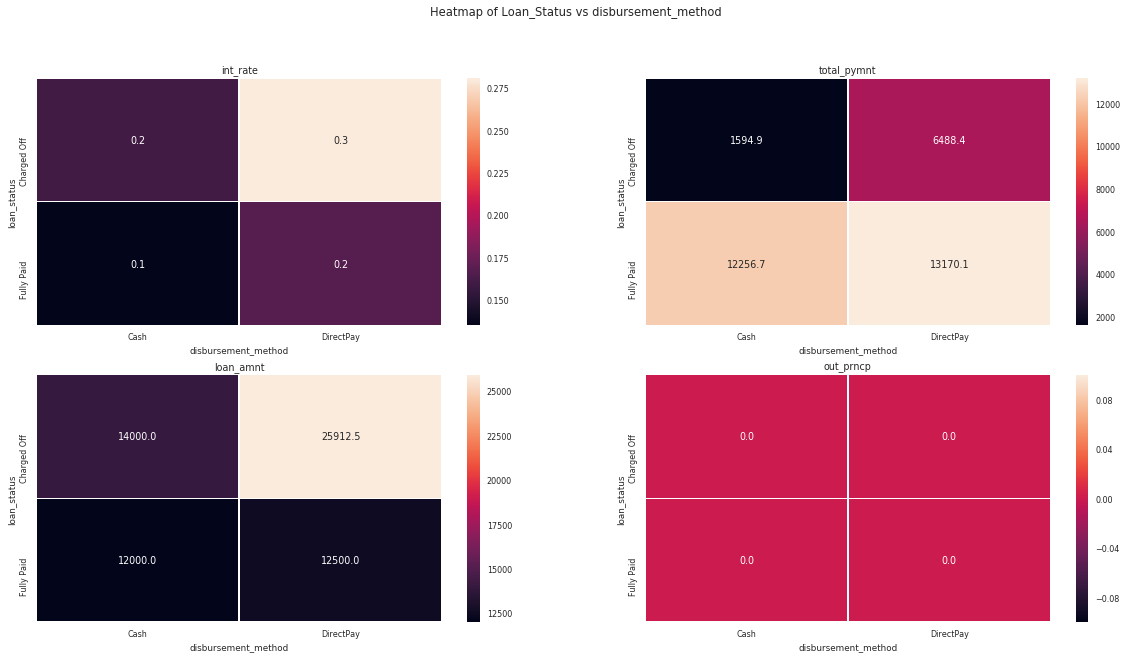

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(font_scale=0.8)

plt.rcParams.update({'figure.max_open_warning': 0})

# Extract Dataset for categorical features only
LoanStats_Categorical = LoanStatsDF_Clean.toPandas().select_dtypes(exclude=[np.number])
col = list(LoanStats_Categorical.columns.values)
col.remove("loan_status")

val = ["int_rate", "total_pymnt", "loan_amnt", "out_prncp"]
        
def draw_heatmapplot(df, i):
    fig=plt.figure(figsize=(20,10))
    fig.suptitle('Heatmap of Loan_Status vs ' + col[i])
    for j in range(0,len(val)):
        table = pd.pivot_table(df.filter("loan_status == 'Charged Off' or loan_status == 'Fully Paid'"). \
                       toPandas(), values=val[j], index=["loan_status"],columns=[col[i]], aggfunc=np.median)
        ax=fig.add_subplot(np.ceil(len(val)/2),2,j+1)
        ax.title.set_text(val[j])
        sns.heatmap(table, annot=True, square=False, cbar=True, fmt='.1f', linewidths=.5, ax=ax)
            
for i in range(0,len(col)):
    draw_heatmapplot(LoanStatsDF_Clean, i)

__Remarks:__

From the above heatmaps for each categorical feature group (with "loan_status" feature) against the median values of the respective numerical features, the following can be observed:

1. Higher "total_pymnt" and "last_pymnt_amnt" values are observed for "Fully Paid" loans, while "Charged Off" loans are normally associated with much lower values.

2. If the loan grade ("grade") is of lower quality, the interest rates tend to be higher for both "Fully Paid" and "Charged Off" loans.

3. For "grade", "emp_length", "home_ownership", "verification_status", "initial_list_status", "application_type", "cash" features, the "total_pymnt" and "last_pymnt_amnt" tend to be lower for "Charged Off" loans as compared to "Fully Paid" loans. 

4. For all categories of "emp_length", interest rates are higher for "Charged Off" loans.

5. Loan amounts ("loan_amnt") tend to be higher for "Charged Off" loans using "DirectPay" disbursement method and of "ANY" home ownership status.

6. "out_prncp" tends to have no correlation with any of the categorical features.

#### 4.6. Pareto Charts

Next, we analyze the occurence frequency for each categorical feature using pareto charts

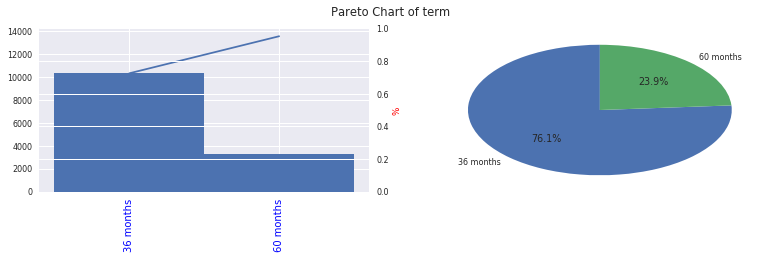

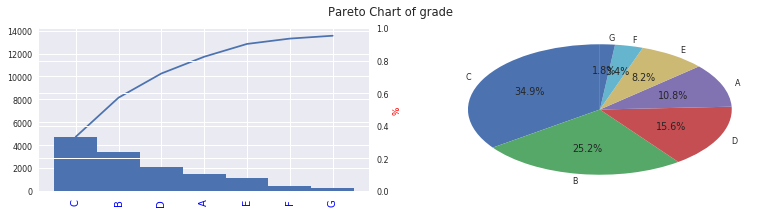

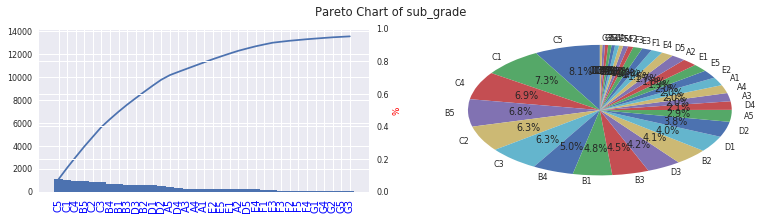

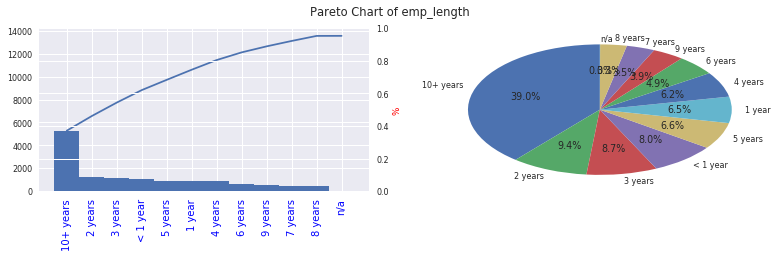

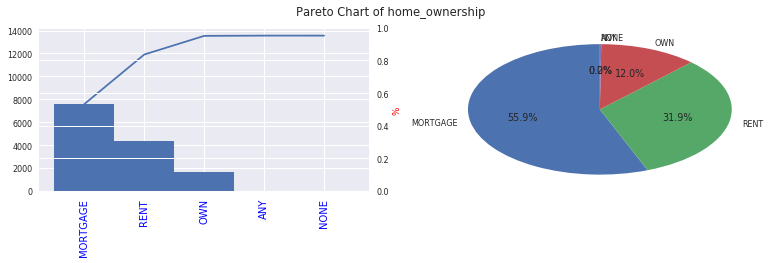

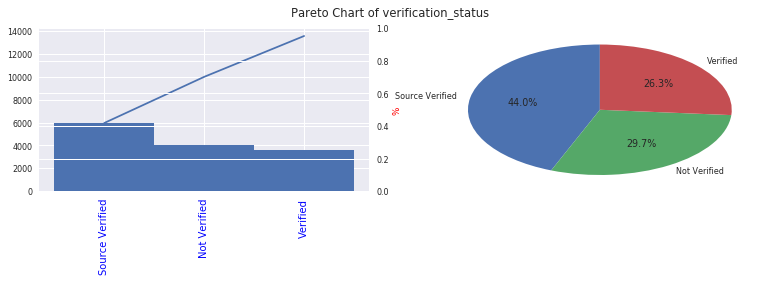

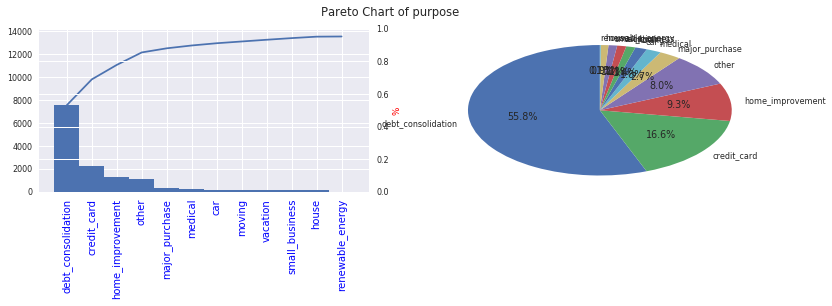

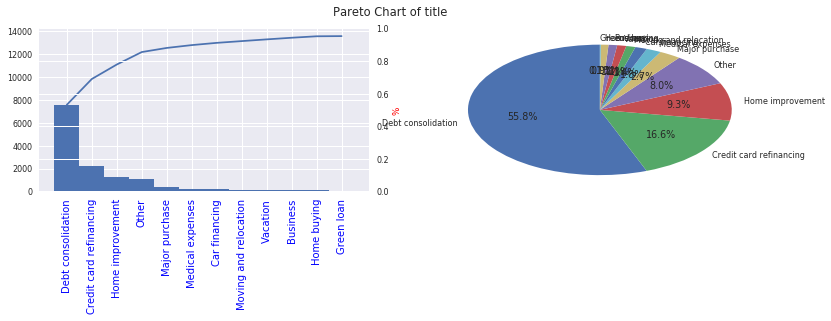

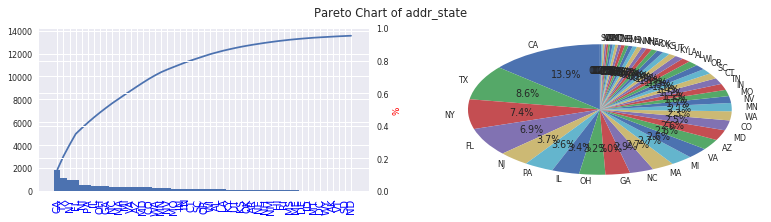

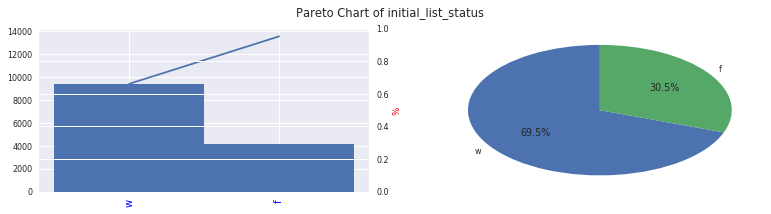

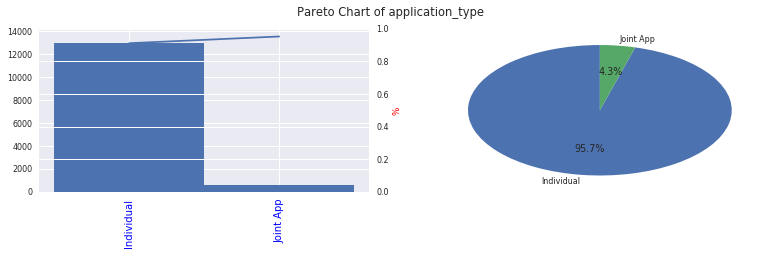

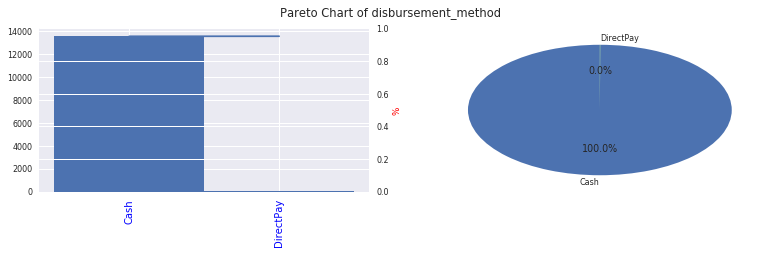

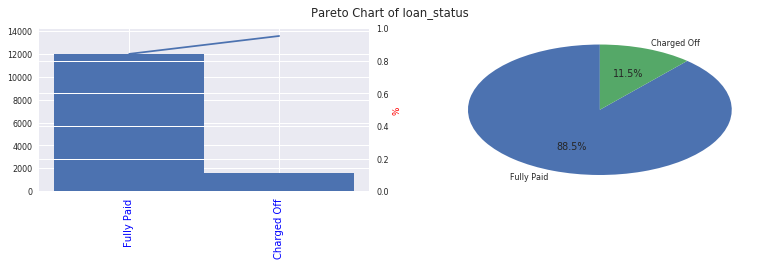

In [14]:
from matplotlib import pyplot as plot
import numpy as np
import pandas as pd

plot.rcParams.update({'figure.max_open_warning': 0})

# Extract Dataset for categorical features only
LoanStats_String = LoanStatsDF_Clean.toPandas().select_dtypes(exclude=[np.number])
colhdrs = list(LoanStats_String.columns.values)

def draw_pareto(df, i):
    fig=plot.figure(figsize=(13,3))

    f = LoanStats_String.groupby(colhdrs[i]).size()
    d = f.to_dict()

    # sort preference in descending order
    weights, labels = zip(*sorted(((qty,col) for col,qty in d.items()), reverse=True))

    cumu_weights = np.cumsum(weights)

    cumu_pcts = np.linspace(0,100,cumu_weights.size)

    # lefthand edge of each bar
    left = np.arange(len(weights))
    ax = plot.subplot(121)
    fig.suptitle('Pareto Chart of ' + colhdrs[i])
    ax.bar(left, weights, 1)
    ax.set_xticks(left)
    ax.set_xticklabels(labels,fontsize=10, fontweight='normal', rotation=90, color='blue')
    ax.plot(cumu_weights)

    ax1 = ax.twinx()
    ax1.set_ylabel('%', color='r')
    
    ax2 = plot.subplot(122)
    #ax2.axis('equal')
    
    d_sorted = sorted(d.items() , key=lambda t : t[1] , reverse=True)
    d_sorted_col = list(zip(*d_sorted))[0]
    d_sorted_val = list(zip(*d_sorted))[1]
    col_total=sum(d.values())

    # only "explode" the 1st slice
    # explode = [0.2] + [0]*(len(d_sorted)-1)

    plot.pie(d_sorted_val,labels=d_sorted_col,autopct="%1.1f%%", startangle=90, shadow=False)       

for i in range(0,len(colhdrs)):
    draw_pareto(LoanStats_String, i)

__Remarks:__

From the above pareto plots for each category feature, the following are some observations made:

1. 3/4 of the loans offered are of 36-month period

#### 4.6. Pairplots

Next, we check each feature's skewness using seaborn pairplots

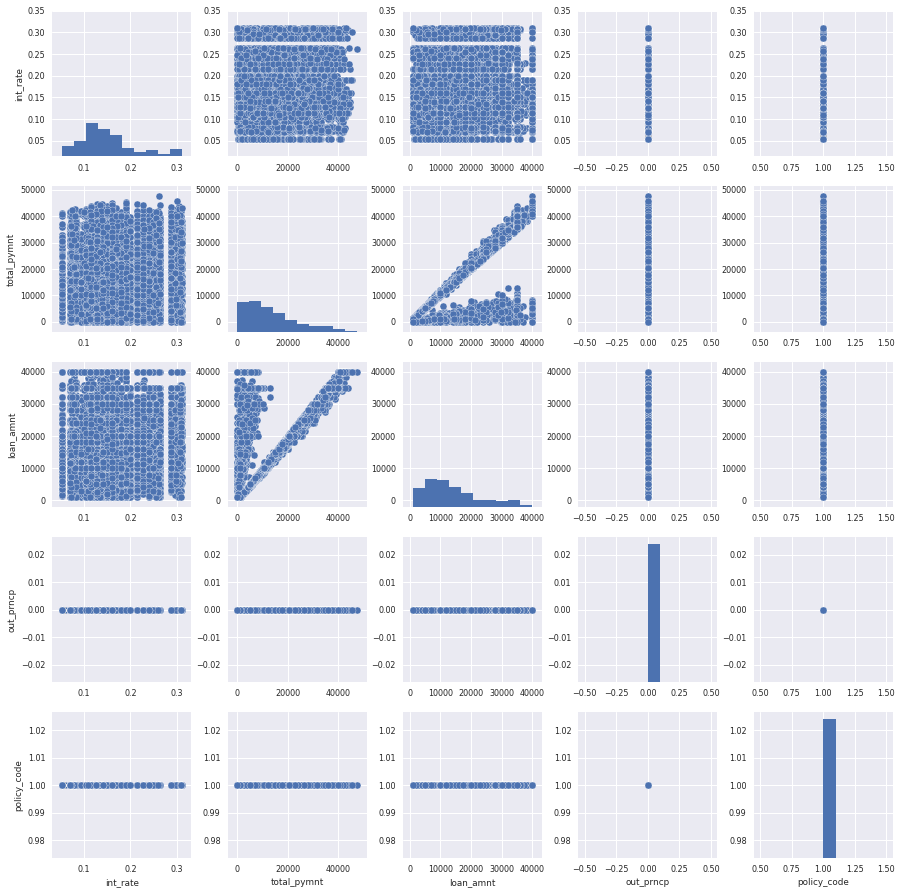

In [15]:
# Extract list of numeric features
LoanStats_Num = LoanStatsDF_Clean.toPandas().select_dtypes(include=[np.number])

# Visualize each feature's skewness using seaborn pairplots
sns.pairplot(data=LoanStats_Num[["int_rate","total_pymnt","loan_amnt","out_prncp","policy_code"]], dropna=True)

#### 4.7. Export Data

Lastly, we write the contents of the LoanStatsDF_Clean dataframe to external CSV file.

In [16]:
import os
import shutil

# Print out schema of dataframe and write data to csv
LoanStatsDF_Clean.printSchema()

# Remove "/Dataset/Transform" directory if exists to prepare for dataframe export to csv file
shutil.rmtree("./Dataset/Transform")

# Export LoanStatsDF_TF dataframe to CSV file with header info
LoanStatsDF_Clean.coalesce(1).write.option("header","true").csv("./Dataset/Transform")

# Search for exported csv file and rename to "LoanStats_Clean.csv"
prefixed = [filename for filename in os.listdir('./Dataset/Transform') if filename.startswith("part-00000")]

old_file = os.path.join("./Dataset/Transform", str(prefixed[0]))
new_file = os.path.join("./Dataset/Transform", "LoanStats_TF.csv")
os.rename(old_file, new_file)

# Remove auto-generated export log file
os.remove("./Dataset/Transform/_SUCCESS")

root
 |-- loan_amnt: integer (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: integer (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: double (nullable = true)
 |-- delinq_2yrs: integer (nullable = true)
 |-- inq_last_6mths: integer (nullable = true)
 |-- mths_since_last_delinq: integer (nullable = true)
 |-- open_acc: integer (nullable = true)
 |-- pub_rec: integer (nullable = true)
 |-- revol_bal: integer (nullable = true)
 |-- revol_util: double (nullable = true)
 |-- total_acc: integer (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- out_prncp: double (nullable = true)
 |-- total_pymnt: d